## Datasets & Params¶


In [1]:
# Choose alpha value between 0-1
# ALPHA = 1.0

# Choose Dataset

# Experiment 1
# DATASET_NAME ='COMPAS_RACE_AM'

# Experiment 2
#DATASET_NAME = 'COMPAS_SEX'

# Experiment 3
# DATASET_NAME = 'ADULT_RACE'

# Experiment 4
#DATASET_NAME = 'ADULT_SEX'

# Experiment 5
DATASET_NAME='CREDIT_SEX'

# Experiment 6
# DATASET_NAME = 'BANK_AGE'

# Experiment 7
#DATASET_NAME = 'RECRUIT_AGE'

# Experiment 8
#DATASET_NAME = 'RECRUIT_SEX'

# Experiment 9
#DATASET_NAME = 'DIABETES_SEX'

# Experiment 9
# DATASET_NAME = 'NURSERY'

# Experiment 9
# DATASET_NAME = 'DEFAULT_CREDIT'

In [2]:
# upload kaggle.json file using user prompt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving german_credit_data.csv to german_credit_data.csv
User uploaded file "german_credit_data.csv" with length 53393 bytes


## Imports

In [3]:
! pip install ctgan
! pip install --upgrade category_encoders

from sklearn.preprocessing import MinMaxScaler

import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import category_encoders as ce
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
import os
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from datetime import datetime
import pprint
import json



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

## Fairness metrics and functions


In [4]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    return abs(len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0)))


    # bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    return 1
    #return min((len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    #,(len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0))))

def fairness_metrics_roc_auc_std(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_str, op_str, op_f_str ,od_str,par_dif_str , dis_imp_str

In [5]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    # print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    # print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    # print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    par_diff = parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    dis_impact = disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    # print('bias metrics:')
    # print('equal opportunity for tpr: (close to 0)', op_diff)
    # print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    # print('avarage absolute odds difference: (close to 0)',od_diff)
    # print('statistical parity difference: (close to 0) ',par_diff)
    # print('disparate_impact: (close to 1) ',dis_impact)


    return (op_diff,op_diff_fpr, od_diff,par_diff ,dis_impact,acc)

In [6]:
def fairness_metrics_roc_auc(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

In [7]:
def fairness_metrics_roc_auc_no_print(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

## Roc & AUC functions¶


In [8]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index,clf ,data, y):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [9]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    privileged_groups = [{'sex': 1}] # Male
    unprivileged_groups = [{'sex': 0}] # Female

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


elif DATASET_NAME == 'ADULT_RACE':
    TARGET_COL = 'income'
    PRIV_FEATURE = "black"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data['black'] = np.where(orig_data['race'] == 'Black', 0,1)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'black']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

elif DATASET_NAME =='COMPAS_RACE_AM':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'am'
#     PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']



elif DATASET_NAME =='COMPAS_SEX':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']


elif DATASET_NAME == 'CREDIT_SEX':
    orig_data = pd.read_csv('/content/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 0
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    orig_data['Sex'] = np.where(orig_data['Sex'] == 'male', 0,1)
    orig_data = orig_data.drop(["Unnamed: 0"],axis=1)
    orig_data['young'] = orig_data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']

elif DATASET_NAME =='BANK_AGE':
    orig_data = pd.read_csv('/content/bank.csv')
    TARGET_COL = 'deposit'
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'no' else 1)

    orig_data['age_cat'] = np.where(((pd.to_numeric(orig_data['age']) > 65) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)
    PRIV_FEATURE = 'age_cat'
    PRIV_VALUE_FEATURE = 0
    PRIV_CLASS = 1
    feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'age_cat',
       'previous', 'poutcome']
    CATEGORICAL = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

elif DATASET_NAME == 'RECRUIT_AGE':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'age'
    PRIV_VALUE_FEATURE = 1
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == 'RECRUIT_SEX':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 0
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == "DIABETES_SEX":
    orig_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    TARGET_COL = 'diabetes'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data = orig_data[orig_data['gender'] != 'Other']
    orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)

    feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    CATEGORICAL = ['hypertension', 'heart_disease', 'smoking_history']


elif DATASET_NAME == "NURSERY":
    orig_data = pd.read_csv('/content/nursery.csv')
    TARGET_COL = 'class'
    PRIV_FEATURE = 'great_pret'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data['class'] = np.where(orig_data['class'] == 'spec_prior', 1,0)
    orig_data['great_pret'] = np.where(orig_data['parents'] == 'great_pret', 1,0)

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = ['has_nurs','form','children','housing','finance','social','health','parents']

elif DATASET_NAME == "DEFAULT_CREDIT":
    orig_data = pd.read_csv('/content/default of credit card clients.csv')
    TARGET_COL = 'default payment next month'
    PRIV_FEATURE = 'SEX'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = []

In [10]:
orig_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,young
0,67,0,2,own,NaN,little,1169,6,radio/TV,1,1
1,22,1,2,own,little,moderate,5951,48,radio/TV,0,0
2,49,0,1,own,little,NaN,2096,12,education,1,1
3,45,0,2,free,little,little,7882,42,furniture/equipment,1,1
4,53,0,2,free,little,little,4870,24,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,own,little,NaN,1736,12,furniture/equipment,1,1
996,40,0,3,own,little,little,3857,30,car,1,1
997,38,0,2,own,little,NaN,804,12,radio/TV,1,1
998,23,0,2,free,little,little,1845,45,radio/TV,0,0


In [11]:
orig_data.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'young'],
      dtype='object')

## Data_Visualization

In [12]:
#Based on class
orig_data_one , orig_data_zero = [x for _, x in orig_data.groupby(orig_data[TARGET_COL] == 0)]

#Based on priv feature
orig_data_one_priv, orig_data_one_non_priv = [x for _, x in orig_data_one.groupby(orig_data_one[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]
orig_data_zero_priv, orig_data_zero_non_priv = [x for _, x in orig_data_zero.groupby(orig_data_zero[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]

print(orig_data_one_priv.shape,orig_data_one_non_priv.shape,orig_data_zero_priv.shape,orig_data_zero_non_priv.shape)

(499, 11) (201, 11) (191, 11) (109, 11)


In [13]:
orig_data_one_non_priv

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,young
12,22,1,2,own,little,moderate,1567,12,radio/TV,1,0
14,28,1,2,rent,little,little,1403,15,car,1,1
27,42,1,2,rent,rich,rich,409,12,radio/TV,1,1
34,33,1,3,own,little,rich,1474,12,furniture/equipment,1,1
45,35,1,3,own,little,NaN,1393,11,car,1,1
...,...,...,...,...,...,...,...,...,...,...,...
976,64,1,2,own,little,moderate,753,6,radio/TV,1,1
982,28,1,3,own,moderate,rich,2923,21,car,1,1
985,25,1,2,rent,little,little,1433,15,furniture/equipment,1,1
987,64,1,2,own,moderate,NaN,1409,13,radio/TV,1,1


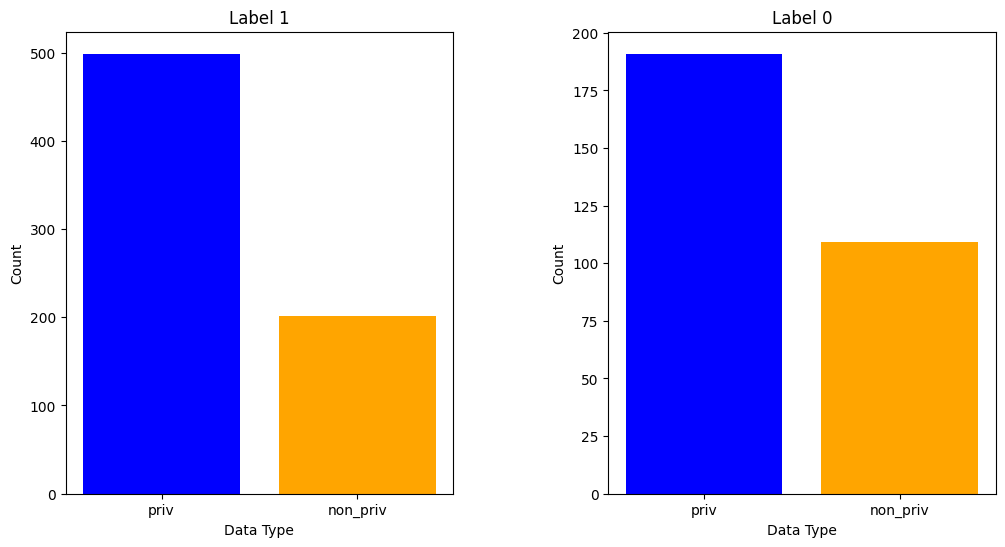

In [14]:
# Plot for orig_data_one_priv.shape[0] and orig_data_one_non_priv.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar colors
colors = ['blue', 'orange']

# Plot 1 - orig_data_one_priv and orig_data_one_non_priv
axs[0].bar(['priv', 'non_priv'], [orig_data_one_priv.shape[0], orig_data_one_non_priv.shape[0]], color=colors)
axs[0].set_xlabel('Data Type')
axs[0].set_ylabel('Count')
axs[0].set_title('Label 1')

# Plot 2 - orig_data_zero_priv and orig_data_zero_non_priv
axs[1].bar(['priv', 'non_priv'], [orig_data_zero_priv.shape[0], orig_data_zero_non_priv.shape[0]], color=colors)
axs[1].set_xlabel('Data Type')
axs[1].set_ylabel('Count')
axs[1].set_title('Label 0')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('plot_original_ratios.jpg')


# Show the plots
plt.show()

In [15]:
orig_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,young
0,67,0,2,own,NaN,little,1169,6,radio/TV,1,1
1,22,1,2,own,little,moderate,5951,48,radio/TV,0,0
2,49,0,1,own,little,NaN,2096,12,education,1,1
3,45,0,2,free,little,little,7882,42,furniture/equipment,1,1
4,53,0,2,free,little,little,4870,24,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,own,little,NaN,1736,12,furniture/equipment,1,1
996,40,0,3,own,little,little,3857,30,car,1,1
997,38,0,2,own,little,NaN,804,12,radio/TV,1,1
998,23,0,2,free,little,little,1845,45,radio/TV,0,0


In [16]:
# dataset for training
orig_data.dropna(thresh=len(feature_columns)/2, inplace=True)
orig_data.reset_index(drop=True, inplace=True)

y_orig = orig_data[TARGET_COL]
# y_orig = orig_data[TARGET_COL].to_frame()

y_orig.dropna(inplace=True)

orig_data = orig_data.loc[:, feature_columns]
# data = data[feature_columns]
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(orig_data, y_orig)
orig_data_encoded = encoder.transform(orig_data)

In [17]:
orig_dataset = pd.concat([orig_data, y_orig], axis=1)


## Acc, fairness metrics and roc & auc for original dataset

conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.7288135593220338 recall:  0.9772727272727273 fpr:  0.7272727272727273 tpr:  0.9772727272727273 fn+fp 17
conf matrix:
  [[13 25]
 [10 86]] 
accuracy:  0.7388059701492538 precision:  0.7747747747747747 recall:  0.8958333333333334 fpr:  0.6

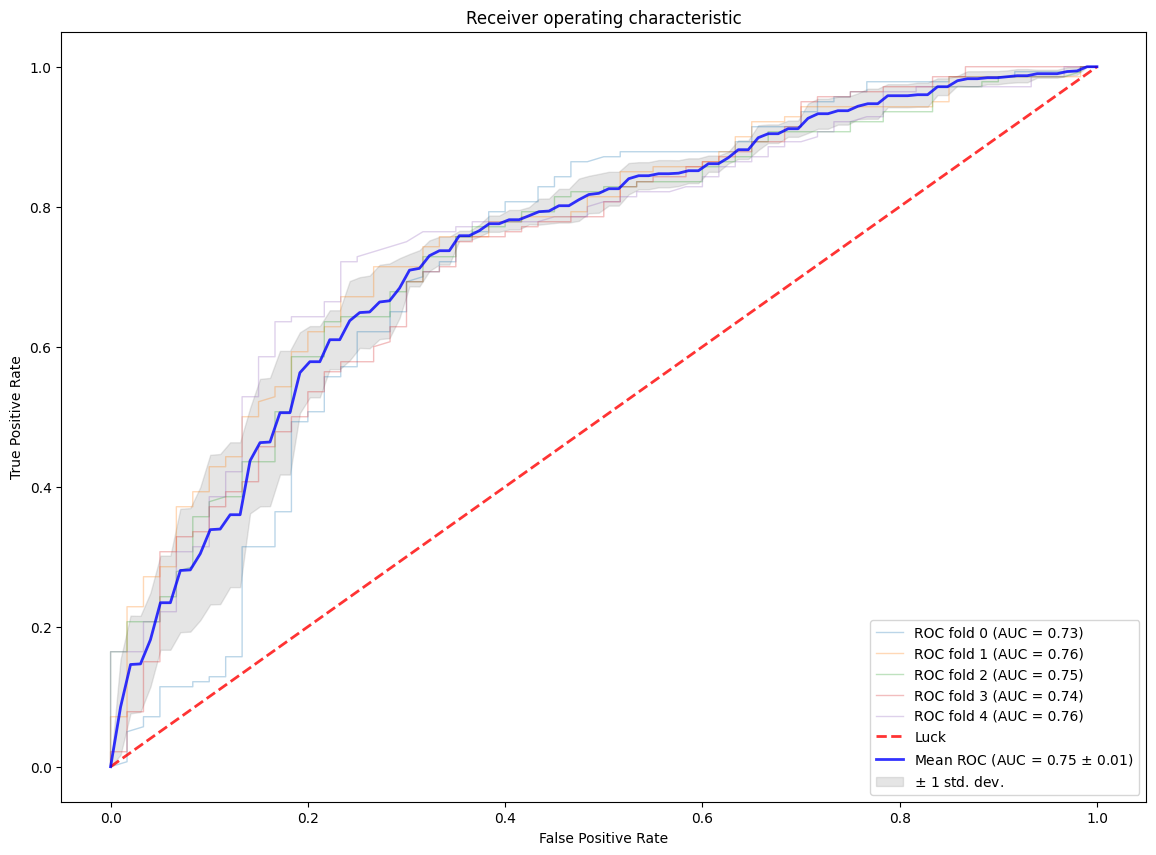

In [18]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

# CTGAN On Priv Target Group

In [19]:
orig_dataset[TARGET_COL] = orig_dataset[TARGET_COL].astype(int)

unprivileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
privileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
print(unprivileged_data_priv_target.shape[0])
print(privileged_data_priv_target.shape[0])

Accaracy list :  [0.74, 0.74, 0.73, 0.735, 0.715]
equal opportunity for tpr :  [0.06736993526732205, 0.08143939393939392, 0.08503401360544216, 0.04217536071032191, 0.05521155830753344]
equal opportunity for fpr :  [0.017142857142857126, 0.06937799043062198, 0.22499999999999998, 0.04999999999999993, 0.08133971291866038]
odds difference list :  [0.042256396205089586, 0.07540869218500795, 0.15501700680272107, 0.04608768035516092, 0.06827563561309691]
The mean accuracy is  0.732 ± 0.009
The mean equal opportunity for tpr: (close to 0) 0.066 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.089 ± 0.072
The mean odds difference: (close to 0) 0.077 ± 0.041
The mean parity difference: (close to 0) 0.403 ± 0.065
The mean disperate impact: (close to 1) 1.000 ± 0.000
201
499


In [20]:
unprivileged_data_priv_target

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
12,22,1,2,own,little,moderate,1567,12,radio/TV,1
14,28,1,2,rent,little,little,1403,15,car,1
27,42,1,2,rent,rich,rich,409,12,radio/TV,1
34,33,1,3,own,little,rich,1474,12,furniture/equipment,1
45,35,1,3,own,little,NaN,1393,11,car,1
...,...,...,...,...,...,...,...,...,...,...
976,64,1,2,own,little,moderate,753,6,radio/TV,1
982,28,1,3,own,moderate,rich,2923,21,car,1
985,25,1,2,rent,little,little,1433,15,furniture/equipment,1
987,64,1,2,own,moderate,NaN,1409,13,radio/TV,1


In [21]:
from ctgan import CTGAN
if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)
else:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(privileged_data_priv_target , CATEGORICAL, epochs = 200)


# from ctgan import CTGAN

# if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
#     ctgan_priv_target = CTGAN(verbose=True)
#     # Fit the synthesizer to the unprivileged features
#     ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)


Gen. (-0.50) | Discrim. (0.04): 100%|██████████| 200/200 [00:35<00:00,  5.60it/s]


# CTGAN On Unpriv Target Group

In [22]:
unprivileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]
privileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]

print(unprivileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0]-unprivileged_data_unpriv_target.shape[0])

109
191
82


In [23]:
from ctgan import CTGAN
if unprivileged_data_unpriv_target.shape[0] <= privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(unprivileged_data_unpriv_target , CATEGORICAL, epochs = 200)

if unprivileged_data_unpriv_target.shape[0] > privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(privileged_data_unpriv_target , CATEGORICAL, epochs = 200)


Gen. (0.64) | Discrim. (-0.02): 100%|██████████| 200/200 [00:16<00:00, 11.86it/s]


In [24]:
orig_dataset = pd.concat([orig_data_encoded, y_orig], axis=1)
orig_dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0.739130,0.825137,0.507299,1169,6,0.778571,1
1,22,1,2,0.739130,0.640133,0.609665,5951,48,0.778571,0
2,49,0,1,0.739130,0.640133,0.883249,2096,12,0.611952,1
3,45,0,2,0.592609,0.640133,0.507299,7882,42,0.679558,1
4,53,0,2,0.592609,0.640133,0.507299,4870,24,0.685460,0
...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,0.739130,0.640133,0.883249,1736,12,0.679558,1
996,40,0,3,0.739130,0.640133,0.507299,3857,30,0.685460,1
997,38,0,2,0.739130,0.640133,0.883249,804,12,0.778571,1
998,23,0,2,0.592609,0.640133,0.507299,1845,45,0.778571,0


In [25]:
print(DATASET_NAME)

CREDIT_SEX


Optuna FairUS

In [26]:
def Upsampling_Dataset(lambda_0, lambda_1):
    priv_target_samples = ctgan_priv_target.sample(math.floor(lambda_0 * (abs(privileged_data_priv_target.shape[0] - unprivileged_data_priv_target.shape[0]))))
    #print(priv_target_samples)
    # print('number of samples i added(lambda_0)', len(priv_target_samples))
    y_priv = priv_target_samples[TARGET_COL]
    priv_target_samples = priv_target_samples.loc[:, feature_columns]

    priv_target_samples = encoder.transform(priv_target_samples)
    priv_target_samples = pd.concat([priv_target_samples, y_priv], axis=1)

    unpriv_target_samples = ctgan_unpriv_target.sample(math.floor(lambda_1 * (abs(privileged_data_unpriv_target.shape[0] - unprivileged_data_unpriv_target.shape[0]))))
    # print('number of samples i added(lambda_1)', len(unpriv_target_samples))
    y_unpriv = unpriv_target_samples[TARGET_COL]
    unpriv_target_samples = unpriv_target_samples.loc[:, feature_columns]

    unpriv_target_samples = encoder.transform(unpriv_target_samples)
    unpriv_target_samples = pd.concat([unpriv_target_samples, y_unpriv], axis=1)

    if len((priv_target_samples)>0) and (len(unpriv_target_samples)==0):
        df_list = [orig_dataset, priv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(unpriv_target_samples)>0) and (len(priv_target_samples)==0):
        df_list = [orig_dataset, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_debias = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)>0) and (len(unpriv_target_samples)>0):
        df_list = [orig_dataset, priv_target_samples, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)==0) and (len(unpriv_target_samples)==0):
        upsampled_df = orig_dataset
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    return upsampled_df


In [27]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.1 MB/s eta 0:00:00


In [28]:
!pip install cmaes


In [29]:
import optuna


In [30]:
all_upsampled_acc = []
all_upsampled_od_diff = []

def FairUS_Finding_Optimal_Lambdas_Optuna(trial):

    # Initialize original Equalized odds and Accuracy Scores
    orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact = fairness_metrics_roc_auc_no_print(orig_data_encoded, y_orig)

    OrigFair_score = mean(orig_od_diff)
    OrigAcc_score = mean(orig_acc)

    # Initialize matrices to store Fairness and Accuracy results
    #Fairness_Matrix = np.zeros((num_steps, num_steps))
    #Accuracy_Matrix = np.zeros((num_steps, num_steps))

    lambda_0 =  trial.suggest_float("lambda_0", 0, 2)
    lambda_1 =  trial.suggest_float("lambda_1", 0, 2)

    upsampled_df = Upsampling_Dataset(lambda_0, lambda_1)
    y_debias = upsampled_df[TARGET_COL]
    upsampled_df_features = upsampled_df.loc[:, feature_columns]

    upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact = fairness_metrics_roc_auc_no_print(upsampled_df_features, y_debias)

    CurrFair_score = mean(upsampled_od_diff)
    CurrAcc_score = mean(upsampled_acc)
    # if ALPHA == 1:
    #   optimization_objective = CurrFair_score/mean(orig_od_diff)
    # else:
      # optimization_objective = (ALPHA*CurrFair_score/mean(orig_od_diff)) - ((1-ALPHA)*CurrAcc_score/mean(orig_acc))
    optimization_objective = (CurrFair_score/mean(orig_od_diff)) - (CurrAcc_score/mean(orig_acc))
    # optimization_objective = (CurrFair_score) - (CurrAcc_score)

    # Update fairness matrix with Equalized odds subtraction
    #Fairness_Matrix[i, j] = -(CurrFair_score - OrigFair_score)
    # Update accuracy matrix with Minos accuracy subtraction
    #Accuracy_Matrix[i, j] = (CurrAcc_score - OrigAcc_score)


    #fairness_delta = np.max(Fairness_Matrix)-np.min(Fairness_Matrix)
    #acc_delta = np.max(Accuracy_Matrix)-np.min(Accuracy_Matrix)
    #fairness_factor = acc_delta / fairness_delta
    #scaled_fairness_matrix = fairness_factor * Fairness_Matrix


    #Accuracy_Matrix = -(Accuracy_Matrix)
    #scaled_fairness_matrix= -(scaled_fairness_matrix)
    print ('lambda_0:',lambda_0)
    print ('lambda_1:',lambda_1)
    #print ('fairness matrix before scaling: ',Fairness_Matrix)
    #print ('fairness matrix after scaling: ',scaled_fairness_matrix)
    #print ('acc matrix is: ', Accuracy_Matrix)

    # Save upsampled_acc and upsampled_op_diff as trial attributes
    upsampled_acc = mean(upsampled_acc)
    upsampled_od_diff = mean(upsampled_od_diff)
    trial.set_user_attr('upsampled_acc', upsampled_acc)
    trial.set_user_attr('upsampled_op_diff', upsampled_od_diff)
    print('---------------------------------------trail upsampled_acc is : ', trial.user_attrs.get('upsampled_acc'))
    print('---------------------------------------trail upsampled_op_diff is : ', trial.user_attrs.get('upsampled_op_diff'))
    all_upsampled_acc.append(upsampled_acc)
    all_upsampled_od_diff.append(upsampled_od_diff)

    # Return optimal dataset upsampled with lambda_0, lambda_1 values
    # return optimization_objective #scaled_fairness_matrix
    return CurrFair_score, CurrAcc_score #for multi objective


In [31]:
# Record the start time
start_time = time.time()

In [32]:
CME_flag = False

if CME_flag:
  from optuna.samplers import CmaEsSampler

  # Create an instance of CmaEsSampler
  # Create an instance of CmaEsSampler with specified parameters
  cma_es_sampler = CmaEsSampler(
      sigma0=0.01,  # Initial standard deviation of the distribution.
      n_startup_trials=10,  # The number of trials before using CMA-ES.
      independent_sampler=optuna.samplers.RandomSampler(seed=0)  # Sampler used for the first `n_startup_trials`.
  )


  # Pass the instance of CmaEsSampler to create_study
  # study = optuna.create_study(sampler=cma_es_sampler, direction='minimize')
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=400)
else:
  from optuna.samplers import TPESampler

  # Create an instance of TPESampler with custom parameters
  # You can adjust parameters like n_startup_trials, n_ei_candidates, etc.
  tpe_sampler = TPESampler(n_startup_trials=20, n_ei_candidates=24, multivariate=True)

  # Pass the instance of TPESampler to create_study
  # study = optuna.create_study(sampler=tpe_sampler, direction='minimize') #directions=['minimize', 'maximize']
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=200)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-01 15:58:37,097] A new study created in memory with name: no-name-22e52972-ba6e-4a7e-8d40-063599c9c0f9


conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.7288135593220338 recall:  0.9772727272727273 fpr:  0.7272727272727273 tpr:  0.9772727272727273 fn+fp 17
conf matrix:
  [[13 25]
 [10 86]] 
accuracy:  0.7388059701492538 precision:  0.7747747747747747 recall:  0.8958333333333334 fpr:  0.6

[I 2024-04-01 15:58:38,470] Trial 0 finished with values: [0.06226172158414388, 0.777249513618677] and parameters: {'lambda_0': 0.9178564601097081, 'lambda_1': 0.14280043475525095}. 


tpr:  0.98 fn+fp 20
lambda_0: 0.9178564601097081
lambda_1: 0.14280043475525095
---------------------------------------trail upsampled_acc is :  0.777249513618677
---------------------------------------trail upsampled_op_diff is :  0.06226172158414388
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 

[I 2024-04-01 15:58:39,595] Trial 1 finished with values: [0.08568278339256287, 0.7286741016109045] and parameters: {'lambda_0': 0.7225835314799607, 'lambda_1': 1.6431265621220528}. 


conf matrix:
  [[12 32]
 [ 3 79]] 
accuracy:  0.7222222222222222 precision:  0.7117117117117117 recall:  0.9634146341463414 fpr:  0.7272727272727273 tpr:  0.9634146341463414 fn+fp 35
conf matrix:
  [[ 25  62]
 [ 19 164]] 
accuracy:  0.7 precision:  0.7256637168141593 recall:  0.8961748633879781 fpr:  0.7126436781609196 tpr:  0.8961748633879781 fn+fp 81
conf matrix:
  [[ 7 32]
 [11 84]] 
accuracy:  0.6791044776119403 precision:  0.7241379310344828 recall:  0.8842105263157894 fpr:  0.8205128205128205 tpr:  0.8842105263157894 fn+fp 43
conf matrix:
  [[18 30]
 [ 8 80]] 
accuracy:  0.7205882352941176 precision:  0.7272727272727273 recall:  0.9090909090909091 fpr:  0.625 tpr:  0.9090909090909091 fn+fp 38
conf matrix:
  [[ 43  43]
 [ 35 148]] 
accuracy:  0.7100371747211895 precision:  0.774869109947644 recall:  0.8087431693989071 fpr:  0.5 tpr:  0.8087431693989071 fn+fp 78
conf matrix:
  [[12 22]
 [17 87]] 
accuracy:  0.717391304347826 precision:  0.7981651376146789 recall:  0.836538461538461

[I 2024-04-01 15:58:41,052] Trial 2 finished with values: [0.029428916500773238, 0.7685081130103901] and parameters: {'lambda_0': 1.655523729287686, 'lambda_1': 1.2389618159217195}. 


conf matrix:
  [[  5  36]
 [  2 138]] 
accuracy:  0.7900552486187845 precision:  0.7931034482758621 recall:  0.9857142857142858 fpr:  0.8780487804878049 tpr:  0.9857142857142858 fn+fp 38
lambda_0: 1.655523729287686
lambda_1: 1.2389618159217195
---------------------------------------trail upsampled_acc is :  0.7685081130103901
---------------------------------------trail upsampled_op_diff is :  0.029428916500773238
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.75

[I 2024-04-01 15:58:41,898] Trial 3 finished with values: [0.04332410664316494, 0.7316845107298143] and parameters: {'lambda_0': 1.1281871662513128, 'lambda_1': 1.5274892978871017}. 


0.7328767123287672 precision:  0.7362637362637363 recall:  0.9710144927536232 fpr:  0.8470588235294118 tpr:  0.9710144927536232 fn+fp 78
conf matrix:
  [[  4  26]
 [  3 102]] 
accuracy:  0.7851851851851852 precision:  0.796875 recall:  0.9714285714285714 fpr:  0.8666666666666667 tpr:  0.9714285714285714 fn+fp 29
conf matrix:
  [[ 9 46]
 [ 3 99]] 
accuracy:  0.6878980891719745 precision:  0.6827586206896552 recall:  0.9705882352941176 fpr:  0.8363636363636363 tpr:  0.9705882352941176 fn+fp 49
conf matrix:
  [[ 20  65]
 [ 12 195]] 
accuracy:  0.7363013698630136 precision:  0.75 recall:  0.9420289855072463 fpr:  0.7647058823529411 tpr:  0.9420289855072463 fn+fp 77
conf matrix:
  [[ 7 33]
 [ 4 97]] 
accuracy:  0.7375886524822695 precision:  0.7461538461538462 recall:  0.9603960396039604 fpr:  0.825 tpr:  0.9603960396039604 fn+fp 37
conf matrix:
  [[13 32]
 [ 8 98]] 
accuracy:  0.7350993377483444 precision:  0.7538461538461538 recall:  0.9245283018867925 fpr:  0.7111111111111111 tpr:  0.924

[I 2024-04-01 15:58:43,185] Trial 4 finished with values: [0.05810414737596194, 0.7610954472930737] and parameters: {'lambda_0': 1.3141048180589792, 'lambda_1': 1.4655821243276734}. 


conf matrix:
  [[ 22  62]
 [  9 209]] 
accuracy:  0.7649006622516556 precision:  0.7712177121771218 recall:  0.9587155963302753 fpr:  0.7380952380952381 tpr:  0.9587155963302753 fn+fp 71
conf matrix:
  [[ 5 33]
 [ 4 93]] 
accuracy:  0.725925925925926 precision:  0.7380952380952381 recall:  0.9587628865979382 fpr:  0.868421052631579 tpr:  0.9587628865979382 fn+fp 37
conf matrix:
  [[ 17  29]
 [  5 116]] 
accuracy:  0.7964071856287425 precision:  0.8 recall:  0.9586776859504132 fpr:  0.6304347826086957 tpr:  0.9586776859504132 fn+fp 34
lambda_0: 1.3141048180589792
lambda_1: 1.4655821243276734
---------------------------------------trail upsampled_acc is :  0.7610954472930737
---------------------------------------trail upsampled_op_diff is :  0.05810414737596194
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 preci

[I 2024-04-01 15:58:44,564] Trial 5 finished with values: [0.0963943603514864, 0.7162717219589257] and parameters: {'lambda_0': 0.02700357639377393, 'lambda_1': 0.5641279726307258}. 


conf matrix:
  [[ 20  49]
 [ 21 120]] 
accuracy:  0.6666666666666666 precision:  0.7100591715976331 recall:  0.851063829787234 fpr:  0.7101449275362319 tpr:  0.851063829787234 fn+fp 70
conf matrix:
  [[14 22]
 [ 6 35]] 
accuracy:  0.6363636363636364 precision:  0.6140350877192983 recall:  0.8536585365853658 fpr:  0.6111111111111112 tpr:  0.8536585365853658 fn+fp 28
conf matrix:
  [[ 6 27]
 [15 85]] 
accuracy:  0.6842105263157895 precision:  0.7589285714285714 recall:  0.85 fpr:  0.8181818181818182 tpr:  0.85 fn+fp 42
lambda_0: 0.02700357639377393
lambda_1: 0.5641279726307258
---------------------------------------trail upsampled_acc is :  0.7162717219589257
---------------------------------------trail upsampled_op_diff is :  0.0963943603514864
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.79646017

[I 2024-04-01 15:58:46,014] Trial 6 finished with values: [0.10155122781561739, 0.7424004604196097] and parameters: {'lambda_0': 0.8157198622811239, 'lambda_1': 1.7009927581158728}. 


conf matrix:
  [[ 34  54]
 [ 24 164]] 
accuracy:  0.717391304347826 precision:  0.7522935779816514 recall:  0.8723404255319149 fpr:  0.6136363636363636 tpr:  0.8723404255319149 fn+fp 78
conf matrix:
  [[12 30]
 [14 93]] 
accuracy:  0.7046979865771812 precision:  0.7560975609756098 recall:  0.8691588785046729 fpr:  0.7142857142857143 tpr:  0.8691588785046729 fn+fp 44
conf matrix:
  [[22 24]
 [10 71]] 
accuracy:  0.7322834645669292 precision:  0.7473684210526316 recall:  0.8765432098765432 fpr:  0.5217391304347826 tpr:  0.8765432098765432 fn+fp 34
lambda_0: 0.8157198622811239
lambda_1: 1.7009927581158728
---------------------------------------trail upsampled_acc is :  0.7424004604196097
---------------------------------------trail upsampled_op_diff is :  0.10155122781561739
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727

[I 2024-04-01 15:58:47,601] Trial 7 finished with values: [0.05441240276440483, 0.7621310062486533] and parameters: {'lambda_0': 1.0433984926503557, 'lambda_1': 0.6386342842639587}. 


conf matrix:
  [[  9  61]
 [  4 198]] 
accuracy:  0.7610294117647058 precision:  0.7644787644787645 recall:  0.9801980198019802 fpr:  0.8714285714285714 tpr:  0.9801980198019802 fn+fp 65
conf matrix:
  [[ 3 37]
 [ 4 99]] 
accuracy:  0.7132867132867133 precision:  0.7279411764705882 recall:  0.9611650485436893 fpr:  0.925 tpr:  0.9611650485436893 fn+fp 41
conf matrix:
  [[ 6 24]
 [ 0 99]] 
accuracy:  0.813953488372093 precision:  0.8048780487804879 recall:  1.0 fpr:  0.8 tpr:  1.0 fn+fp 24
lambda_0: 1.0433984926503557
lambda_1: 0.6386342842639587
---------------------------------------trail upsampled_acc is :  0.7621310062486533
---------------------------------------trail upsampled_op_diff is :  0.05441240276440483
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.927835051

[I 2024-04-01 15:58:49,199] Trial 8 finished with values: [0.07542621146341705, 0.7795171488790956] and parameters: {'lambda_0': 1.5974269789951807, 'lambda_1': 0.6984042333691931}. 


conf matrix:
  [[ 10  61]
 [  3 232]] 
accuracy:  0.7908496732026143 precision:  0.7918088737201365 recall:  0.9872340425531915 fpr:  0.8591549295774648 tpr:  0.9872340425531915 fn+fp 64
conf matrix:
  [[  3  29]
 [  1 134]] 
accuracy:  0.8203592814371258 precision:  0.8220858895705522 recall:  0.9925925925925926 fpr:  0.90625 tpr:  0.9925925925925926 fn+fp 30
conf matrix:
  [[ 7 32]
 [ 2 98]] 
accuracy:  0.7553956834532374 precision:  0.7538461538461538 recall:  0.98 fpr:  0.8205128205128205 tpr:  0.98 fn+fp 34
lambda_0: 1.5974269789951807
lambda_1: 0.6984042333691931
---------------------------------------trail upsampled_acc is :  0.7795171488790956
---------------------------------------trail upsampled_op_diff is :  0.07542621146341705
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911

[I 2024-04-01 15:58:50,568] Trial 9 finished with values: [0.09665721057376023, 0.7236947791164658] and parameters: {'lambda_0': 0.4756396109521126, 'lambda_1': 1.2759122655796715}. 


conf matrix:
  [[ 33  48]
 [ 19 149]] 
accuracy:  0.7309236947791165 precision:  0.7563451776649747 recall:  0.8869047619047619 fpr:  0.5925925925925926 tpr:  0.8869047619047619 fn+fp 67
conf matrix:
  [[16 23]
 [10 86]] 
accuracy:  0.7555555555555555 precision:  0.7889908256880734 recall:  0.8958333333333334 fpr:  0.5897435897435898 tpr:  0.8958333333333334 fn+fp 33
conf matrix:
  [[17 25]
 [ 9 63]] 
accuracy:  0.7017543859649122 precision:  0.7159090909090909 recall:  0.875 fpr:  0.5952380952380952 tpr:  0.875 fn+fp 34
lambda_0: 0.4756396109521126
lambda_1: 1.2759122655796715
---------------------------------------trail upsampled_acc is :  0.7236947791164658
---------------------------------------trail upsampled_op_diff is :  0.09665721057376023
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964

[I 2024-04-01 15:58:52,810] Trial 10 finished with values: [0.06806281630950298, 0.7687115427385277] and parameters: {'lambda_0': 1.7441825548841983, 'lambda_1': 1.5169144486010226}. 


0.7727272727272727 precision:  0.7711864406779662 recall:  0.9680851063829787 fpr:  0.7105263157894737 tpr:  0.9680851063829787 fn+fp 30
conf matrix:
  [[  6  41]
 [  3 146]] 
accuracy:  0.7755102040816326 precision:  0.7807486631016043 recall:  0.9798657718120806 fpr:  0.8723404255319149 tpr:  0.9798657718120806 fn+fp 44
lambda_0: 1.7441825548841983
lambda_1: 1.5169144486010226
---------------------------------------trail upsampled_acc is :  0.7687115427385277
---------------------------------------trail upsampled_op_diff is :  0.06806281630950298
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:

[I 2024-04-01 15:58:55,175] Trial 11 finished with values: [0.21225363748870252, 0.7133665173386428] and parameters: {'lambda_0': 0.23734738505858632, 'lambda_1': 1.9325394044325015}. 


conf matrix:
  [[ 40  51]
 [ 19 135]] 
accuracy:  0.7142857142857143 precision:  0.7258064516129032 recall:  0.8766233766233766 fpr:  0.5604395604395604 tpr:  0.8766233766233766 fn+fp 70
conf matrix:
  [[  9  25]
 [  6 102]] 
accuracy:  0.7816901408450704 precision:  0.8031496062992126 recall:  0.9444444444444444 fpr:  0.7352941176470589 tpr:  0.9444444444444444 fn+fp 31
conf matrix:
  [[31 26]
 [13 33]] 
accuracy:  0.6213592233009708 precision:  0.559322033898305 recall:  0.717391304347826 fpr:  0.45614035087719296 tpr:  0.717391304347826 fn+fp 39
conf matrix:
  [[ 51  40]
 [ 27 127]] 
accuracy:  0.726530612244898 precision:  0.7604790419161677 recall:  0.8246753246753247 fpr:  0.43956043956043955 tpr:  0.8246753246753247 fn+fp 67
conf matrix:
  [[19 25]
 [15 88]] 
accuracy:  0.7278911564625851 precision:  0.7787610619469026 recall:  0.8543689320388349 fpr:  0.5681818181818182 tpr:  0.8543689320388349 fn+fp 40
conf matrix:
  [[32 15]
 [12 39]] 
accuracy:  0.7244897959183674 precision:

[I 2024-04-01 15:58:56,831] Trial 12 finished with values: [0.03879404461196475, 0.7834202898550725] and parameters: {'lambda_0': 1.5041391631012981, 'lambda_1': 0.585701144192714}. 


 [[ 5 31]
 [ 5 89]] 
accuracy:  0.7230769230769231 precision:  0.7416666666666667 recall:  0.9468085106382979 fpr:  0.8611111111111112 tpr:  0.9468085106382979 fn+fp 36
conf matrix:
  [[  5  29]
 [  2 133]] 
accuracy:  0.8165680473372781 precision:  0.8209876543209876 recall:  0.9851851851851852 fpr:  0.8529411764705882 tpr:  0.9851851851851852 fn+fp 31
lambda_0: 1.5041391631012981
lambda_1: 0.585701144192714
---------------------------------------trail upsampled_acc is :  0.7834202898550725
---------------------------------------trail upsampled_op_diff is :  0.03879404461196475
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precisi

[I 2024-04-01 15:58:58,654] Trial 13 finished with values: [0.0637300807445815, 0.761897843883316] and parameters: {'lambda_0': 1.2941057523071513, 'lambda_1': 1.0863687544148757}. 


conf matrix:
  [[ 25  52]
 [  7 210]] 
accuracy:  0.7993197278911565 precision:  0.8015267175572519 recall:  0.967741935483871 fpr:  0.6753246753246753 tpr:  0.967741935483871 fn+fp 59
conf matrix:
  [[14 32]
 [ 4 96]] 
accuracy:  0.7534246575342466 precision:  0.75 recall:  0.96 fpr:  0.6956521739130435 tpr:  0.96 fn+fp 36
conf matrix:
  [[ 11  20]
 [  3 114]] 
accuracy:  0.8445945945945946 precision:  0.8507462686567164 recall:  0.9743589743589743 fpr:  0.6451612903225806 tpr:  0.9743589743589743 fn+fp 23
lambda_0: 1.2941057523071513
lambda_1: 1.0863687544148757
---------------------------------------trail upsampled_acc is :  0.761897843883316
---------------------------------------trail upsampled_op_diff is :  0.0637300807445815
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 rec

[I 2024-04-01 15:59:00,154] Trial 14 finished with values: [0.06382467206068693, 0.7556311018131102] and parameters: {'lambda_0': 0.6246644341279937, 'lambda_1': 0.16053574372760893}. 


conf matrix:
  [[10 26]
 [ 6 91]] 
accuracy:  0.7593984962406015 precision:  0.7777777777777778 recall:  0.9381443298969072 fpr:  0.7222222222222222 tpr:  0.9381443298969072 fn+fp 32
conf matrix:
  [[ 2 24]
 [ 2 78]] 
accuracy:  0.7547169811320755 precision:  0.7647058823529411 recall:  0.975 fpr:  0.9230769230769231 tpr:  0.975 fn+fp 26
lambda_0: 0.6246644341279937
lambda_1: 0.16053574372760893
---------------------------------------trail upsampled_acc is :  0.7556311018131102
---------------------------------------trail upsampled_op_diff is :  0.06382467206068693
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132

[I 2024-04-01 15:59:01,944] Trial 15 finished with values: [0.08836506174734324, 0.7282598859831689] and parameters: {'lambda_0': 0.6096542764689319, 'lambda_1': 1.3107179872521664}. 


 [[15 24]
 [11 75]] 
accuracy:  0.72 precision:  0.7575757575757576 recall:  0.872093023255814 fpr:  0.6153846153846154 tpr:  0.872093023255814 fn+fp 35
conf matrix:
  [[12 30]
 [ 5 85]] 
accuracy:  0.7348484848484849 precision:  0.7391304347826086 recall:  0.9444444444444444 fpr:  0.7142857142857143 tpr:  0.9444444444444444 fn+fp 35
conf matrix:
  [[ 27  54]
 [ 16 160]] 
accuracy:  0.7276264591439688 precision:  0.7476635514018691 recall:  0.9090909090909091 fpr:  0.6666666666666666 tpr:  0.9090909090909091 fn+fp 70
conf matrix:
  [[ 8 30]
 [ 9 88]] 
accuracy:  0.7111111111111111 precision:  0.7457627118644068 recall:  0.9072164948453608 fpr:  0.7894736842105263 tpr:  0.9072164948453608 fn+fp 39
conf matrix:
  [[19 24]
 [ 7 72]] 
accuracy:  0.7459016393442623 precision:  0.75 recall:  0.9113924050632911 fpr:  0.5581395348837209 tpr:  0.9113924050632911 fn+fp 31
lambda_0: 0.6096542764689319
lambda_1: 1.3107179872521664
---------------------------------------trail upsampled_acc is :  0.

[I 2024-04-01 15:59:03,636] Trial 16 finished with values: [0.09204648730912443, 0.7314520946419759] and parameters: {'lambda_0': 0.7858119315998071, 'lambda_1': 1.900324695153159}. 


conf matrix:
  [[ 9 26]
 [ 7 90]] 
accuracy:  0.75 precision:  0.7758620689655172 recall:  0.9278350515463918 fpr:  0.7428571428571429 tpr:  0.9278350515463918 fn+fp 33
conf matrix:
  [[22 34]
 [12 78]] 
accuracy:  0.684931506849315 precision:  0.6964285714285714 recall:  0.8666666666666667 fpr:  0.6071428571428571 tpr:  0.8666666666666667 fn+fp 46
conf matrix:
  [[ 48  43]
 [ 35 151]] 
accuracy:  0.7184115523465704 precision:  0.7783505154639175 recall:  0.8118279569892473 fpr:  0.4725274725274725 tpr:  0.8118279569892473 fn+fp 78
conf matrix:
  [[14 21]
 [16 77]] 
accuracy:  0.7109375 precision:  0.7857142857142857 recall:  0.8279569892473119 fpr:  0.6 tpr:  0.8279569892473119 fn+fp 37
conf matrix:
  [[34 22]
 [19 74]] 
accuracy:  0.7248322147651006 precision:  0.7708333333333334 recall:  0.7956989247311828 fpr:  0.39285714285714285 tpr:  0.7956989247311828 fn+fp 41
lambda_0: 0.7858119315998071
lambda_1: 1.900324695153159
---------------------------------------trail upsampled_acc is 

[I 2024-04-01 15:59:05,678] Trial 17 finished with values: [0.06605547211918919, 0.7707420725727362] and parameters: {'lambda_0': 1.7082731235879196, 'lambda_1': 1.2817785295041697}. 


conf matrix:
  [[ 7 32]
 [ 7 96]] 
accuracy:  0.7253521126760564 precision:  0.75 recall:  0.9320388349514563 fpr:  0.8205128205128205 tpr:  0.9320388349514563 fn+fp 39
conf matrix:
  [[  4  38]
 [  4 134]] 
accuracy:  0.7666666666666667 precision:  0.7790697674418605 recall:  0.9710144927536232 fpr:  0.9047619047619048 tpr:  0.9710144927536232 fn+fp 42
lambda_0: 1.7082731235879196
lambda_1: 1.2817785295041697
---------------------------------------trail upsampled_acc is :  0.7707420725727362
---------------------------------------trail upsampled_op_diff is :  0.06605547211918919
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precis

[I 2024-04-01 15:59:08,268] Trial 18 finished with values: [0.05907927301890009, 0.7740827856566356] and parameters: {'lambda_0': 1.4165226356596776, 'lambda_1': 0.6362424999653269}. 


conf matrix:
  [[ 10  60]
 [  7 217]] 
accuracy:  0.7721088435374149 precision:  0.7833935018050542 recall:  0.96875 fpr:  0.8571428571428571 tpr:  0.96875 fn+fp 67
conf matrix:
  [[  6  29]
 [  2 125]] 
accuracy:  0.808641975308642 precision:  0.8116883116883117 recall:  0.984251968503937 fpr:  0.8285714285714286 tpr:  0.984251968503937 fn+fp 31
conf matrix:
  [[ 4 31]
 [ 5 92]] 
accuracy:  0.7272727272727273 precision:  0.7479674796747967 recall:  0.9484536082474226 fpr:  0.8857142857142857 tpr:  0.9484536082474226 fn+fp 36
lambda_0: 1.4165226356596776
lambda_1: 0.6362424999653269
---------------------------------------trail upsampled_acc is :  0.7740827856566356
---------------------------------------trail upsampled_op_diff is :  0.05907927301890009
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0

[I 2024-04-01 15:59:10,420] Trial 19 finished with values: [0.05896686592170723, 0.7847619047619048] and parameters: {'lambda_0': 1.7338136103019195, 'lambda_1': 0.7315404183120402}. 


conf matrix:
  [[ 11  61]
 [  7 236]] 
accuracy:  0.7841269841269841 precision:  0.7946127946127947 recall:  0.9711934156378601 fpr:  0.8472222222222222 tpr:  0.9711934156378601 fn+fp 68
conf matrix:
  [[ 9 34]
 [ 6 84]] 
accuracy:  0.6992481203007519 precision:  0.711864406779661 recall:  0.9333333333333333 fpr:  0.7906976744186046 tpr:  0.9333333333333333 fn+fp 40
conf matrix:
  [[  2  27]
 [  1 152]] 
accuracy:  0.8461538461538461 precision:  0.8491620111731844 recall:  0.9934640522875817 fpr:  0.9310344827586207 tpr:  0.9934640522875817 fn+fp 28
lambda_0: 1.7338136103019195
lambda_1: 0.7315404183120402
---------------------------------------trail upsampled_acc is :  0.7847619047619048
---------------------------------------trail upsampled_op_diff is :  0.05896686592170723
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.772727

[I 2024-04-01 15:59:12,647] Trial 20 finished with values: [0.044916036188175766, 0.817490456098051] and parameters: {'lambda_0': 1.908086011554459, 'lambda_1': 0.12414495387569735}. 


conf matrix:
  [[  9  53]
 [  5 248]] 
accuracy:  0.8158730158730159 precision:  0.8239202657807309 recall:  0.9802371541501976 fpr:  0.8548387096774194 tpr:  0.9802371541501976 fn+fp 58
conf matrix:
  [[ 6 26]
 [ 3 88]] 
accuracy:  0.7642276422764228 precision:  0.7719298245614035 recall:  0.967032967032967 fpr:  0.8125 tpr:  0.967032967032967 fn+fp 29
conf matrix:
  [[  3  27]
 [  2 160]] 
accuracy:  0.8489583333333334 precision:  0.8556149732620321 recall:  0.9876543209876543 fpr:  0.9 tpr:  0.9876543209876543 fn+fp 29
lambda_0: 1.908086011554459
lambda_1: 0.12414495387569735
---------------------------------------trail upsampled_acc is :  0.817490456098051
---------------------------------------trail upsampled_op_diff is :  0.044916036188175766
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.796

[I 2024-04-01 15:59:14,028] Trial 21 finished with values: [0.07390133794580118, 0.8137174374541198] and parameters: {'lambda_0': 1.9135655850110347, 'lambda_1': 0.23791474516856215}. 


conf matrix:
  [[  6  57]
 [  3 251]] 
accuracy:  0.8107255520504731 precision:  0.814935064935065 recall:  0.9881889763779528 fpr:  0.9047619047619048 tpr:  0.9881889763779528 fn+fp 60
conf matrix:
  [[ 2 35]
 [ 3 98]] 
accuracy:  0.7246376811594203 precision:  0.7368421052631579 recall:  0.9702970297029703 fpr:  0.9459459459459459 tpr:  0.9702970297029703 fn+fp 38
conf matrix:
  [[  4  22]
 [  0 153]] 
accuracy:  0.8770949720670391 precision:  0.8742857142857143 recall:  1.0 fpr:  0.8461538461538461 tpr:  1.0 fn+fp 22
lambda_0: 1.9135655850110347
lambda_1: 0.23791474516856215
---------------------------------------trail upsampled_acc is :  0.8137174374541198
---------------------------------------trail upsampled_op_diff is :  0.07390133794580118
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964

[I 2024-04-01 15:59:15,770] Trial 22 finished with values: [0.05027482032469547, 0.7869072665479852] and parameters: {'lambda_0': 1.9448700082683912, 'lambda_1': 1.0638748714276627}. 


conf matrix:
  [[ 11  67]
 [  5 250]] 
accuracy:  0.7837837837837838 precision:  0.7886435331230284 recall:  0.9803921568627451 fpr:  0.8589743589743589 tpr:  0.9803921568627451 fn+fp 72
conf matrix:
  [[ 7 44]
 [ 2 89]] 
accuracy:  0.676056338028169 precision:  0.6691729323308271 recall:  0.978021978021978 fpr:  0.8627450980392157 tpr:  0.978021978021978 fn+fp 46
conf matrix:
  [[  4  23]
 [  3 161]] 
accuracy:  0.8638743455497382 precision:  0.875 recall:  0.9817073170731707 fpr:  0.8518518518518519 tpr:  0.9817073170731707 fn+fp 26
lambda_0: 1.9448700082683912
lambda_1: 1.0638748714276627
---------------------------------------trail upsampled_acc is :  0.7869072665479852
---------------------------------------trail upsampled_op_diff is :  0.05027482032469547
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 prec

[I 2024-04-01 15:59:17,487] Trial 23 finished with values: [0.055663139738540625, 0.8021824429430475] and parameters: {'lambda_0': 1.5342475688549417, 'lambda_1': 0.11710137058589631}. 


conf matrix:
  [[ 12  50]
 [  5 226]] 
accuracy:  0.8122866894197952 precision:  0.8188405797101449 recall:  0.9783549783549783 fpr:  0.8064516129032258 tpr:  0.9783549783549783 fn+fp 55
conf matrix:
  [[ 9 31]
 [ 4 93]] 
accuracy:  0.7445255474452555 precision:  0.75 recall:  0.9587628865979382 fpr:  0.775 tpr:  0.9587628865979382 fn+fp 35
conf matrix:
  [[  3  19]
 [  1 133]] 
accuracy:  0.8717948717948718 precision:  0.875 recall:  0.9925373134328358 fpr:  0.8636363636363636 tpr:  0.9925373134328358 fn+fp 20
lambda_0: 1.5342475688549417
lambda_1: 0.11710137058589631
---------------------------------------trail upsampled_acc is :  0.8021824429430475
---------------------------------------trail upsampled_op_diff is :  0.055663139738540625
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.796460176991

[I 2024-04-01 15:59:19,224] Trial 24 finished with values: [0.04428086486296771, 0.754111658089058] and parameters: {'lambda_0': 1.65379071862616, 'lambda_1': 1.7947880877328155}. 


lambda_0: 1.65379071862616
lambda_1: 1.7947880877328155
---------------------------------------trail upsampled_acc is :  0.754111658089058
---------------------------------------trail upsampled_op_diff is :  0.04428086486296771
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.728813559

[I 2024-04-01 15:59:20,385] Trial 25 finished with values: [0.05352230956220992, 0.7691824870093121] and parameters: {'lambda_0': 1.9869318734397656, 'lambda_1': 1.4106721522268013}. 


recall:  0.9595959595959596 fpr:  0.8461538461538461 tpr:  0.9595959595959596 fn+fp 37
conf matrix:
  [[  4  40]
 [  2 157]] 
accuracy:  0.7931034482758621 precision:  0.7969543147208121 recall:  0.9874213836477987 fpr:  0.9090909090909091 tpr:  0.9874213836477987 fn+fp 42
lambda_0: 1.9869318734397656
lambda_1: 1.4106721522268013
---------------------------------------trail upsampled_acc is :  0.7691824870093121
---------------------------------------trail upsampled_op_diff is :  0.05352230956220992
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162

[I 2024-04-01 15:59:21,306] Trial 26 finished with values: [0.18480650627671674, 0.7236027883086706] and parameters: {'lambda_0': 0.05130928574175497, 'lambda_1': 1.1301489986117432}. 


conf matrix:
  [[ 35  43]
 [ 14 129]] 
accuracy:  0.7420814479638009 precision:  0.75 recall:  0.9020979020979021 fpr:  0.5512820512820513 tpr:  0.9020979020979021 fn+fp 57
conf matrix:
  [[21 13]
 [ 8 37]] 
accuracy:  0.7341772151898734 precision:  0.74 recall:  0.8222222222222222 fpr:  0.38235294117647056 tpr:  0.8222222222222222 fn+fp 21
conf matrix:
  [[14 30]
 [ 6 92]] 
accuracy:  0.7464788732394366 precision:  0.7540983606557377 recall:  0.9387755102040817 fpr:  0.6818181818181818 tpr:  0.9387755102040817 fn+fp 36
lambda_0: 0.05130928574175497
lambda_1: 1.1301489986117432
---------------------------------------trail upsampled_acc is :  0.7236027883086706
---------------------------------------trail upsampled_op_diff is :  0.18480650627671674
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964

[I 2024-04-01 15:59:22,124] Trial 27 finished with values: [0.05386242759043536, 0.7664771880522024] and parameters: {'lambda_0': 1.4835323346862113, 'lambda_1': 1.1139604924833537}. 


conf matrix:
  [[10 24]
 [ 4 92]] 
accuracy:  0.7846153846153846 precision:  0.7931034482758621 recall:  0.9583333333333334 fpr:  0.7058823529411765 tpr:  0.9583333333333334 fn+fp 28
conf matrix:
  [[  6  38]
 [  3 129]] 
accuracy:  0.7670454545454546 precision:  0.7724550898203593 recall:  0.9772727272727273 fpr:  0.8636363636363636 tpr:  0.9772727272727273 fn+fp 41
conf matrix:
  [[  9  69]
 [  2 226]] 
accuracy:  0.7679738562091504 precision:  0.7661016949152543 recall:  0.9912280701754386 fpr:  0.8846153846153846 tpr:  0.9912280701754386 fn+fp 71
conf matrix:
  [[  3  37]
 [  0 118]] 
accuracy:  0.7658227848101266 precision:  0.7612903225806451 recall:  1.0 fpr:  0.925 tpr:  1.0 fn+fp 37
conf matrix:
  [[  6  32]
 [  2 108]] 
accuracy:  0.7702702702702703 precision:  0.7714285714285715 recall:  0.9818181818181818 fpr:  0.8421052631578947 tpr:  0.9818181818181818 fn+fp 34
lambda_0: 1.4835323346862113
lambda_1: 1.1139604924833537
---------------------------------------trail upsampled

[I 2024-04-01 15:59:22,943] Trial 28 finished with values: [0.08105146459378473, 0.7578984147266701] and parameters: {'lambda_0': 1.42437176940758, 'lambda_1': 1.9351160880204297}. 


recall:  0.9285714285714286 fpr:  0.6086956521739131 tpr:  0.9285714285714286 fn+fp 72
conf matrix:
  [[12 20]
 [ 9 89]] 
accuracy:  0.7769230769230769 precision:  0.8165137614678899 recall:  0.9081632653061225 fpr:  0.625 tpr:  0.9081632653061225 fn+fp 29
conf matrix:
  [[ 24  36]
 [  7 119]] 
accuracy:  0.7688172043010753 precision:  0.7677419354838709 recall:  0.9444444444444444 fpr:  0.6 tpr:  0.9444444444444444 fn+fp 43
lambda_0: 1.42437176940758
lambda_1: 1.9351160880204297
---------------------------------------trail upsampled_acc is :  0.7578984147266701
---------------------------------------trail upsampled_op_diff is :  0.08105146459378473
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30


[I 2024-04-01 15:59:23,801] Trial 29 finished with values: [0.0632868692408018, 0.7861818181818182] and parameters: {'lambda_0': 1.2095577893479317, 'lambda_1': 0.18986410292422584}. 


conf matrix:
  [[ 10  53]
 [  5 207]] 
accuracy:  0.7890909090909091 precision:  0.7961538461538461 recall:  0.9764150943396226 fpr:  0.8412698412698413 tpr:  0.9764150943396226 fn+fp 58
conf matrix:
  [[ 6 28]
 [ 4 89]] 
accuracy:  0.7480314960629921 precision:  0.7606837606837606 recall:  0.956989247311828 fpr:  0.8235294117647058 tpr:  0.956989247311828 fn+fp 32
conf matrix:
  [[  4  25]
 [  1 118]] 
accuracy:  0.8243243243243243 precision:  0.8251748251748252 recall:  0.9915966386554622 fpr:  0.8620689655172413 tpr:  0.9915966386554622 fn+fp 26
conf matrix:
  [[ 14  49]
 [  4 208]] 
accuracy:  0.8072727272727273 precision:  0.8093385214007782 recall:  0.9811320754716981 fpr:  0.7777777777777778 tpr:  0.9811320754716981 fn+fp 53
conf matrix:
  [[  6  19]
 [  1 108]] 
accuracy:  0.8507462686567164 precision:  0.8503937007874016 recall:  0.9908256880733946 fpr:  0.76 tpr:  0.9908256880733946 fn+fp 20
conf matrix:
  [[  8  30]
 [  3 100]] 
accuracy:  0.7659574468085106 precision:  0.76

[I 2024-04-01 15:59:24,639] Trial 30 finished with values: [0.031235770145220755, 0.7610752414844941] and parameters: {'lambda_0': 1.0689383828754124, 'lambda_1': 1.0307220267518065}. 


conf matrix:
  [[ 22  55]
 [ 10 193]] 
accuracy:  0.7678571428571429 precision:  0.7782258064516129 recall:  0.9507389162561576 fpr:  0.7142857142857143 tpr:  0.9507389162561576 fn+fp 65
conf matrix:
  [[13 27]
 [ 7 97]] 
accuracy:  0.7638888888888888 precision:  0.782258064516129 recall:  0.9326923076923077 fpr:  0.675 tpr:  0.9326923076923077 fn+fp 34
conf matrix:
  [[ 9 28]
 [ 3 96]] 
accuracy:  0.7720588235294118 precision:  0.7741935483870968 recall:  0.9696969696969697 fpr:  0.7567567567567568 tpr:  0.9696969696969697 fn+fp 31
lambda_0: 1.0689383828754124
lambda_1: 1.0307220267518065
---------------------------------------trail upsampled_acc is :  0.7610752414844941
---------------------------------------trail upsampled_op_diff is :  0.031235770145220755
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 preci

[I 2024-04-01 15:59:25,493] Trial 31 finished with values: [0.061635811879635315, 0.8151684952978057] and parameters: {'lambda_0': 1.9530028447089405, 'lambda_1': 0.19234065825439622}. 


conf matrix:
  [[  8  55]
 [  6 250]] 
accuracy:  0.8087774294670846 precision:  0.819672131147541 recall:  0.9765625 fpr:  0.873015873015873 tpr:  0.9765625 fn+fp 61
conf matrix:
  [[ 5 32]
 [ 6 87]] 
accuracy:  0.7076923076923077 precision:  0.7310924369747899 recall:  0.9354838709677419 fpr:  0.8648648648648649 tpr:  0.9354838709677419 fn+fp 38
conf matrix:
  [[  3  23]
 [  0 163]] 
accuracy:  0.8783068783068783 precision:  0.8763440860215054 recall:  1.0 fpr:  0.8846153846153846 tpr:  1.0 fn+fp 23
conf matrix:
  [[  8  55]
 [  5 251]] 
accuracy:  0.8119122257053292 precision:  0.8202614379084967 recall:  0.98046875 fpr:  0.873015873015873 tpr:  0.98046875 fn+fp 60
conf matrix:
  [[ 6 30]
 [ 5 90]] 
accuracy:  0.732824427480916 precision:  0.75 recall:  0.9473684210526315 fpr:  0.8333333333333334 tpr:  0.9473684210526315 fn+fp 35
conf matrix:
  [[  2  25]
 [  0 161]] 
accuracy:  0.8670212765957447 precision:  0.8655913978494624 recall:  1.0 fpr:  0.9259259259259259 tpr:  1.0 fn+fp 2

[I 2024-04-01 15:59:26,335] Trial 32 finished with values: [0.07917091667581821, 0.8096540117587918] and parameters: {'lambda_0': 1.6969007109421537, 'lambda_1': 0.10659658750423263}. 


conf matrix:
  [[  0  23]
 [  1 141]] 
accuracy:  0.8545454545454545 precision:  0.8597560975609756 recall:  0.9929577464788732 fpr:  1.0 tpr:  0.9929577464788732 fn+fp 24
conf matrix:
  [[ 10  51]
 [  2 239]] 
accuracy:  0.8245033112582781 precision:  0.8241379310344827 recall:  0.991701244813278 fpr:  0.8360655737704918 tpr:  0.991701244813278 fn+fp 53
conf matrix:
  [[  3  21]
 [  0 135]] 
accuracy:  0.8679245283018868 precision:  0.8653846153846154 recall:  1.0 fpr:  0.875 tpr:  1.0 fn+fp 21
conf matrix:
  [[  7  30]
 [  2 104]] 
accuracy:  0.7762237762237763 precision:  0.7761194029850746 recall:  0.9811320754716981 fpr:  0.8108108108108109 tpr:  0.9811320754716981 fn+fp 32
lambda_0: 1.6969007109421537
lambda_1: 0.10659658750423263
---------------------------------------trail upsampled_acc is :  0.8096540117587918
---------------------------------------trail upsampled_op_diff is :  0.07917091667581821
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.76506024096

[I 2024-04-01 15:59:27,184] Trial 33 finished with values: [0.06541014104484402, 0.8188905394680613] and parameters: {'lambda_0': 1.8880752842531976, 'lambda_1': 0.0757241034083743}. 


conf matrix:
  [[ 14  47]
 [  5 247]] 
accuracy:  0.8338658146964856 precision:  0.8401360544217688 recall:  0.9801587301587301 fpr:  0.7704918032786885 tpr:  0.9801587301587301 fn+fp 52
conf matrix:
  [[11 25]
 [ 3 94]] 
accuracy:  0.7894736842105263 precision:  0.7899159663865546 recall:  0.9690721649484536 fpr:  0.6944444444444444 tpr:  0.9690721649484536 fn+fp 28
conf matrix:
  [[  3  22]
 [  2 153]] 
accuracy:  0.8666666666666667 precision:  0.8742857142857143 recall:  0.9870967741935484 fpr:  0.88 tpr:  0.9870967741935484 fn+fp 24
conf matrix:
  [[ 11  50]
 [  5 247]] 
accuracy:  0.8242811501597445 precision:  0.8316498316498316 recall:  0.9801587301587301 fpr:  0.819672131147541 tpr:  0.9801587301587301 fn+fp 55
conf matrix:
  [[ 7 28]
 [ 5 98]] 
accuracy:  0.7608695652173914 precision:  0.7777777777777778 recall:  0.9514563106796117 fpr:  0.8 tpr:  0.9514563106796117 fn+fp 33
conf matrix:
  [[  4  22]
 [  0 149]] 
accuracy:  0.8742857142857143 precision:  0.8713450292397661 rec

[I 2024-04-01 15:59:28,088] Trial 34 finished with values: [0.05210801170074254, 0.7997480914562621] and parameters: {'lambda_0': 1.9219393034132857, 'lambda_1': 0.5089017902864198}. 


conf matrix:
  [[  9  59]
 [  8 246]] 
accuracy:  0.7919254658385093 precision:  0.8065573770491803 recall:  0.968503937007874 fpr:  0.8676470588235294 tpr:  0.968503937007874 fn+fp 67
conf matrix:
  [[  3  27]
 [  3 152]] 
accuracy:  0.8378378378378378 precision:  0.8491620111731844 recall:  0.9806451612903225 fpr:  0.9 tpr:  0.9806451612903225 fn+fp 30
conf matrix:
  [[ 6 32]
 [ 5 94]] 
accuracy:  0.7299270072992701 precision:  0.746031746031746 recall:  0.9494949494949495 fpr:  0.8421052631578947 tpr:  0.9494949494949495 fn+fp 37
conf matrix:
  [[ 10  58]
 [  6 248]] 
accuracy:  0.8012422360248447 precision:  0.8104575163398693 recall:  0.9763779527559056 fpr:  0.8529411764705882 tpr:  0.9763779527559056 fn+fp 64
conf matrix:
  [[ 9 33]
 [ 4 89]] 
accuracy:  0.725925925925926 precision:  0.7295081967213115 recall:  0.956989247311828 fpr:  0.7857142857142857 tpr:  0.956989247311828 fn+fp 37
conf matrix:
  [[  1  25]
 [  2 159]] 
accuracy:  0.8556149732620321 precision:  0.86413043478

[I 2024-04-01 15:59:28,910] Trial 35 finished with values: [0.05078400382335685, 0.8138862102217936] and parameters: {'lambda_0': 1.7669747505998892, 'lambda_1': 0.006776433745662322}. 


conf matrix:
  [[  7  53]
 [  0 245]] 
accuracy:  0.8262295081967214 precision:  0.8221476510067114 recall:  1.0 fpr:  0.8833333333333333 tpr:  1.0 fn+fp 53
conf matrix:
  [[ 5 32]
 [ 0 87]] 
accuracy:  0.7419354838709677 precision:  0.7310924369747899 recall:  1.0 fpr:  0.8648648648648649 tpr:  1.0 fn+fp 32
conf matrix:
  [[  2  21]
 [  0 158]] 
accuracy:  0.8839779005524862 precision:  0.88268156424581 recall:  1.0 fpr:  0.9130434782608695 tpr:  1.0 fn+fp 21
lambda_0: 1.7669747505998892
lambda_1: 0.006776433745662322
---------------------------------------trail upsampled_acc is :  0.8138862102217936
---------------------------------------trail upsampled_op_diff is :  0.05078400382335685
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.65714285714

[I 2024-04-01 15:59:29,740] Trial 36 finished with values: [0.05505305912984106, 0.8165188580044839] and parameters: {'lambda_0': 1.9496923505188763, 'lambda_1': 0.06316595438161066}. 


0.819672131147541 tpr:  0.98828125 fn+fp 53
conf matrix:
  [[ 6 33]
 [ 3 90]] 
accuracy:  0.7272727272727273 precision:  0.7317073170731707 recall:  0.967741935483871 fpr:  0.8461538461538461 tpr:  0.967741935483871 fn+fp 36
conf matrix:
  [[  5  17]
 [  0 163]] 
accuracy:  0.9081081081081082 precision:  0.9055555555555556 recall:  1.0 fpr:  0.7727272727272727 tpr:  1.0 fn+fp 17
conf matrix:
  [[  8  53]
 [  7 249]] 
accuracy:  0.8107255520504731 precision:  0.8245033112582781 recall:  0.97265625 fpr:  0.8688524590163934 tpr:  0.97265625 fn+fp 60
conf matrix:
  [[ 5 36]
 [ 6 89]] 
accuracy:  0.6911764705882353 precision:  0.712 recall:  0.9368421052631579 fpr:  0.8780487804878049 tpr:  0.9368421052631579 fn+fp 42
conf matrix:
  [[  3  17]
 [  1 160]] 
accuracy:  0.9005524861878453 precision:  0.903954802259887 recall:  0.9937888198757764 fpr:  0.85 tpr:  0.9937888198757764 fn+fp 18
lambda_0: 1.9496923505188763
lambda_1: 0.06316595438161066
---------------------------------------trail u

[I 2024-04-01 15:59:30,579] Trial 37 finished with values: [0.02606184691851614, 0.764784813257482] and parameters: {'lambda_0': 1.5321964387837568, 'lambda_1': 1.224732852657267}. 


conf matrix:
  [[ 12  68]
 [  6 225]] 
accuracy:  0.7620578778135049 precision:  0.7679180887372014 recall:  0.974025974025974 fpr:  0.85 tpr:  0.974025974025974 fn+fp 74
conf matrix:
  [[  5  30]
 [  4 135]] 
accuracy:  0.8045977011494253 precision:  0.8181818181818182 recall:  0.9712230215827338 fpr:  0.8571428571428571 tpr:  0.9712230215827338 fn+fp 34
conf matrix:
  [[ 7 38]
 [ 2 90]] 
accuracy:  0.708029197080292 precision:  0.703125 recall:  0.9782608695652174 fpr:  0.8444444444444444 tpr:  0.9782608695652174 fn+fp 40
conf matrix:
  [[ 17  63]
 [  8 223]] 
accuracy:  0.7717041800643086 precision:  0.7797202797202797 recall:  0.9653679653679653 fpr:  0.7875 tpr:  0.9653679653679653 fn+fp 71
conf matrix:
  [[ 8 25]
 [ 7 96]] 
accuracy:  0.7647058823529411 precision:  0.7933884297520661 recall:  0.9320388349514563 fpr:  0.7575757575757576 tpr:  0.9320388349514563 fn+fp 32
conf matrix:
  [[  9  38]
 [  1 127]] 
accuracy:  0.7771428571428571 precision:  0.7696969696969697 recall:  0.9

[I 2024-04-01 15:59:31,624] Trial 38 finished with values: [0.03395657543955551, 0.7364816744832378] and parameters: {'lambda_0': 1.3685801819442236, 'lambda_1': 1.3579862524235415}. 


conf matrix:
  [[ 12  70]
 [  8 213]] 
accuracy:  0.7425742574257426 precision:  0.7526501766784452 recall:  0.9638009049773756 fpr:  0.8536585365853658 tpr:  0.9638009049773756 fn+fp 78
conf matrix:
  [[ 5 24]
 [ 6 93]] 
accuracy:  0.765625 precision:  0.7948717948717948 recall:  0.9393939393939394 fpr:  0.8275862068965517 tpr:  0.9393939393939394 fn+fp 30
conf matrix:
  [[  7  46]
 [  2 120]] 
accuracy:  0.7257142857142858 precision:  0.7228915662650602 recall:  0.9836065573770492 fpr:  0.8679245283018868 tpr:  0.9836065573770492 fn+fp 48
conf matrix:
  [[  7  75]
 [ 13 208]] 
accuracy:  0.7095709570957096 precision:  0.734982332155477 recall:  0.9411764705882353 fpr:  0.9146341463414634 tpr:  0.9411764705882353 fn+fp 88
conf matrix:
  [[ 2 36]
 [ 7 95]] 
accuracy:  0.6928571428571428 precision:  0.7251908396946565 recall:  0.9313725490196079 fpr:  0.9473684210526315 tpr:  0.9313725490196079 fn+fp 43
conf matrix:
  [[  5  39]
 [  6 113]] 
accuracy:  0.7239263803680982 precision:  0.7

[I 2024-04-01 15:59:32,699] Trial 39 finished with values: [0.06439792946607835, 0.7305668016194332] and parameters: {'lambda_0': 0.13535478953392888, 'lambda_1': 0.04383526536879234}. 


recall:  0.93 fpr:  0.8157894736842105 tpr:  0.93 fn+fp 38
conf matrix:
  [[ 13  47]
 [ 17 131]] 
accuracy:  0.6923076923076923 precision:  0.7359550561797753 recall:  0.8851351351351351 fpr:  0.7833333333333333 tpr:  0.8851351351351351 fn+fp 64
conf matrix:
  [[ 9 29]
 [11 90]] 
accuracy:  0.7122302158273381 precision:  0.7563025210084033 recall:  0.8910891089108911 fpr:  0.7631578947368421 tpr:  0.8910891089108911 fn+fp 40
conf matrix:
  [[ 4 18]
 [ 6 41]] 
accuracy:  0.6521739130434783 precision:  0.6949152542372882 recall:  0.8723404255319149 fpr:  0.8181818181818182 tpr:  0.8723404255319149 fn+fp 24
conf matrix:
  [[ 18  42]
 [ 10 138]] 
accuracy:  0.75 precision:  0.7666666666666667 recall:  0.9324324324324325 fpr:  0.7 tpr:  0.9324324324324325 fn+fp 52
conf matrix:
  [[12 21]
 [ 8 84]] 
accuracy:  0.768 precision:  0.8 recall:  0.9130434782608695 fpr:  0.6363636363636364 tpr:  0.9130434782608695 fn+fp 29
conf matrix:
  [[ 6 21]
 [ 2 54]] 
accuracy:  0.7228915662650602 precision:

[I 2024-04-01 15:59:33,737] Trial 40 finished with values: [0.07976351823156703, 0.7555278789040046] and parameters: {'lambda_0': 1.472136844855033, 'lambda_1': 1.1761815652221308}. 


conf matrix:
  [[ 14  66]
 [  9 218]] 
accuracy:  0.755700325732899 precision:  0.7676056338028169 recall:  0.960352422907489 fpr:  0.825 tpr:  0.960352422907489 fn+fp 75
conf matrix:
  [[ 9 26]
 [ 4 87]] 
accuracy:  0.7619047619047619 precision:  0.7699115044247787 recall:  0.9560439560439561 fpr:  0.7428571428571429 tpr:  0.9560439560439561 fn+fp 30
conf matrix:
  [[  5  40]
 [  5 131]] 
accuracy:  0.7513812154696132 precision:  0.7660818713450293 recall:  0.9632352941176471 fpr:  0.8888888888888888 tpr:  0.9632352941176471 fn+fp 45
conf matrix:
  [[ 10  69]
 [ 12 215]] 
accuracy:  0.7352941176470589 precision:  0.7570422535211268 recall:  0.947136563876652 fpr:  0.8734177215189873 tpr:  0.947136563876652 fn+fp 81
conf matrix:
  [[  6  32]
 [  8 100]] 
accuracy:  0.726027397260274 precision:  0.7575757575757576 recall:  0.9259259259259259 fpr:  0.8421052631578947 tpr:  0.9259259259259259 fn+fp 40
conf matrix:
  [[  4  37]
 [  4 115]] 
accuracy:  0.74375 precision:  0.756578947368421 

[I 2024-04-01 15:59:34,642] Trial 41 finished with values: [0.09277198604561067, 0.8231672717893777] and parameters: {'lambda_0': 1.9713257425852908, 'lambda_1': 0.03579988781618941}. 


conf matrix:
  [[ 12  49]
 [  5 252]] 
accuracy:  0.8301886792452831 precision:  0.8372093023255814 recall:  0.980544747081712 fpr:  0.8032786885245902 tpr:  0.980544747081712 fn+fp 54
conf matrix:
  [[11 31]
 [ 3 99]] 
accuracy:  0.7638888888888888 precision:  0.7615384615384615 recall:  0.9705882352941176 fpr:  0.7380952380952381 tpr:  0.9705882352941176 fn+fp 34
conf matrix:
  [[  1  18]
 [  2 153]] 
accuracy:  0.8850574712643678 precision:  0.8947368421052632 recall:  0.9870967741935484 fpr:  0.9473684210526315 tpr:  0.9870967741935484 fn+fp 20
conf matrix:
  [[ 13  47]
 [  5 252]] 
accuracy:  0.8359621451104101 precision:  0.842809364548495 recall:  0.980544747081712 fpr:  0.7833333333333333 tpr:  0.980544747081712 fn+fp 52
conf matrix:
  [[10 29]
 [ 4 83]] 
accuracy:  0.7380952380952381 precision:  0.7410714285714286 recall:  0.9540229885057471 fpr:  0.7435897435897436 tpr:  0.9540229885057471 fn+fp 33
conf matrix:
  [[  3  18]
 [  1 169]] 
accuracy:  0.900523560209424 precision:

[I 2024-04-01 15:59:35,504] Trial 42 finished with values: [0.045706494762614625, 0.8252577827724217] and parameters: {'lambda_0': 1.985919799302031, 'lambda_1': 0.0017252074158395914}. 


conf matrix:
  [[ 11  49]
 [  6 252]] 
accuracy:  0.8270440251572327 precision:  0.8372093023255814 recall:  0.9767441860465116 fpr:  0.8166666666666667 tpr:  0.9767441860465116 fn+fp 55
conf matrix:
  [[ 8 30]
 [ 6 89]] 
accuracy:  0.7293233082706767 precision:  0.7478991596638656 recall:  0.9368421052631579 fpr:  0.7894736842105263 tpr:  0.9368421052631579 fn+fp 36
conf matrix:
  [[  3  19]
 [  0 163]] 
accuracy:  0.8972972972972973 precision:  0.8956043956043956 recall:  1.0 fpr:  0.8636363636363636 tpr:  1.0 fn+fp 19
conf matrix:
  [[ 11  49]
 [  2 256]] 
accuracy:  0.839622641509434 precision:  0.839344262295082 recall:  0.9922480620155039 fpr:  0.8166666666666667 tpr:  0.9922480620155039 fn+fp 51
conf matrix:
  [[  8  34]
 [  2 102]] 
accuracy:  0.7534246575342466 precision:  0.75 recall:  0.9807692307692307 fpr:  0.8095238095238095 tpr:  0.9807692307692307 fn+fp 36
conf matrix:
  [[  3  15]
 [  0 154]] 
accuracy:  0.9127906976744186 precision:  0.9112426035502958 recall:  1.0 fp

[I 2024-04-01 15:59:36,314] Trial 43 finished with values: [0.06741842035298835, 0.7374185579743708] and parameters: {'lambda_0': 0.7492259045093694, 'lambda_1': 0.6008471120812547}. 


conf matrix:
  [[ 6 36]
 [ 2 92]] 
accuracy:  0.7205882352941176 precision:  0.71875 recall:  0.9787234042553191 fpr:  0.8571428571428571 tpr:  0.9787234042553191 fn+fp 38
conf matrix:
  [[ 4 24]
 [ 1 89]] 
accuracy:  0.788135593220339 precision:  0.7876106194690266 recall:  0.9888888888888889 fpr:  0.8571428571428571 tpr:  0.9888888888888889 fn+fp 25
lambda_0: 0.7492259045093694
lambda_1: 0.6008471120812547
---------------------------------------trail upsampled_acc is :  0.7374185579743708
---------------------------------------trail upsampled_op_diff is :  0.06741842035298835
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precisio

[I 2024-04-01 15:59:37,111] Trial 44 finished with values: [0.05017082356767551, 0.7690210999654099] and parameters: {'lambda_0': 1.3586496176665088, 'lambda_1': 0.8383647330886734}. 


conf matrix:
  [[ 12  62]
 [  6 214]] 
accuracy:  0.7687074829931972 precision:  0.7753623188405797 recall:  0.9727272727272728 fpr:  0.8378378378378378 tpr:  0.9727272727272728 fn+fp 68
conf matrix:
  [[ 8 27]
 [ 4 94]] 
accuracy:  0.7669172932330827 precision:  0.7768595041322314 recall:  0.9591836734693877 fpr:  0.7714285714285715 tpr:  0.9591836734693877 fn+fp 31
conf matrix:
  [[  4  35]
 [  2 120]] 
accuracy:  0.7701863354037267 precision:  0.7741935483870968 recall:  0.9836065573770492 fpr:  0.8974358974358975 tpr:  0.9836065573770492 fn+fp 37
lambda_0: 1.3586496176665088
lambda_1: 0.8383647330886734
---------------------------------------trail upsampled_acc is :  0.7690210999654099
---------------------------------------trail upsampled_op_diff is :  0.05017082356767551
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.77272

[I 2024-04-01 15:59:37,927] Trial 45 finished with values: [0.05254209386386194, 0.7528682640784552] and parameters: {'lambda_0': 1.5532398155503964, 'lambda_1': 1.370954000536178}. 


conf matrix:
  [[ 6 26]
 [ 8 96]] 
accuracy:  0.75 precision:  0.7868852459016393 recall:  0.9230769230769231 fpr:  0.8125 tpr:  0.9230769230769231 fn+fp 34
conf matrix:
  [[ 11  71]
 [  2 230]] 
accuracy:  0.767515923566879 precision:  0.7641196013289037 recall:  0.9913793103448276 fpr:  0.8658536585365854 tpr:  0.9913793103448276 fn+fp 73
conf matrix:
  [[ 4 35]
 [ 2 97]] 
accuracy:  0.7318840579710145 precision:  0.7348484848484849 recall:  0.9797979797979798 fpr:  0.8974358974358975 tpr:  0.9797979797979798 fn+fp 37
conf matrix:
  [[  7  36]
 [  0 133]] 
accuracy:  0.7954545454545454 precision:  0.7869822485207101 recall:  1.0 fpr:  0.8372093023255814 tpr:  1.0 fn+fp 36
lambda_0: 1.5532398155503964
lambda_1: 1.370954000536178
---------------------------------------trail upsampled_acc is :  0.7528682640784552
---------------------------------------trail upsampled_op_diff is :  0.05254209386386194
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 r

[I 2024-04-01 15:59:38,755] Trial 46 finished with values: [0.03915371278988026, 0.7621212121212121] and parameters: {'lambda_0': 1.5170077170372755, 'lambda_1': 1.1214740259605305}. 


conf matrix:
  [[  7  71]
 [ 13 217]] 
accuracy:  0.7272727272727273 precision:  0.7534722222222222 recall:  0.9434782608695652 fpr:  0.9102564102564102 tpr:  0.9434782608695652 fn+fp 84
conf matrix:
  [[ 3 34]
 [10 89]] 
accuracy:  0.6764705882352942 precision:  0.7235772357723578 recall:  0.898989898989899 fpr:  0.918918918918919 tpr:  0.898989898989899 fn+fp 44
conf matrix:
  [[  4  37]
 [  3 128]] 
accuracy:  0.7674418604651163 precision:  0.7757575757575758 recall:  0.9770992366412213 fpr:  0.9024390243902439 tpr:  0.9770992366412213 fn+fp 40
conf matrix:
  [[  9  69]
 [  8 222]] 
accuracy:  0.75 precision:  0.7628865979381443 recall:  0.9652173913043478 fpr:  0.8846153846153846 tpr:  0.9652173913043478 fn+fp 77
conf matrix:
  [[  5  39]
 [  2 125]] 
accuracy:  0.7602339181286549 precision:  0.7621951219512195 recall:  0.984251968503937 fpr:  0.8863636363636364 tpr:  0.984251968503937 fn+fp 41
conf matrix:
  [[ 4 30]
 [ 6 97]] 
accuracy:  0.7372262773722628 precision:  0.763779527

[I 2024-04-01 15:59:39,586] Trial 47 finished with values: [0.04481180775790945, 0.7384267252655261] and parameters: {'lambda_0': 0.9289358225328506, 'lambda_1': 1.3182842555393761}. 


conf matrix:
  [[ 12  69]
 [  8 187]] 
accuracy:  0.7210144927536232 precision:  0.73046875 recall:  0.958974358974359 fpr:  0.8518518518518519 tpr:  0.958974358974359 fn+fp 77
conf matrix:
  [[  3  32]
 [  5 103]] 
accuracy:  0.7412587412587412 precision:  0.762962962962963 recall:  0.9537037037037037 fpr:  0.9142857142857143 tpr:  0.9537037037037037 fn+fp 37
conf matrix:
  [[ 9 37]
 [ 3 84]] 
accuracy:  0.6992481203007519 precision:  0.6942148760330579 recall:  0.9655172413793104 fpr:  0.8043478260869565 tpr:  0.9655172413793104 fn+fp 40
lambda_0: 0.9289358225328506
lambda_1: 1.3182842555393761
---------------------------------------trail upsampled_acc is :  0.7384267252655261
---------------------------------------trail upsampled_op_diff is :  0.04481180775790945
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727

[I 2024-04-01 15:59:40,410] Trial 48 finished with values: [0.0649284610827952, 0.7440940940940941] and parameters: {'lambda_0': 1.2346473355877228, 'lambda_1': 1.400428411168962}. 


conf matrix:
  [[ 20  63]
 [ 17 196]] 
accuracy:  0.7297297297297297 precision:  0.7567567567567568 recall:  0.92018779342723 fpr:  0.7590361445783133 tpr:  0.92018779342723 fn+fp 80
conf matrix:
  [[ 12  34]
 [  8 120]] 
accuracy:  0.7586206896551724 precision:  0.7792207792207793 recall:  0.9375 fpr:  0.7391304347826086 tpr:  0.9375 fn+fp 42
conf matrix:
  [[ 8 29]
 [ 9 76]] 
accuracy:  0.6885245901639344 precision:  0.7238095238095238 recall:  0.8941176470588236 fpr:  0.7837837837837838 tpr:  0.8941176470588236 fn+fp 38
conf matrix:
  [[ 21  62]
 [  6 207]] 
accuracy:  0.7702702702702703 precision:  0.7695167286245354 recall:  0.971830985915493 fpr:  0.7469879518072289 tpr:  0.971830985915493 fn+fp 68
conf matrix:
  [[  8  35]
 [  3 101]] 
accuracy:  0.7414965986394558 precision:  0.7426470588235294 recall:  0.9711538461538461 fpr:  0.813953488372093 tpr:  0.9711538461538461 fn+fp 38
conf matrix:
  [[ 13  27]
 [  3 106]] 
accuracy:  0.7986577181208053 precision:  0.7969924812030075 

[I 2024-04-01 15:59:41,229] Trial 49 finished with values: [0.06850368174205113, 0.7693950177935943] and parameters: {'lambda_0': 1.2132939741358921, 'lambda_1': 0.5436448048156645}. 


conf matrix:
  [[ 15  54]
 [ 12 200]] 
accuracy:  0.7651245551601423 precision:  0.7874015748031497 recall:  0.9433962264150944 fpr:  0.782608695652174 tpr:  0.9433962264150944 fn+fp 66
conf matrix:
  [[11 33]
 [ 9 75]] 
accuracy:  0.671875 precision:  0.6944444444444444 recall:  0.8928571428571429 fpr:  0.75 tpr:  0.8928571428571429 fn+fp 42
conf matrix:
  [[  4  21]
 [  3 125]] 
accuracy:  0.8431372549019608 precision:  0.8561643835616438 recall:  0.9765625 fpr:  0.84 tpr:  0.9765625 fn+fp 24
lambda_0: 1.2132939741358921
lambda_1: 0.5436448048156645
---------------------------------------trail upsampled_acc is :  0.7693950177935943
---------------------------------------trail upsampled_op_diff is :  0.06850368174205113
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.927

[I 2024-04-01 15:59:42,045] Trial 50 finished with values: [0.05709044357286882, 0.7862070368938361] and parameters: {'lambda_0': 1.6772567139614742, 'lambda_1': 0.8401133973727236}. 


0.9833333333333333 fpr:  0.7808219178082192 tpr:  0.9833333333333333 fn+fp 61
conf matrix:
  [[ 8 32]
 [ 4 98]] 
accuracy:  0.7464788732394366 precision:  0.7538461538461538 recall:  0.9607843137254902 fpr:  0.8 tpr:  0.9607843137254902 fn+fp 36
conf matrix:
  [[  8  25]
 [  0 138]] 
accuracy:  0.8538011695906432 precision:  0.8466257668711656 recall:  1.0 fpr:  0.7575757575757576 tpr:  1.0 fn+fp 25
conf matrix:
  [[ 10  64]
 [ 11 228]] 
accuracy:  0.7603833865814696 precision:  0.7808219178082192 recall:  0.9539748953974896 fpr:  0.8648648648648649 tpr:  0.9539748953974896 fn+fp 75
conf matrix:
  [[ 9 29]
 [ 6 87]] 
accuracy:  0.732824427480916 precision:  0.75 recall:  0.9354838709677419 fpr:  0.7631578947368421 tpr:  0.9354838709677419 fn+fp 35
conf matrix:
  [[  1  35]
 [  5 141]] 
accuracy:  0.7802197802197802 precision:  0.8011363636363636 recall:  0.9657534246575342 fpr:  0.9722222222222222 tpr:  0.9657534246575342 fn+fp 40
lambda_0: 1.6772567139614742
lambda_1: 0.84011339737272

[I 2024-04-01 15:59:42,868] Trial 51 finished with values: [0.050006801849596536, 0.7655172413793103] and parameters: {'lambda_0': 1.637404595463501, 'lambda_1': 1.3192924312604746}. 


conf matrix:
  [[ 13  69]
 [  4 233]] 
accuracy:  0.7711598746081505 precision:  0.7715231788079471 recall:  0.9831223628691983 fpr:  0.8414634146341463 tpr:  0.9831223628691983 fn+fp 73
conf matrix:
  [[  7  35]
 [  0 101]] 
accuracy:  0.7552447552447552 precision:  0.7426470588235294 recall:  1.0 fpr:  0.8333333333333334 tpr:  1.0 fn+fp 35
conf matrix:
  [[  6  34]
 [  4 132]] 
accuracy:  0.7840909090909091 precision:  0.7951807228915663 recall:  0.9705882352941176 fpr:  0.85 tpr:  0.9705882352941176 fn+fp 38
lambda_0: 1.637404595463501
lambda_1: 1.3192924312604746
---------------------------------------trail upsampled_acc is :  0.7655172413793103
---------------------------------------trail upsampled_op_diff is :  0.050006801849596536
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.79646017699115

[I 2024-04-01 15:59:43,813] Trial 52 finished with values: [0.03889703722136543, 0.7587392550143266] and parameters: {'lambda_0': 1.980609711520402, 'lambda_1': 1.896088487526233}. 


lambda_0: 1.980609711520402
lambda_1: 1.896088487526233
---------------------------------------trail upsampled_acc is :  0.7587392550143266
---------------------------------------trail upsampled_op_diff is :  0.03889703722136543
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.72881355

[I 2024-04-01 15:59:44,883] Trial 53 finished with values: [0.07319184930376992, 0.7863504747368185] and parameters: {'lambda_0': 1.509661004733201, 'lambda_1': 0.5433056282177303}. 


conf matrix:
  [[  4  31]
 [  1 134]] 
accuracy:  0.8117647058823529 precision:  0.8121212121212121 recall:  0.9925925925925926 fpr:  0.8857142857142857 tpr:  0.9925925925925926 fn+fp 32
conf matrix:
  [[  9  59]
 [  1 229]] 
accuracy:  0.7986577181208053 precision:  0.7951388888888888 recall:  0.9956521739130435 fpr:  0.8676470588235294 tpr:  0.9956521739130435 fn+fp 60
conf matrix:
  [[ 8 39]
 [ 1 91]] 
accuracy:  0.7122302158273381 precision:  0.7 recall:  0.9891304347826086 fpr:  0.8297872340425532 tpr:  0.9891304347826086 fn+fp 40
conf matrix:
  [[  1  20]
 [  0 138]] 
accuracy:  0.8742138364779874 precision:  0.8734177215189873 recall:  1.0 fpr:  0.9523809523809523 tpr:  1.0 fn+fp 20
conf matrix:
  [[ 11  58]
 [  3 226]] 
accuracy:  0.7953020134228188 precision:  0.795774647887324 recall:  0.9868995633187773 fpr:  0.8405797101449275 tpr:  0.9868995633187773 fn+fp 61
conf matrix:
  [[10 24]
 [ 3 88]] 
accuracy:  0.784 precision:  0.7857142857142857 recall:  0.967032967032967 fpr: 

[I 2024-04-01 15:59:46,005] Trial 54 finished with values: [0.058996286224075635, 0.7314504881450488] and parameters: {'lambda_0': 0.46756343271041834, 'lambda_1': 0.7424459565338623}. 


conf matrix:
  [[12 26]
 [ 9 94]] 
accuracy:  0.75177304964539 precision:  0.7833333333333333 recall:  0.912621359223301 fpr:  0.6842105263157895 tpr:  0.912621359223301 fn+fp 35
conf matrix:
  [[11 23]
 [ 8 57]] 
accuracy:  0.6868686868686869 precision:  0.7125 recall:  0.8769230769230769 fpr:  0.6764705882352942 tpr:  0.8769230769230769 fn+fp 31
conf matrix:
  [[ 17  55]
 [ 10 158]] 
accuracy:  0.7291666666666666 precision:  0.7417840375586855 recall:  0.9404761904761905 fpr:  0.7638888888888888 tpr:  0.9404761904761905 fn+fp 65
conf matrix:
  [[ 9 20]
 [ 6 93]] 
accuracy:  0.796875 precision:  0.8230088495575221 recall:  0.9393939393939394 fpr:  0.6896551724137931 tpr:  0.9393939393939394 fn+fp 26
conf matrix:
  [[ 8 35]
 [ 4 65]] 
accuracy:  0.6517857142857143 precision:  0.65 recall:  0.9420289855072463 fpr:  0.813953488372093 tpr:  0.9420289855072463 fn+fp 39
conf matrix:
  [[ 23  49]
 [ 13 154]] 
accuracy:  0.7405857740585774 precision:  0.7586206896551724 recall:  0.92215568862

[I 2024-04-01 15:59:46,873] Trial 55 finished with values: [0.046286937234151414, 0.7762909383162547] and parameters: {'lambda_0': 1.6678560994026141, 'lambda_1': 0.9927247203465208}. 


conf matrix:
  [[  6  70]
 [  4 235]] 
accuracy:  0.765079365079365 precision:  0.7704918032786885 recall:  0.9832635983263598 fpr:  0.9210526315789473 tpr:  0.9832635983263598 fn+fp 74
conf matrix:
  [[ 3 28]
 [ 3 92]] 
accuracy:  0.753968253968254 precision:  0.7666666666666667 recall:  0.968421052631579 fpr:  0.9032258064516129 tpr:  0.968421052631579 fn+fp 31
conf matrix:
  [[  3  42]
 [  1 143]] 
accuracy:  0.7724867724867724 precision:  0.772972972972973 recall:  0.9930555555555556 fpr:  0.9333333333333333 tpr:  0.9930555555555556 fn+fp 43
conf matrix:
  [[ 13  63]
 [  8 231]] 
accuracy:  0.7746031746031746 precision:  0.7857142857142857 recall:  0.9665271966527197 fpr:  0.8289473684210527 tpr:  0.9665271966527197 fn+fp 71
conf matrix:
  [[ 7 34]
 [ 4 96]] 
accuracy:  0.7304964539007093 precision:  0.7384615384615385 recall:  0.96 fpr:  0.8292682926829268 tpr:  0.96 fn+fp 38
conf matrix:
  [[  6  29]
 [  4 135]] 
accuracy:  0.8103448275862069 precision:  0.823170731707317 recall:

[I 2024-04-01 15:59:47,679] Trial 56 finished with values: [0.033352355392558174, 0.7631464737793852] and parameters: {'lambda_0': 1.5807989894231738, 'lambda_1': 1.3191135973679222}. 


conf matrix:
  [[10 32]
 [ 7 98]] 
accuracy:  0.7346938775510204 precision:  0.7538461538461538 recall:  0.9333333333333333 fpr:  0.7619047619047619 tpr:  0.9333333333333333 fn+fp 39
conf matrix:
  [[  9  30]
 [  3 126]] 
accuracy:  0.8035714285714286 precision:  0.8076923076923077 recall:  0.9767441860465116 fpr:  0.7692307692307693 tpr:  0.9767441860465116 fn+fp 33
lambda_0: 1.5807989894231738
lambda_1: 1.3191135973679222
---------------------------------------trail upsampled_acc is :  0.7631464737793852
---------------------------------------trail upsampled_op_diff is :  0.033352355392558174
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.67647058

[I 2024-04-01 15:59:48,468] Trial 57 finished with values: [0.1356397714709238, 0.7334661108537903] and parameters: {'lambda_0': 0.4632504164191311, 'lambda_1': 1.642479083653997}. 


conf matrix:
  [[21 29]
 [ 4 60]] 
accuracy:  0.7105263157894737 precision:  0.6741573033707865 recall:  0.9375 fpr:  0.58 tpr:  0.9375 fn+fp 33
conf matrix:
  [[ 35  52]
 [ 14 153]] 
accuracy:  0.7401574803149606 precision:  0.7463414634146341 recall:  0.9161676646706587 fpr:  0.5977011494252874 tpr:  0.9161676646706587 fn+fp 66
conf matrix:
  [[25 22]
 [11 60]] 
accuracy:  0.7203389830508474 precision:  0.7317073170731707 recall:  0.8450704225352113 fpr:  0.46808510638297873 tpr:  0.8450704225352113 fn+fp 33
conf matrix:
  [[10 30]
 [ 3 93]] 
accuracy:  0.7573529411764706 precision:  0.7560975609756098 recall:  0.96875 fpr:  0.75 tpr:  0.96875 fn+fp 33
lambda_0: 0.4632504164191311
lambda_1: 1.642479083653997
---------------------------------------trail upsampled_acc is :  0.7334661108537903
---------------------------------------trail upsampled_op_diff is :  0.1356397714709238
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.90714285714

[I 2024-04-01 15:59:49,295] Trial 58 finished with values: [0.05548626154641449, 0.7714935803673005] and parameters: {'lambda_0': 1.329036308877103, 'lambda_1': 0.8539189381840117}. 


conf matrix:
  [[ 17  57]
 [  8 211]] 
accuracy:  0.7781569965870307 precision:  0.7873134328358209 recall:  0.9634703196347032 fpr:  0.7702702702702703 tpr:  0.9634703196347032 fn+fp 65
conf matrix:
  [[11 30]
 [ 5 90]] 
accuracy:  0.7426470588235294 precision:  0.75 recall:  0.9473684210526315 fpr:  0.7317073170731707 tpr:  0.9473684210526315 fn+fp 35
conf matrix:
  [[  6  27]
 [  3 121]] 
accuracy:  0.8089171974522293 precision:  0.8175675675675675 recall:  0.9758064516129032 fpr:  0.8181818181818182 tpr:  0.9758064516129032 fn+fp 30
lambda_0: 1.329036308877103
lambda_1: 0.8539189381840117
---------------------------------------trail upsampled_acc is :  0.7714935803673005
---------------------------------------trail upsampled_op_diff is :  0.05548626154641449
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 pre

[I 2024-04-01 15:59:50,097] Trial 59 finished with values: [0.23018204349331117, 0.7416479969622176] and parameters: {'lambda_0': 0.05803298414378277, 'lambda_1': 1.5735312875652878}. 


conf matrix:
  [[24 21]
 [ 5 35]] 
accuracy:  0.6941176470588235 precision:  0.625 recall:  0.875 fpr:  0.4666666666666667 tpr:  0.875 fn+fp 26
conf matrix:
  [[ 42  44]
 [ 22 121]] 
accuracy:  0.7117903930131004 precision:  0.7333333333333333 recall:  0.8461538461538461 fpr:  0.5116279069767442 tpr:  0.8461538461538461 fn+fp 66
conf matrix:
  [[16 33]
 [ 9 89]] 
accuracy:  0.7142857142857143 precision:  0.7295081967213115 recall:  0.9081632653061225 fpr:  0.673469387755102 tpr:  0.9081632653061225 fn+fp 42
conf matrix:
  [[26 11]
 [13 32]] 
accuracy:  0.7073170731707317 precision:  0.7441860465116279 recall:  0.7111111111111111 fpr:  0.2972972972972973 tpr:  0.7111111111111111 fn+fp 24
lambda_0: 0.05803298414378277
lambda_1: 1.5735312875652878
---------------------------------------trail upsampled_acc is :  0.7416479969622176
---------------------------------------trail upsampled_op_diff is :  0.23018204349331117
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.765

[I 2024-04-01 15:59:50,929] Trial 60 finished with values: [0.07499254392647314, 0.7789473684210526] and parameters: {'lambda_0': 1.7628673161202162, 'lambda_1': 1.1001749973256874}. 


conf matrix:
  [[ 12  66]
 [  3 242]] 
accuracy:  0.7863777089783281 precision:  0.7857142857142857 recall:  0.9877551020408163 fpr:  0.8461538461538461 tpr:  0.9877551020408163 fn+fp 69
conf matrix:
  [[  6  32]
 [  0 147]] 
accuracy:  0.827027027027027 precision:  0.8212290502793296 recall:  1.0 fpr:  0.8421052631578947 tpr:  1.0 fn+fp 32
conf matrix:
  [[ 6 34]
 [ 3 95]] 
accuracy:  0.7318840579710145 precision:  0.7364341085271318 recall:  0.9693877551020408 fpr:  0.85 tpr:  0.9693877551020408 fn+fp 37
conf matrix:
  [[ 15  63]
 [  3 242]] 
accuracy:  0.7956656346749226 precision:  0.7934426229508197 recall:  0.9877551020408163 fpr:  0.8076923076923077 tpr:  0.9877551020408163 fn+fp 66
conf matrix:
  [[12 28]
 [ 3 84]] 
accuracy:  0.7559055118110236 precision:  0.75 recall:  0.9655172413793104 fpr:  0.7 tpr:  0.9655172413793104 fn+fp 31
conf matrix:
  [[  3  35]
 [  0 158]] 
accuracy:  0.8214285714285714 precision:  0.8186528497409327 recall:  1.0 fpr:  0.9210526315789473 tpr:  1.0

[I 2024-04-01 15:59:51,723] Trial 61 finished with values: [0.05117307527481, 0.7738377510040161] and parameters: {'lambda_0': 0.8235364157355798, 'lambda_1': 0.025577710353646976}. 



accuracy:  0.7787610619469026 precision:  0.7961165048543689 recall:  0.9534883720930233 fpr:  0.7777777777777778 tpr:  0.9534883720930233 fn+fp 25
conf matrix:
  [[ 7 26]
 [10 93]] 
accuracy:  0.7352941176470589 precision:  0.7815126050420168 recall:  0.9029126213592233 fpr:  0.7878787878787878 tpr:  0.9029126213592233 fn+fp 36
lambda_0: 0.8235364157355798
lambda_1: 0.025577710353646976
---------------------------------------trail upsampled_acc is :  0.7738377510040161
---------------------------------------trail upsampled_op_diff is :  0.05117307527481
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 

[I 2024-04-01 15:59:52,534] Trial 62 finished with values: [0.034206710517791714, 0.7441432047271463] and parameters: {'lambda_0': 0.9291235682501371, 'lambda_1': 1.124583107315103}. 


conf matrix:
  [[ 21  57]
 [  9 186]] 
accuracy:  0.7582417582417582 precision:  0.7654320987654321 recall:  0.9538461538461539 fpr:  0.7307692307692307 tpr:  0.9538461538461539 fn+fp 66
conf matrix:
  [[ 9 22]
 [ 4 88]] 
accuracy:  0.7886178861788617 precision:  0.8 recall:  0.9565217391304348 fpr:  0.7096774193548387 tpr:  0.9565217391304348 fn+fp 26
conf matrix:
  [[12 35]
 [ 5 98]] 
accuracy:  0.7333333333333333 precision:  0.7368421052631579 recall:  0.9514563106796117 fpr:  0.7446808510638298 tpr:  0.9514563106796117 fn+fp 40
conf matrix:
  [[  8  70]
 [  7 188]] 
accuracy:  0.717948717948718 precision:  0.7286821705426356 recall:  0.9641025641025641 fpr:  0.8974358974358975 tpr:  0.9641025641025641 fn+fp 77
conf matrix:
  [[  5  36]
 [  6 102]] 
accuracy:  0.7181208053691275 precision:  0.7391304347826086 recall:  0.9444444444444444 fpr:  0.8780487804878049 tpr:  0.9444444444444444 fn+fp 42
conf matrix:
  [[ 3 34]
 [ 1 86]] 
accuracy:  0.717741935483871 precision:  0.71666666666

[I 2024-04-01 15:59:53,352] Trial 63 finished with values: [0.14155110671261767, 0.7491653316616749] and parameters: {'lambda_0': 1.0271470428299891, 'lambda_1': 1.9723249794625}. 


conf matrix:
  [[ 46  46]
 [ 29 172]] 
accuracy:  0.7440273037542662 precision:  0.7889908256880734 recall:  0.8557213930348259 fpr:  0.5 tpr:  0.8557213930348259 fn+fp 75
conf matrix:
  [[19 15]
 [13 89]] 
accuracy:  0.7941176470588235 precision:  0.8557692307692307 recall:  0.8725490196078431 fpr:  0.4411764705882353 tpr:  0.8725490196078431 fn+fp 28
conf matrix:
  [[27 31]
 [16 83]] 
accuracy:  0.7006369426751592 precision:  0.7280701754385965 recall:  0.8383838383838383 fpr:  0.5344827586206896 tpr:  0.8383838383838383 fn+fp 47
conf matrix:
  [[ 38  54]
 [ 14 187]] 
accuracy:  0.7679180887372014 precision:  0.7759336099585062 recall:  0.9303482587064676 fpr:  0.5869565217391305 tpr:  0.9303482587064676 fn+fp 68
conf matrix:
  [[ 6 33]
 [ 5 93]] 
accuracy:  0.7226277372262774 precision:  0.7380952380952381 recall:  0.9489795918367347 fpr:  0.8461538461538461 tpr:  0.9489795918367347 fn+fp 38
conf matrix:
  [[32 21]
 [ 9 94]] 
accuracy:  0.8076923076923077 precision:  0.8173913043478

[I 2024-04-01 15:59:54,259] Trial 64 finished with values: [0.07474359991429329, 0.7394446813764001] and parameters: {'lambda_0': 1.2314629519102325, 'lambda_1': 1.5605229042889617}. 


conf matrix:
  [[ 20  65]
 [ 11 202]] 
accuracy:  0.7449664429530202 precision:  0.7565543071161048 recall:  0.9483568075117371 fpr:  0.7647058823529411 tpr:  0.9483568075117371 fn+fp 76
conf matrix:
  [[13 30]
 [ 3 98]] 
accuracy:  0.7708333333333334 precision:  0.765625 recall:  0.9702970297029703 fpr:  0.6976744186046512 tpr:  0.9702970297029703 fn+fp 33
conf matrix:
  [[  7  35]
 [  8 104]] 
accuracy:  0.7207792207792207 precision:  0.7482014388489209 recall:  0.9285714285714286 fpr:  0.8333333333333334 tpr:  0.9285714285714286 fn+fp 43
conf matrix:
  [[ 17  68]
 [ 14 199]] 
accuracy:  0.7248322147651006 precision:  0.7453183520599251 recall:  0.9342723004694836 fpr:  0.8 tpr:  0.9342723004694836 fn+fp 82
conf matrix:
  [[  6  34]
 [  6 108]] 
accuracy:  0.7402597402597403 precision:  0.7605633802816901 recall:  0.9473684210526315 fpr:  0.85 tpr:  0.9473684210526315 fn+fp 40
conf matrix:
  [[11 34]
 [ 8 91]] 
accuracy:  0.7083333333333334 precision:  0.728 recall:  0.91919191919191

[I 2024-04-01 15:59:55,072] Trial 65 finished with values: [0.06404219894448296, 0.7944636678200693] and parameters: {'lambda_0': 1.4161162958301063, 'lambda_1': 0.2855298803926982}. 


 recall:  0.9821428571428571 fpr:  0.8923076923076924 tpr:  0.9821428571428571 fn+fp 62
conf matrix:
  [[ 6 35]
 [ 4 97]] 
accuracy:  0.7253521126760564 precision:  0.7348484848484849 recall:  0.9603960396039604 fpr:  0.8536585365853658 tpr:  0.9603960396039604 fn+fp 39
conf matrix:
  [[  1  23]
 [  0 123]] 
accuracy:  0.8435374149659864 precision:  0.8424657534246576 recall:  1.0 fpr:  0.9583333333333334 tpr:  1.0 fn+fp 23
conf matrix:
  [[  8  57]
 [  3 221]] 
accuracy:  0.7923875432525952 precision:  0.7949640287769785 recall:  0.9866071428571429 fpr:  0.8769230769230769 tpr:  0.9866071428571429 fn+fp 60
conf matrix:
  [[ 3 38]
 [ 3 94]] 
accuracy:  0.7028985507246377 precision:  0.7121212121212122 recall:  0.9690721649484536 fpr:  0.926829268292683 tpr:  0.9690721649484536 fn+fp 41
conf matrix:
  [[  5  19]
 [  0 127]] 
accuracy:  0.8741721854304636 precision:  0.8698630136986302 recall:  1.0 fpr:  0.7916666666666666 tpr:  1.0 fn+fp 19
lambda_0: 1.4161162958301063
lambda_1: 0.28552

[I 2024-04-01 15:59:55,928] Trial 66 finished with values: [0.0719660854682806, 0.7575342465753424] and parameters: {'lambda_0': 1.2445482467075974, 'lambda_1': 1.1056100928369523}. 


recall:  0.9826086956521739 fpr:  0.85 tpr:  0.9826086956521739 fn+fp 36
conf matrix:
  [[ 16  62]
 [  4 210]] 
accuracy:  0.773972602739726 precision:  0.7720588235294118 recall:  0.9813084112149533 fpr:  0.7948717948717948 tpr:  0.9813084112149533 fn+fp 66
conf matrix:
  [[ 11  23]
 [  3 114]] 
accuracy:  0.8278145695364238 precision:  0.8321167883211679 recall:  0.9743589743589743 fpr:  0.6764705882352942 tpr:  0.9743589743589743 fn+fp 26
conf matrix:
  [[ 5 39]
 [ 1 96]] 
accuracy:  0.7163120567375887 precision:  0.7111111111111111 recall:  0.9896907216494846 fpr:  0.8863636363636364 tpr:  0.9896907216494846 fn+fp 40
lambda_0: 1.2445482467075974
lambda_1: 1.1056100928369523
---------------------------------------trail upsampled_acc is :  0.7575342465753424
---------------------------------------trail upsampled_op_diff is :  0.0719660854682806
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.90714285

[I 2024-04-01 15:59:57,076] Trial 67 finished with values: [0.04420404876942772, 0.7577428225294695] and parameters: {'lambda_0': 1.6660209648236974, 'lambda_1': 1.4404189479070575}. 


conf matrix:
  [[ 15  69]
 [  9 230]] 
accuracy:  0.7585139318885449 precision:  0.7692307692307693 recall:  0.9623430962343096 fpr:  0.8214285714285714 tpr:  0.9623430962343096 fn+fp 78
conf matrix:
  [[ 7 29]
 [ 6 91]] 
accuracy:  0.7368421052631579 precision:  0.7583333333333333 recall:  0.9381443298969072 fpr:  0.8055555555555556 tpr:  0.9381443298969072 fn+fp 35
conf matrix:
  [[  8  40]
 [  3 139]] 
accuracy:  0.7736842105263158 precision:  0.776536312849162 recall:  0.9788732394366197 fpr:  0.8333333333333334 tpr:  0.9788732394366197 fn+fp 43
conf matrix:
  [[ 15  68]
 [ 11 228]] 
accuracy:  0.7546583850931677 precision:  0.7702702702702703 recall:  0.9539748953974896 fpr:  0.8192771084337349 tpr:  0.9539748953974896 fn+fp 79
conf matrix:
  [[ 7 31]
 [ 5 88]] 
accuracy:  0.7251908396946565 precision:  0.7394957983193278 recall:  0.946236559139785 fpr:  0.8157894736842105 tpr:  0.946236559139785 fn+fp 36
conf matrix:
  [[  8  37]
 [  6 140]] 
accuracy:  0.774869109947644 precisio

[I 2024-04-01 15:59:58,166] Trial 68 finished with values: [0.06887266670595396, 0.7984210526315789] and parameters: {'lambda_0': 1.6242076395463192, 'lambda_1': 0.4814087052639491}. 


conf matrix:
  [[ 10  57]
 [ 10 227]] 
accuracy:  0.7796052631578947 precision:  0.7992957746478874 recall:  0.9578059071729957 fpr:  0.8507462686567164 tpr:  0.9578059071729957 fn+fp 67
conf matrix:
  [[ 6 33]
 [ 8 94]] 
accuracy:  0.7092198581560284 precision:  0.7401574803149606 recall:  0.9215686274509803 fpr:  0.8461538461538461 tpr:  0.9215686274509803 fn+fp 41
conf matrix:
  [[  4  24]
 [  2 133]] 
accuracy:  0.8404907975460123 precision:  0.8471337579617835 recall:  0.9851851851851852 fpr:  0.8571428571428571 tpr:  0.9851851851851852 fn+fp 26
conf matrix:
  [[ 14  54]
 [  3 233]] 
accuracy:  0.8125 precision:  0.8118466898954704 recall:  0.9872881355932204 fpr:  0.7941176470588235 tpr:  0.9872881355932204 fn+fp 57
conf matrix:
  [[10 23]
 [ 1 94]] 
accuracy:  0.8125 precision:  0.8034188034188035 recall:  0.9894736842105263 fpr:  0.696969696969697 tpr:  0.9894736842105263 fn+fp 24
conf matrix:
  [[  4  31]
 [  2 139]] 
accuracy:  0.8125 precision:  0.8176470588235294 recall:  0

[I 2024-04-01 15:59:59,146] Trial 69 finished with values: [0.053025780524536215, 0.784163881720885] and parameters: {'lambda_0': 1.511851707410969, 'lambda_1': 1.0805627963639597}. 


conf matrix:
  [[ 9 32]
 [ 3 98]] 
accuracy:  0.7535211267605634 precision:  0.7538461538461538 recall:  0.9702970297029703 fpr:  0.7804878048780488 tpr:  0.9702970297029703 fn+fp 35
conf matrix:
  [[ 11  25]
 [  2 127]] 
accuracy:  0.8363636363636363 precision:  0.8355263157894737 recall:  0.9844961240310077 fpr:  0.6944444444444444 tpr:  0.9844961240310077 fn+fp 27
conf matrix:
  [[ 27  50]
 [  7 223]] 
accuracy:  0.8143322475570033 precision:  0.8168498168498168 recall:  0.9695652173913043 fpr:  0.6493506493506493 tpr:  0.9695652173913043 fn+fp 57
conf matrix:
  [[16 22]
 [ 3 90]] 
accuracy:  0.8091603053435115 precision:  0.8035714285714286 recall:  0.967741935483871 fpr:  0.5789473684210527 tpr:  0.967741935483871 fn+fp 25
conf matrix:
  [[ 11  28]
 [  4 133]] 
accuracy:  0.8181818181818182 precision:  0.8260869565217391 recall:  0.9708029197080292 fpr:  0.717948717948718 tpr:  0.9708029197080292 fn+fp 32
lambda_0: 1.511851707410969
lambda_1: 1.0805627963639597
-------------------

[I 2024-04-01 15:59:59,963] Trial 70 finished with values: [0.046396488682315926, 0.7955588118238721] and parameters: {'lambda_0': 1.9993940219123443, 'lambda_1': 0.8344946398570279}. 


conf matrix:
  [[  4  39]
 [  2 100]] 
accuracy:  0.7172413793103448 precision:  0.7194244604316546 recall:  0.9803921568627451 fpr:  0.9069767441860465 tpr:  0.9803921568627451 fn+fp 41
conf matrix:
  [[  4  26]
 [  0 157]] 
accuracy:  0.8609625668449198 precision:  0.8579234972677595 recall:  1.0 fpr:  0.8666666666666667 tpr:  1.0 fn+fp 26
conf matrix:
  [[ 14  59]
 [  5 254]] 
accuracy:  0.8072289156626506 precision:  0.8115015974440895 recall:  0.9806949806949807 fpr:  0.8082191780821918 tpr:  0.9806949806949807 fn+fp 64
conf matrix:
  [[ 8 29]
 [ 3 91]] 
accuracy:  0.7557251908396947 precision:  0.7583333333333333 recall:  0.9680851063829787 fpr:  0.7837837837837838 tpr:  0.9680851063829787 fn+fp 32
conf matrix:
  [[  6  30]
 [  2 163]] 
accuracy:  0.8407960199004975 precision:  0.844559585492228 recall:  0.9878787878787879 fpr:  0.8333333333333334 tpr:  0.9878787878787879 fn+fp 32
lambda_0: 1.9993940219123443
lambda_1: 0.8344946398570279
---------------------------------------tra

[I 2024-04-01 16:00:00,892] Trial 71 finished with values: [0.05531536030000124, 0.8141175976127433] and parameters: {'lambda_0': 1.810848616619719, 'lambda_1': 0.06880731277339444}. 


conf matrix:
  [[  9  52]
 [  3 245]] 
accuracy:  0.8220064724919094 precision:  0.8249158249158249 recall:  0.9879032258064516 fpr:  0.8524590163934426 tpr:  0.9879032258064516 fn+fp 55
conf matrix:
  [[ 6 30]
 [ 3 96]] 
accuracy:  0.7555555555555555 precision:  0.7619047619047619 recall:  0.9696969696969697 fpr:  0.8333333333333334 tpr:  0.9696969696969697 fn+fp 33
conf matrix:
  [[  3  22]
 [  0 149]] 
accuracy:  0.8735632183908046 precision:  0.8713450292397661 recall:  1.0 fpr:  0.88 tpr:  1.0 fn+fp 22
conf matrix:
  [[  9  52]
 [  6 241]] 
accuracy:  0.8116883116883117 precision:  0.8225255972696246 recall:  0.9757085020242915 fpr:  0.8524590163934426 tpr:  0.9757085020242915 fn+fp 58
conf matrix:
  [[  3  26]
 [  0 156]] 
accuracy:  0.8594594594594595 precision:  0.8571428571428571 recall:  1.0 fpr:  0.896551724137931 tpr:  1.0 fn+fp 26
conf matrix:
  [[ 6 26]
 [ 6 85]] 
accuracy:  0.7398373983739838 precision:  0.7657657657657657 recall:  0.9340659340659341 fpr:  0.8125 tpr:  0

[I 2024-04-01 16:00:01,790] Trial 72 finished with values: [0.05834003933757777, 0.8111383228840126] and parameters: {'lambda_0': 1.9158417592395303, 'lambda_1': 0.35397137899873266}. 


conf matrix:
  [[  7  59]
 [  5 249]] 
accuracy:  0.8 precision:  0.8084415584415584 recall:  0.9803149606299213 fpr:  0.8939393939393939 tpr:  0.9803149606299213 fn+fp 64
conf matrix:
  [[ 6 32]
 [ 5 92]] 
accuracy:  0.725925925925926 precision:  0.7419354838709677 recall:  0.9484536082474226 fpr:  0.8421052631578947 tpr:  0.9484536082474226 fn+fp 37
conf matrix:
  [[  1  27]
 [  0 157]] 
accuracy:  0.8540540540540541 precision:  0.8532608695652174 recall:  1.0 fpr:  0.9642857142857143 tpr:  1.0 fn+fp 27
conf matrix:
  [[ 13  52]
 [  5 249]] 
accuracy:  0.8213166144200627 precision:  0.8272425249169435 recall:  0.9803149606299213 fpr:  0.8 tpr:  0.9803149606299213 fn+fp 57
conf matrix:
  [[ 9 34]
 [ 5 96]] 
accuracy:  0.7291666666666666 precision:  0.7384615384615385 recall:  0.9504950495049505 fpr:  0.7906976744186046 tpr:  0.9504950495049505 fn+fp 39
conf matrix:
  [[  4  18]
 [  0 153]] 
accuracy:  0.8971428571428571 precision:  0.8947368421052632 recall:  1.0 fpr:  0.8181818181818

[I 2024-04-01 16:00:02,654] Trial 73 finished with values: [0.07912040639063118, 0.8224833286746795] and parameters: {'lambda_0': 1.9429306183914192, 'lambda_1': 0.0719082547091337}. 


conf matrix:
  [[  8  53]
 [  4 251]] 
accuracy:  0.819620253164557 precision:  0.8256578947368421 recall:  0.984313725490196 fpr:  0.8688524590163934 tpr:  0.984313725490196 fn+fp 57
conf matrix:
  [[ 6 30]
 [ 4 98]] 
accuracy:  0.7536231884057971 precision:  0.765625 recall:  0.9607843137254902 fpr:  0.8333333333333334 tpr:  0.9607843137254902 fn+fp 34
conf matrix:
  [[  2  23]
 [  0 153]] 
accuracy:  0.8707865168539326 precision:  0.8693181818181818 recall:  1.0 fpr:  0.92 tpr:  1.0 fn+fp 23
conf matrix:
  [[  7  54]
 [  4 251]] 
accuracy:  0.8164556962025317 precision:  0.8229508196721311 recall:  0.984313725490196 fpr:  0.8852459016393442 tpr:  0.984313725490196 fn+fp 58
conf matrix:
  [[ 4 32]
 [ 4 96]] 
accuracy:  0.7352941176470589 precision:  0.75 recall:  0.96 fpr:  0.8888888888888888 tpr:  0.96 fn+fp 36
conf matrix:
  [[  3  22]
 [  0 155]] 
accuracy:  0.8777777777777778 precision:  0.8757062146892656 recall:  1.0 fpr:  0.88 tpr:  1.0 fn+fp 22
lambda_0: 1.9429306183914192
la

[I 2024-04-01 16:00:03,604] Trial 74 finished with values: [0.054628980339232816, 0.8217188146921394] and parameters: {'lambda_0': 1.9821631704689193, 'lambda_1': 0.04128213080982271}. 


conf matrix:
  [[ 12  48]
 [  6 252]] 
accuracy:  0.8301886792452831 precision:  0.84 recall:  0.9767441860465116 fpr:  0.8 tpr:  0.9767441860465116 fn+fp 54
conf matrix:
  [[ 9 28]
 [ 6 96]] 
accuracy:  0.7553956834532374 precision:  0.7741935483870968 recall:  0.9411764705882353 fpr:  0.7567567567567568 tpr:  0.9411764705882353 fn+fp 34
conf matrix:
  [[  3  20]
 [  0 156]] 
accuracy:  0.888268156424581 precision:  0.8863636363636364 recall:  1.0 fpr:  0.8695652173913043 tpr:  1.0 fn+fp 20
conf matrix:
  [[  6  54]
 [  6 252]] 
accuracy:  0.8113207547169812 precision:  0.8235294117647058 recall:  0.9767441860465116 fpr:  0.9 tpr:  0.9767441860465116 fn+fp 60
conf matrix:
  [[ 4 32]
 [ 5 92]] 
accuracy:  0.7218045112781954 precision:  0.7419354838709677 recall:  0.9484536082474226 fpr:  0.8888888888888888 tpr:  0.9484536082474226 fn+fp 37
conf matrix:
  [[  2  22]
 [  1 160]] 
accuracy:  0.8756756756756757 precision:  0.8791208791208791 recall:  0.9937888198757764 fpr:  0.916666666666

[I 2024-04-01 16:00:04,480] Trial 75 finished with values: [0.03590182362592317, 0.7689490651192779] and parameters: {'lambda_0': 1.7950454079580183, 'lambda_1': 1.403970254140248}. 


conf matrix:
  [[ 14  69]
 [ 10 237]] 
accuracy:  0.7606060606060606 precision:  0.7745098039215687 recall:  0.9595141700404858 fpr:  0.8313253012048193 tpr:  0.9595141700404858 fn+fp 79
conf matrix:
  [[ 8 35]
 [ 7 84]] 
accuracy:  0.6865671641791045 precision:  0.7058823529411765 recall:  0.9230769230769231 fpr:  0.813953488372093 tpr:  0.9230769230769231 fn+fp 42
conf matrix:
  [[  6  34]
 [  3 153]] 
accuracy:  0.8112244897959183 precision:  0.8181818181818182 recall:  0.9807692307692307 fpr:  0.85 tpr:  0.9807692307692307 fn+fp 37
conf matrix:
  [[ 20  63]
 [ 14 232]] 
accuracy:  0.7659574468085106 precision:  0.7864406779661017 recall:  0.943089430894309 fpr:  0.7590361445783133 tpr:  0.943089430894309 fn+fp 77
conf matrix:
  [[ 9 30]
 [ 7 88]] 
accuracy:  0.7238805970149254 precision:  0.7457627118644068 recall:  0.9263157894736842 fpr:  0.7692307692307693 tpr:  0.9263157894736842 fn+fp 37
conf matrix:
  [[ 11  33]
 [  7 144]] 
accuracy:  0.7948717948717948 precision:  0.8135593

[I 2024-04-01 16:00:05,316] Trial 76 finished with values: [0.058833210001472756, 0.7668344960064706] and parameters: {'lambda_0': 1.5505482343470194, 'lambda_1': 1.3677279699195666}. 


conf matrix:
  [[ 13  69]
 [  5 227]] 
accuracy:  0.7643312101910829 precision:  0.7668918918918919 recall:  0.978448275862069 fpr:  0.8414634146341463 tpr:  0.978448275862069 fn+fp 74
conf matrix:
  [[ 4 35]
 [ 2 97]] 
accuracy:  0.7318840579710145 precision:  0.7348484848484849 recall:  0.9797979797979798 fpr:  0.8974358974358975 tpr:  0.9797979797979798 fn+fp 37
conf matrix:
  [[  9  34]
 [  3 130]] 
accuracy:  0.7897727272727273 precision:  0.7926829268292683 recall:  0.9774436090225563 fpr:  0.7906976744186046 tpr:  0.9774436090225563 fn+fp 37
lambda_0: 1.5505482343470194
lambda_1: 1.3677279699195666
---------------------------------------trail upsampled_acc is :  0.7668344960064706
---------------------------------------trail upsampled_op_diff is :  0.058833210001472756
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.772727

[I 2024-04-01 16:00:06,132] Trial 77 finished with values: [0.3298609735411521, 0.7229107369431775] and parameters: {'lambda_0': 0.1592703348691913, 'lambda_1': 1.981221293521022}. 


conf matrix:
  [[12 32]
 [12 94]] 
accuracy:  0.7066666666666667 precision:  0.746031746031746 recall:  0.8867924528301887 fpr:  0.7272727272727273 tpr:  0.8867924528301887 fn+fp 44
conf matrix:
  [[34 15]
 [10 33]] 
accuracy:  0.7282608695652174 precision:  0.6875 recall:  0.7674418604651163 fpr:  0.30612244897959184 tpr:  0.7674418604651163 fn+fp 25
conf matrix:
  [[ 49  43]
 [ 24 125]] 
accuracy:  0.7219917012448133 precision:  0.7440476190476191 recall:  0.8389261744966443 fpr:  0.4673913043478261 tpr:  0.8389261744966443 fn+fp 67
conf matrix:
  [[ 7 34]
 [ 6 88]] 
accuracy:  0.7037037037037037 precision:  0.7213114754098361 recall:  0.9361702127659575 fpr:  0.8292682926829268 tpr:  0.9361702127659575 fn+fp 40
conf matrix:
  [[42  9]
 [18 37]] 
accuracy:  0.7452830188679245 precision:  0.8043478260869565 recall:  0.6727272727272727 fpr:  0.17647058823529413 tpr:  0.6727272727272727 fn+fp 27
lambda_0: 0.1592703348691913
lambda_1: 1.981221293521022
-----------------------------------

[I 2024-04-01 16:00:06,955] Trial 78 finished with values: [0.033414192700306544, 0.757852600934651] and parameters: {'lambda_0': 0.40130234597278513, 'lambda_1': 0.3155558567996892}. 


precision:  0.7815126050420168 recall:  0.9489795918367347 fpr:  0.7878787878787878 tpr:  0.9489795918367347 fn+fp 31
conf matrix:
  [[ 5 27]
 [ 1 64]] 
accuracy:  0.711340206185567 precision:  0.7032967032967034 recall:  0.9846153846153847 fpr:  0.84375 tpr:  0.9846153846153847 fn+fp 28
lambda_0: 0.40130234597278513
lambda_1: 0.3155558567996892
---------------------------------------trail upsampled_acc is :  0.757852600934651
---------------------------------------trail upsampled_op_diff is :  0.033414192700306544
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tp

[I 2024-04-01 16:00:07,788] Trial 79 finished with values: [0.14110095425166982, 0.7253867477421085] and parameters: {'lambda_0': 0.018402480206867855, 'lambda_1': 0.6283235137224213}. 


 
accuracy:  0.6923076923076923 precision:  0.6607142857142857 recall:  0.8809523809523809 fpr:  0.5277777777777778 tpr:  0.8809523809523809 fn+fp 24
conf matrix:
  [[ 26  44]
 [ 17 124]] 
accuracy:  0.7109004739336493 precision:  0.7380952380952381 recall:  0.8794326241134752 fpr:  0.6285714285714286 tpr:  0.8794326241134752 fn+fp 61
conf matrix:
  [[10 30]
 [ 9 88]] 
accuracy:  0.7153284671532847 precision:  0.7457627118644068 recall:  0.9072164948453608 fpr:  0.75 tpr:  0.9072164948453608 fn+fp 39
conf matrix:
  [[16 14]
 [ 8 36]] 
accuracy:  0.7027027027027027 precision:  0.72 recall:  0.8181818181818182 fpr:  0.4666666666666667 tpr:  0.8181818181818182 fn+fp 22
lambda_0: 0.018402480206867855
lambda_1: 0.6283235137224213
---------------------------------------trail upsampled_acc is :  0.7253867477421085
---------------------------------------trail upsampled_op_diff is :  0.14110095425166982
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall

[I 2024-04-01 16:00:08,607] Trial 80 finished with values: [0.030340260303145218, 0.7531539313399779] and parameters: {'lambda_0': 1.3606269052690743, 'lambda_1': 1.2023544601631924}. 


conf matrix:
  [[ 19  60]
 [ 11 210]] 
accuracy:  0.7633333333333333 precision:  0.7777777777777778 recall:  0.9502262443438914 fpr:  0.759493670886076 tpr:  0.9502262443438914 fn+fp 71
conf matrix:
  [[11 26]
 [ 6 94]] 
accuracy:  0.7664233576642335 precision:  0.7833333333333333 recall:  0.94 fpr:  0.7027027027027027 tpr:  0.94 fn+fp 32
conf matrix:
  [[  8  34]
 [  5 116]] 
accuracy:  0.7607361963190185 precision:  0.7733333333333333 recall:  0.9586776859504132 fpr:  0.8095238095238095 tpr:  0.9586776859504132 fn+fp 39
conf matrix:
  [[  6  73]
 [  7 214]] 
accuracy:  0.7333333333333333 precision:  0.7456445993031359 recall:  0.9683257918552036 fpr:  0.9240506329113924 tpr:  0.9683257918552036 fn+fp 80
conf matrix:
  [[ 4 32]
 [ 3 95]] 
accuracy:  0.7388059701492538 precision:  0.7480314960629921 recall:  0.9693877551020408 fpr:  0.8888888888888888 tpr:  0.9693877551020408 fn+fp 35
conf matrix:
  [[  2  41]
 [  4 119]] 
accuracy:  0.7289156626506024 precision:  0.74375 recall:  0.96

[I 2024-04-01 16:00:09,730] Trial 81 finished with values: [0.07090507176700413, 0.7734505589927276] and parameters: {'lambda_0': 1.8790516134297282, 'lambda_1': 1.2904409881104761}. 


conf matrix:
  [[ 15  66]
 [  9 243]] 
accuracy:  0.7747747747747747 precision:  0.7864077669902912 recall:  0.9642857142857143 fpr:  0.8148148148148148 tpr:  0.9642857142857143 fn+fp 75
conf matrix:
  [[ 8 29]
 [ 6 95]] 
accuracy:  0.7463768115942029 precision:  0.7661290322580645 recall:  0.9405940594059405 fpr:  0.7837837837837838 tpr:  0.9405940594059405 fn+fp 35
conf matrix:
  [[  7  37]
 [  3 148]] 
accuracy:  0.7948717948717948 precision:  0.8 recall:  0.9801324503311258 fpr:  0.8409090909090909 tpr:  0.9801324503311258 fn+fp 40
conf matrix:
  [[ 20  61]
 [  7 244]] 
accuracy:  0.7951807228915663 precision:  0.8 recall:  0.9721115537848606 fpr:  0.7530864197530864 tpr:  0.9721115537848606 fn+fp 68
conf matrix:
  [[13 35]
 [ 6 90]] 
accuracy:  0.7152777777777778 precision:  0.72 recall:  0.9375 fpr:  0.7291666666666666 tpr:  0.9375 fn+fp 41
conf matrix:
  [[  7  26]
 [  1 154]] 
accuracy:  0.8563829787234043 precision:  0.8555555555555555 recall:  0.9935483870967742 fpr:  0.78787

[I 2024-04-01 16:00:10,857] Trial 82 finished with values: [0.034362864861600353, 0.7624928319816499] and parameters: {'lambda_0': 1.4543234888581877, 'lambda_1': 1.5767743623098796}. 


 1.4543234888581877
lambda_1: 1.5767743623098796
---------------------------------------trail upsampled_acc is :  0.7624928319816499
---------------------------------------trail upsampled_op_diff is :  0.034362864861600353
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.72881355932203

[I 2024-04-01 16:00:11,814] Trial 83 finished with values: [0.07013670963596677, 0.7711069133229113] and parameters: {'lambda_0': 1.5319979436704352, 'lambda_1': 0.7359048997051083}. 


conf matrix:
  [[  8  64]
 [  3 228]] 
accuracy:  0.7788778877887789 precision:  0.7808219178082192 recall:  0.987012987012987 fpr:  0.8888888888888888 tpr:  0.987012987012987 fn+fp 67
conf matrix:
  [[  5  26]
 [  0 139]] 
accuracy:  0.8470588235294118 precision:  0.8424242424242424 recall:  1.0 fpr:  0.8387096774193549 tpr:  1.0 fn+fp 26
conf matrix:
  [[ 3 38]
 [ 3 89]] 
accuracy:  0.6917293233082706 precision:  0.7007874015748031 recall:  0.967391304347826 fpr:  0.926829268292683 tpr:  0.967391304347826 fn+fp 41
conf matrix:
  [[  9  63]
 [  8 223]] 
accuracy:  0.7656765676567657 precision:  0.7797202797202797 recall:  0.9653679653679653 fpr:  0.875 tpr:  0.9653679653679653 fn+fp 71
conf matrix:
  [[ 5 29]
 [ 7 96]] 
accuracy:  0.7372262773722628 precision:  0.768 recall:  0.9320388349514563 fpr:  0.8529411764705882 tpr:  0.9320388349514563 fn+fp 36
conf matrix:
  [[  4  34]
 [  1 127]] 
accuracy:  0.7891566265060241 precision:  0.7888198757763976 recall:  0.9921875 fpr:  0.8947368

[I 2024-04-01 16:00:12,643] Trial 84 finished with values: [0.053028985971983036, 0.7496254785551795] and parameters: {'lambda_0': 0.9647552609003419, 'lambda_1': 0.6771461853464509}. 


conf matrix:
  [[  9  62]
 [ 13 184]] 
accuracy:  0.7201492537313433 precision:  0.7479674796747967 recall:  0.934010152284264 fpr:  0.8732394366197183 tpr:  0.934010152284264 fn+fp 75
conf matrix:
  [[ 4 34]
 [ 5 92]] 
accuracy:  0.7111111111111111 precision:  0.7301587301587301 recall:  0.9484536082474226 fpr:  0.8947368421052632 tpr:  0.9484536082474226 fn+fp 39
conf matrix:
  [[ 5 28]
 [ 8 92]] 
accuracy:  0.7293233082706767 precision:  0.7666666666666667 recall:  0.92 fpr:  0.8484848484848485 tpr:  0.92 fn+fp 36
lambda_0: 0.9647552609003419
lambda_1: 0.6771461853464509
---------------------------------------trail upsampled_acc is :  0.7496254785551795
---------------------------------------trail upsampled_op_diff is :  0.053028985971983036
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601

[I 2024-04-01 16:00:13,488] Trial 85 finished with values: [0.06606154465523796, 0.8206896551724138] and parameters: {'lambda_0': 1.9798855931156623, 'lambda_1': 0.07108637433311737}. 


conf matrix:
  [[ 11  50]
 [  9 249]] 
accuracy:  0.8150470219435737 precision:  0.8327759197324415 recall:  0.9651162790697675 fpr:  0.819672131147541 tpr:  0.9651162790697675 fn+fp 59
conf matrix:
  [[ 7 30]
 [ 8 94]] 
accuracy:  0.7266187050359713 precision:  0.7580645161290323 recall:  0.9215686274509803 fpr:  0.8108108108108109 tpr:  0.9215686274509803 fn+fp 38
conf matrix:
  [[  4  20]
 [  1 155]] 
accuracy:  0.8833333333333333 precision:  0.8857142857142857 recall:  0.9935897435897436 fpr:  0.8333333333333334 tpr:  0.9935897435897436 fn+fp 21
conf matrix:
  [[ 12  49]
 [  3 255]] 
accuracy:  0.8369905956112853 precision:  0.8388157894736842 recall:  0.9883720930232558 fpr:  0.8032786885245902 tpr:  0.9883720930232558 fn+fp 52
conf matrix:
  [[ 8 33]
 [ 3 94]] 
accuracy:  0.7391304347826086 precision:  0.7401574803149606 recall:  0.9690721649484536 fpr:  0.8048780487804879 tpr:  0.9690721649484536 fn+fp 36
conf matrix:
  [[  4  16]
 [  0 161]] 
accuracy:  0.9116022099447514 preci

[I 2024-04-01 16:00:14,335] Trial 86 finished with values: [0.04452025624492757, 0.758139534883721] and parameters: {'lambda_0': 1.3713687874045508, 'lambda_1': 1.185819200785492}. 


 0.9754098360655737 fn+fp 40
conf matrix:
  [[ 6 33]
 [ 4 95]] 
accuracy:  0.7318840579710145 precision:  0.7421875 recall:  0.9595959595959596 fpr:  0.8461538461538461 tpr:  0.9595959595959596 fn+fp 37
conf matrix:
  [[ 15  65]
 [  8 213]] 
accuracy:  0.7574750830564784 precision:  0.7661870503597122 recall:  0.9638009049773756 fpr:  0.8125 tpr:  0.9638009049773756 fn+fp 73
conf matrix:
  [[ 7 25]
 [ 5 95]] 
accuracy:  0.7727272727272727 precision:  0.7916666666666666 recall:  0.95 fpr:  0.78125 tpr:  0.95 fn+fp 30
conf matrix:
  [[  8  40]
 [  3 118]] 
accuracy:  0.7455621301775148 precision:  0.7468354430379747 recall:  0.9752066115702479 fpr:  0.8333333333333334 tpr:  0.9752066115702479 fn+fp 43
lambda_0: 1.3713687874045508
lambda_1: 1.185819200785492
---------------------------------------trail upsampled_acc is :  0.758139534883721
---------------------------------------trail upsampled_op_diff is :  0.04452025624492757
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precisi

[I 2024-04-01 16:00:15,192] Trial 87 finished with values: [0.04580914603455484, 0.7665906026345815] and parameters: {'lambda_0': 1.5348792967418736, 'lambda_1': 1.153182509319927}. 


conf matrix:
  [[ 17  62]
 [ 14 217]] 
accuracy:  0.7548387096774194 precision:  0.7777777777777778 recall:  0.9393939393939394 fpr:  0.7848101265822784 tpr:  0.9393939393939394 fn+fp 76
conf matrix:
  [[  9  38]
 [  9 121]] 
accuracy:  0.7344632768361582 precision:  0.7610062893081762 recall:  0.9307692307692308 fpr:  0.8085106382978723 tpr:  0.9307692307692308 fn+fp 47
conf matrix:
  [[ 8 24]
 [ 5 96]] 
accuracy:  0.7819548872180451 precision:  0.8 recall:  0.9504950495049505 fpr:  0.75 tpr:  0.9504950495049505 fn+fp 29
conf matrix:
  [[ 12  67]
 [  7 224]] 
accuracy:  0.7612903225806451 precision:  0.7697594501718213 recall:  0.9696969696969697 fpr:  0.8481012658227848 tpr:  0.9696969696969697 fn+fp 74
conf matrix:
  [[ 7 31]
 [ 4 93]] 
accuracy:  0.7407407407407407 precision:  0.75 recall:  0.9587628865979382 fpr:  0.8157894736842105 tpr:  0.9587628865979382 fn+fp 35
conf matrix:
  [[  5  36]
 [  3 131]] 
accuracy:  0.7771428571428571 precision:  0.7844311377245509 recall:  0.97761

[I 2024-04-01 16:00:16,026] Trial 88 finished with values: [0.05673197328901961, 0.7364339554326718] and parameters: {'lambda_0': 0.5011368927943136, 'lambda_1': 1.0303399328756906}. 


conf matrix:
  [[  9  24]
 [  8 101]] 
accuracy:  0.7746478873239436 precision:  0.808 recall:  0.926605504587156 fpr:  0.7272727272727273 tpr:  0.926605504587156 fn+fp 32
conf matrix:
  [[12 31]
 [ 3 58]] 
accuracy:  0.6730769230769231 precision:  0.651685393258427 recall:  0.9508196721311475 fpr:  0.7209302325581395 tpr:  0.9508196721311475 fn+fp 34
conf matrix:
  [[ 31  46]
 [ 12 157]] 
accuracy:  0.7642276422764228 precision:  0.7733990147783252 recall:  0.9289940828402367 fpr:  0.5974025974025974 tpr:  0.9289940828402367 fn+fp 58
conf matrix:
  [[16 25]
 [ 8 87]] 
accuracy:  0.7573529411764706 precision:  0.7767857142857143 recall:  0.9157894736842105 fpr:  0.6097560975609756 tpr:  0.9157894736842105 fn+fp 33
conf matrix:
  [[15 21]
 [ 4 70]] 
accuracy:  0.7727272727272727 precision:  0.7692307692307693 recall:  0.9459459459459459 fpr:  0.5833333333333334 tpr:  0.9459459459459459 fn+fp 25
lambda_0: 0.5011368927943136
lambda_1: 1.0303399328756906
-----------------------------------

[I 2024-04-01 16:00:16,858] Trial 89 finished with values: [0.06610996814731031, 0.7941114591612511] and parameters: {'lambda_0': 1.46531645030067, 'lambda_1': 0.3263536900648183}. 


conf matrix:
  [[ 10  55]
 [  6 221]] 
accuracy:  0.791095890410959 precision:  0.8007246376811594 recall:  0.973568281938326 fpr:  0.8461538461538461 tpr:  0.973568281938326 fn+fp 61
conf matrix:
  [[ 8 32]
 [ 4 85]] 
accuracy:  0.7209302325581395 precision:  0.7264957264957265 recall:  0.9550561797752809 fpr:  0.8 tpr:  0.9550561797752809 fn+fp 36
conf matrix:
  [[  2  23]
 [  2 136]] 
accuracy:  0.8466257668711656 precision:  0.8553459119496856 recall:  0.9855072463768116 fpr:  0.92 tpr:  0.9855072463768116 fn+fp 25
lambda_0: 1.46531645030067
lambda_1: 0.3263536900648183
---------------------------------------trail upsampled_acc is :  0.7941114591612511
---------------------------------------trail upsampled_op_diff is :  0.06610996814731031
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.79646017

[I 2024-04-01 16:00:17,687] Trial 90 finished with values: [0.056870596023799, 0.8054545454545454] and parameters: {'lambda_0': 1.435013476427509, 'lambda_1': 0.03459973898917734}. 


conf matrix:
  [[ 11  50]
 [  5 220]] 
accuracy:  0.8076923076923077 precision:  0.8148148148148148 recall:  0.9777777777777777 fpr:  0.819672131147541 tpr:  0.9777777777777777 fn+fp 55
conf matrix:
  [[ 7 32]
 [ 4 94]] 
accuracy:  0.7372262773722628 precision:  0.746031746031746 recall:  0.9591836734693877 fpr:  0.8205128205128205 tpr:  0.9591836734693877 fn+fp 36
conf matrix:
  [[  4  18]
 [  1 126]] 
accuracy:  0.87248322147651 precision:  0.875 recall:  0.9921259842519685 fpr:  0.8181818181818182 tpr:  0.9921259842519685 fn+fp 19
conf matrix:
  [[ 15  45]
 [ 12 213]] 
accuracy:  0.8 precision:  0.8255813953488372 recall:  0.9466666666666667 fpr:  0.75 tpr:  0.9466666666666667 fn+fp 57
conf matrix:
  [[  5  18]
 [  2 125]] 
accuracy:  0.8666666666666667 precision:  0.8741258741258742 recall:  0.984251968503937 fpr:  0.782608695652174 tpr:  0.984251968503937 fn+fp 20
conf matrix:
  [[10 27]
 [10 88]] 
accuracy:  0.725925925925926 precision:  0.7652173913043478 recall:  0.897959183673

[I 2024-04-01 16:00:18,549] Trial 91 finished with values: [0.04933597846131608, 0.8002422937138242] and parameters: {'lambda_0': 1.9199911032468011, 'lambda_1': 0.49335508572015074}. 


conf matrix:
  [[ 10  58]
 [  6 248]] 
accuracy:  0.8012422360248447 precision:  0.8104575163398693 recall:  0.9763779527559056 fpr:  0.8529411764705882 tpr:  0.9763779527559056 fn+fp 64
conf matrix:
  [[ 5 29]
 [ 5 94]] 
accuracy:  0.7443609022556391 precision:  0.7642276422764228 recall:  0.9494949494949495 fpr:  0.8529411764705882 tpr:  0.9494949494949495 fn+fp 34
conf matrix:
  [[  5  29]
 [  1 154]] 
accuracy:  0.8412698412698413 precision:  0.8415300546448088 recall:  0.9935483870967742 fpr:  0.8529411764705882 tpr:  0.9935483870967742 fn+fp 30
conf matrix:
  [[ 10  58]
 [  8 246]] 
accuracy:  0.7950310559006211 precision:  0.8092105263157895 recall:  0.968503937007874 fpr:  0.8529411764705882 tpr:  0.968503937007874 fn+fp 66
conf matrix:
  [[ 8 33]
 [ 6 87]] 
accuracy:  0.7089552238805971 precision:  0.725 recall:  0.9354838709677419 fpr:  0.8048780487804879 tpr:  0.9354838709677419 fn+fp 39
conf matrix:
  [[  2  25]
 [  2 159]] 
accuracy:  0.8563829787234043 precision:  0.86413

[I 2024-04-01 16:00:19,409] Trial 92 finished with values: [0.05972802055748706, 0.7767872212176009] and parameters: {'lambda_0': 1.6950547063606718, 'lambda_1': 0.8841044437099487}. 


 
accuracy:  0.765079365079365 precision:  0.7830508474576271 recall:  0.9585062240663901 fpr:  0.8648648648648649 tpr:  0.9585062240663901 fn+fp 74
conf matrix:
  [[ 5 32]
 [ 6 93]] 
accuracy:  0.7205882352941176 precision:  0.744 recall:  0.9393939393939394 fpr:  0.8648648648648649 tpr:  0.9393939393939394 fn+fp 38
conf matrix:
  [[  5  32]
 [  4 138]] 
accuracy:  0.7988826815642458 precision:  0.8117647058823529 recall:  0.971830985915493 fpr:  0.8648648648648649 tpr:  0.971830985915493 fn+fp 36
conf matrix:
  [[ 11  63]
 [  4 237]] 
accuracy:  0.7873015873015873 precision:  0.79 recall:  0.983402489626556 fpr:  0.8513513513513513 tpr:  0.983402489626556 fn+fp 67
conf matrix:
  [[  6  31]
 [  3 103]] 
accuracy:  0.7622377622377622 precision:  0.7686567164179104 recall:  0.9716981132075472 fpr:  0.8378378378378378 tpr:  0.9716981132075472 fn+fp 34
conf matrix:
  [[  5  32]
 [  1 134]] 
accuracy:  0.8081395348837209 precision:  0.8072289156626506 recall:  0.9925925925925926 fpr:  0.86

[I 2024-04-01 16:00:20,328] Trial 93 finished with values: [0.038858658460029914, 0.7607806267806267] and parameters: {'lambda_0': 1.7311187662298007, 'lambda_1': 1.3114567561705517}. 


conf matrix:
  [[ 18  63]
 [ 16 227]] 
accuracy:  0.7561728395061729 precision:  0.7827586206896552 recall:  0.934156378600823 fpr:  0.7777777777777778 tpr:  0.934156378600823 fn+fp 79
conf matrix:
  [[ 9 28]
 [11 79]] 
accuracy:  0.6929133858267716 precision:  0.7383177570093458 recall:  0.8777777777777778 fpr:  0.7567567567567568 tpr:  0.8777777777777778 fn+fp 39
conf matrix:
  [[  9  35]
 [  5 148]] 
accuracy:  0.7969543147208121 precision:  0.8087431693989071 recall:  0.9673202614379085 fpr:  0.7954545454545454 tpr:  0.9673202614379085 fn+fp 40
conf matrix:
  [[  9  72]
 [  6 237]] 
accuracy:  0.7592592592592593 precision:  0.7669902912621359 recall:  0.9753086419753086 fpr:  0.8888888888888888 tpr:  0.9753086419753086 fn+fp 78
conf matrix:
  [[  4  42]
 [  2 142]] 
accuracy:  0.7684210526315789 precision:  0.7717391304347826 recall:  0.9861111111111112 fpr:  0.9130434782608695 tpr:  0.9861111111111112 fn+fp 44
conf matrix:
  [[ 5 30]
 [ 4 95]] 
accuracy:  0.746268656716418 precisi

[I 2024-04-01 16:00:21,198] Trial 94 finished with values: [0.04193356678644924, 0.764796494869134] and parameters: {'lambda_0': 1.3376429186054268, 'lambda_1': 0.899426041653471}. 


conf matrix:
  [[ 13  62]
 [  7 212]] 
accuracy:  0.7653061224489796 precision:  0.7737226277372263 recall:  0.9680365296803652 fpr:  0.8266666666666667 tpr:  0.9680365296803652 fn+fp 69
conf matrix:
  [[  5  33]
 [  0 115]] 
accuracy:  0.7843137254901961 precision:  0.777027027027027 recall:  1.0 fpr:  0.868421052631579 tpr:  1.0 fn+fp 33
conf matrix:
  [[ 8 29]
 [ 7 97]] 
accuracy:  0.7446808510638298 precision:  0.7698412698412699 recall:  0.9326923076923077 fpr:  0.7837837837837838 tpr:  0.9326923076923077 fn+fp 36
conf matrix:
  [[ 13  62]
 [  5 214]] 
accuracy:  0.7721088435374149 precision:  0.7753623188405797 recall:  0.9771689497716894 fpr:  0.8266666666666667 tpr:  0.9771689497716894 fn+fp 67
conf matrix:
  [[  6  29]
 [  1 127]] 
accuracy:  0.8159509202453987 precision:  0.8141025641025641 recall:  0.9921875 fpr:  0.8285714285714286 tpr:  0.9921875 fn+fp 30
conf matrix:
  [[ 7 33]
 [ 4 87]] 
accuracy:  0.7175572519083969 precision:  0.725 recall:  0.9560439560439561 fpr:  0.

[I 2024-04-01 16:00:22,321] Trial 95 finished with values: [0.04100020234251136, 0.7445116279069768] and parameters: {'lambda_0': 1.2940725587342623, 'lambda_1': 1.450446424270476}. 


conf matrix:
  [[ 14  69]
 [  9 208]] 
accuracy:  0.74 precision:  0.7509025270758123 recall:  0.9585253456221198 fpr:  0.8313253012048193 tpr:  0.9585253456221198 fn+fp 78
conf matrix:
  [[ 7 33]
 [ 6 98]] 
accuracy:  0.7291666666666666 precision:  0.7480916030534351 recall:  0.9423076923076923 fpr:  0.825 tpr:  0.9423076923076923 fn+fp 39
conf matrix:
  [[  7  36]
 [  3 110]] 
accuracy:  0.75 precision:  0.7534246575342466 recall:  0.9734513274336283 fpr:  0.8372093023255814 tpr:  0.9734513274336283 fn+fp 39
conf matrix:
  [[ 19  64]
 [ 11 206]] 
accuracy:  0.75 precision:  0.762962962962963 recall:  0.9493087557603687 fpr:  0.7710843373493976 tpr:  0.9493087557603687 fn+fp 75
conf matrix:
  [[10 28]
 [ 5 95]] 
accuracy:  0.7608695652173914 precision:  0.7723577235772358 recall:  0.95 fpr:  0.7368421052631579 tpr:  0.95 fn+fp 33
conf matrix:
  [[  9  36]
 [  6 111]] 
accuracy:  0.7407407407407407 precision:  0.7551020408163265 recall:  0.9487179487179487 fpr:  0.8 tpr:  0.94871794871

[I 2024-04-01 16:00:23,498] Trial 96 finished with values: [0.0425748513323385, 0.7923907108797729] and parameters: {'lambda_0': 1.9505157938178455, 'lambda_1': 0.9268903167271032}. 


conf matrix:
  [[  8  67]
 [  5 251]] 
accuracy:  0.7824773413897281 precision:  0.789308176100629 recall:  0.98046875 fpr:  0.8933333333333333 tpr:  0.98046875 fn+fp 72
conf matrix:
  [[  2  38]
 [  1 162]] 
accuracy:  0.8078817733990148 precision:  0.81 recall:  0.9938650306748467 fpr:  0.95 tpr:  0.9938650306748467 fn+fp 39
conf matrix:
  [[ 6 29]
 [ 4 89]] 
accuracy:  0.7421875 precision:  0.7542372881355932 recall:  0.956989247311828 fpr:  0.8285714285714286 tpr:  0.956989247311828 fn+fp 33
conf matrix:
  [[ 10  65]
 [ 10 246]] 
accuracy:  0.7734138972809668 precision:  0.7909967845659164 recall:  0.9609375 fpr:  0.8666666666666667 tpr:  0.9609375 fn+fp 75
conf matrix:
  [[ 7 43]
 [ 8 87]] 
accuracy:  0.6482758620689655 precision:  0.6692307692307692 recall:  0.9157894736842105 fpr:  0.86 tpr:  0.9157894736842105 fn+fp 51
conf matrix:
  [[  3  22]
 [  2 159]] 
accuracy:  0.8709677419354839 precision:  0.8784530386740331 recall:  0.9875776397515528 fpr:  0.88 tpr:  0.98757763975155

[I 2024-04-01 16:00:24,497] Trial 97 finished with values: [0.042092062180165216, 0.7657302144713609] and parameters: {'lambda_0': 1.6492246127109402, 'lambda_1': 1.1875445410321093}. 


conf matrix:
  [[ 11  68]
 [ 11 227]] 
accuracy:  0.750788643533123 precision:  0.7694915254237288 recall:  0.9537815126050421 fpr:  0.8607594936708861 tpr:  0.9537815126050421 fn+fp 79
conf matrix:
  [[ 5 21]
 [ 8 98]] 
accuracy:  0.7803030303030303 precision:  0.8235294117647058 recall:  0.9245283018867925 fpr:  0.8076923076923077 tpr:  0.9245283018867925 fn+fp 29
conf matrix:
  [[  6  47]
 [  3 129]] 
accuracy:  0.7297297297297297 precision:  0.7329545454545454 recall:  0.9772727272727273 fpr:  0.8867924528301887 tpr:  0.9772727272727273 fn+fp 50
conf matrix:
  [[ 11  68]
 [  8 230]] 
accuracy:  0.7602523659305994 precision:  0.7718120805369127 recall:  0.9663865546218487 fpr:  0.8607594936708861 tpr:  0.9663865546218487 fn+fp 76
conf matrix:
  [[ 7 38]
 [ 4 92]] 
accuracy:  0.7021276595744681 precision:  0.7076923076923077 recall:  0.9583333333333334 fpr:  0.8444444444444444 tpr:  0.9583333333333334 fn+fp 42
conf matrix:
  [[  4  30]
 [  4 138]] 
accuracy:  0.8068181818181818 preci

[I 2024-04-01 16:00:25,392] Trial 98 finished with values: [0.051416351368435975, 0.7560633525588208] and parameters: {'lambda_0': 1.716327119841604, 'lambda_1': 1.7247736477098456}. 


conf matrix:
  [[ 13  75]
 [  4 238]] 
accuracy:  0.7606060606060606 precision:  0.7603833865814696 recall:  0.9834710743801653 fpr:  0.8522727272727273 tpr:  0.9834710743801653 fn+fp 79
conf matrix:
  [[  7  39]
 [  1 141]] 
accuracy:  0.7872340425531915 precision:  0.7833333333333333 recall:  0.9929577464788732 fpr:  0.8478260869565217 tpr:  0.9929577464788732 fn+fp 40
conf matrix:
  [[ 6 36]
 [ 3 97]] 
accuracy:  0.7253521126760564 precision:  0.7293233082706767 recall:  0.97 fpr:  0.8571428571428571 tpr:  0.97 fn+fp 39
conf matrix:
  [[ 18  70]
 [  6 236]] 
accuracy:  0.7696969696969697 precision:  0.7712418300653595 recall:  0.9752066115702479 fpr:  0.7954545454545454 tpr:  0.9752066115702479 fn+fp 76
conf matrix:
  [[ 9 21]
 [ 6 81]] 
accuracy:  0.7692307692307693 precision:  0.7941176470588235 recall:  0.9310344827586207 fpr:  0.7 tpr:  0.9310344827586207 fn+fp 27
conf matrix:
  [[  9  49]
 [  0 155]] 
accuracy:  0.7699530516431925 precision:  0.7598039215686274 recall:  1.0 fpr

[I 2024-04-01 16:00:26,283] Trial 99 finished with values: [0.060748843022092415, 0.7829031960946854] and parameters: {'lambda_0': 1.8550594224310448, 'lambda_1': 1.1845058358929452}. 


conf matrix:
  [[ 13  67]
 [  3 247]] 
accuracy:  0.7878787878787878 precision:  0.7866242038216561 recall:  0.988 fpr:  0.8375 tpr:  0.988 fn+fp 70
conf matrix:
  [[  8  34]
 [  0 155]] 
accuracy:  0.8274111675126904 precision:  0.8201058201058201 recall:  1.0 fpr:  0.8095238095238095 tpr:  1.0 fn+fp 34
conf matrix:
  [[ 5 33]
 [ 3 92]] 
accuracy:  0.7293233082706767 precision:  0.736 recall:  0.968421052631579 fpr:  0.868421052631579 tpr:  0.968421052631579 fn+fp 36
conf matrix:
  [[ 16  63]
 [  6 244]] 
accuracy:  0.790273556231003 precision:  0.7947882736156352 recall:  0.976 fpr:  0.7974683544303798 tpr:  0.976 fn+fp 69
conf matrix:
  [[  5  31]
 [  1 147]] 
accuracy:  0.8260869565217391 precision:  0.8258426966292135 recall:  0.9932432432432432 fpr:  0.8611111111111112 tpr:  0.9932432432432432 fn+fp 32
conf matrix:
  [[11 32]
 [ 5 97]] 
accuracy:  0.7448275862068966 precision:  0.751937984496124 recall:  0.9509803921568627 fpr:  0.7441860465116279 tpr:  0.9509803921568627 fn+fp 3

[I 2024-04-01 16:00:27,214] Trial 100 finished with values: [0.06402511758955821, 0.7563194422831533] and parameters: {'lambda_0': 0.8105988905239322, 'lambda_1': 0.337417183159916}. 


conf matrix:
  [[ 12  53]
 [ 11 177]] 
accuracy:  0.7470355731225297 precision:  0.7695652173913043 recall:  0.9414893617021277 fpr:  0.8153846153846154 tpr:  0.9414893617021277 fn+fp 64
conf matrix:
  [[ 0 25]
 [ 2 80]] 
accuracy:  0.7476635514018691 precision:  0.7619047619047619 recall:  0.975609756097561 fpr:  1.0 tpr:  0.975609756097561 fn+fp 27
conf matrix:
  [[12 28]
 [ 9 97]] 
accuracy:  0.7465753424657534 precision:  0.776 recall:  0.9150943396226415 fpr:  0.7 tpr:  0.9150943396226415 fn+fp 37
conf matrix:
  [[ 12  53]
 [  3 185]] 
accuracy:  0.7786561264822134 precision:  0.7773109243697479 recall:  0.9840425531914894 fpr:  0.8153846153846154 tpr:  0.9840425531914894 fn+fp 56
conf matrix:
  [[  8  36]
 [  2 101]] 
accuracy:  0.7414965986394558 precision:  0.7372262773722628 recall:  0.9805825242718447 fpr:  0.8181818181818182 tpr:  0.9805825242718447 fn+fp 38
conf matrix:
  [[ 4 17]
 [ 1 84]] 
accuracy:  0.8301886792452831 precision:  0.8316831683168316 recall:  0.98823529411

[I 2024-04-01 16:00:28,051] Trial 101 finished with values: [0.10867410867828523, 0.7069494534761138] and parameters: {'lambda_0': 0.7020900404375029, 'lambda_1': 1.6195321073078575}. 


conf matrix:
  [[ 16  71]
 [  7 174]] 
accuracy:  0.7089552238805971 precision:  0.710204081632653 recall:  0.9613259668508287 fpr:  0.8160919540229885 tpr:  0.9613259668508287 fn+fp 78
conf matrix:
  [[ 2 39]
 [ 2 96]] 
accuracy:  0.7050359712230215 precision:  0.7111111111111111 recall:  0.9795918367346939 fpr:  0.9512195121951219 tpr:  0.9795918367346939 fn+fp 41
conf matrix:
  [[14 32]
 [ 5 78]] 
accuracy:  0.7131782945736435 precision:  0.7090909090909091 recall:  0.9397590361445783 fpr:  0.6956521739130435 tpr:  0.9397590361445783 fn+fp 37
lambda_0: 0.7020900404375029
lambda_1: 1.6195321073078575
---------------------------------------trail upsampled_acc is :  0.7069494534761138
---------------------------------------trail upsampled_op_diff is :  0.10867410867828523
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727

[I 2024-04-01 16:00:28,883] Trial 102 finished with values: [0.06236368093605873, 0.7979227269336914] and parameters: {'lambda_0': 1.947096811504451, 'lambda_1': 0.718513142309788}. 


conf matrix:
  [[ 13  58]
 [  4 252]] 
accuracy:  0.8103975535168195 precision:  0.8129032258064516 recall:  0.984375 fpr:  0.8169014084507042 tpr:  0.984375 fn+fp 62
conf matrix:
  [[ 8 33]
 [ 2 94]] 
accuracy:  0.7445255474452555 precision:  0.7401574803149606 recall:  0.9791666666666666 fpr:  0.8048780487804879 tpr:  0.9791666666666666 fn+fp 35
conf matrix:
  [[  5  25]
 [  2 158]] 
accuracy:  0.8578947368421053 precision:  0.8633879781420765 recall:  0.9875 fpr:  0.8333333333333334 tpr:  0.9875 fn+fp 27
conf matrix:
  [[  8  63]
 [  8 248]] 
accuracy:  0.7828746177370031 precision:  0.797427652733119 recall:  0.96875 fpr:  0.8873239436619719 tpr:  0.96875 fn+fp 71
conf matrix:
  [[  5  30]
 [  1 164]] 
accuracy:  0.845 precision:  0.845360824742268 recall:  0.9939393939393939 fpr:  0.8571428571428571 tpr:  0.9939393939393939 fn+fp 31
conf matrix:
  [[ 3 33]
 [ 7 84]] 
accuracy:  0.6850393700787402 precision:  0.717948717948718 recall:  0.9230769230769231 fpr:  0.9166666666666666 tp

[I 2024-04-01 16:00:29,692] Trial 103 finished with values: [0.20954270355797447, 0.720978731413514] and parameters: {'lambda_0': 0.15452446705346734, 'lambda_1': 1.3201423379253976}. 


62
conf matrix:
  [[14 27]
 [13 92]] 
accuracy:  0.726027397260274 precision:  0.773109243697479 recall:  0.8761904761904762 fpr:  0.6585365853658537 tpr:  0.8761904761904762 fn+fp 40
conf matrix:
  [[28 13]
 [ 9 35]] 
accuracy:  0.7411764705882353 precision:  0.7291666666666666 recall:  0.7954545454545454 fpr:  0.3170731707317073 tpr:  0.7954545454545454 fn+fp 22
conf matrix:
  [[ 39  42]
 [ 20 129]] 
accuracy:  0.7304347826086957 precision:  0.7543859649122807 recall:  0.8657718120805369 fpr:  0.5185185185185185 tpr:  0.8657718120805369 fn+fp 62
conf matrix:
  [[16 29]
 [ 8 91]] 
accuracy:  0.7430555555555556 precision:  0.7583333333333333 recall:  0.9191919191919192 fpr:  0.6444444444444445 tpr:  0.9191919191919192 fn+fp 37
conf matrix:
  [[23 13]
 [12 38]] 
accuracy:  0.7093023255813954 precision:  0.7450980392156863 recall:  0.76 fpr:  0.3611111111111111 tpr:  0.76 fn+fp 25
lambda_0: 0.15452446705346734
lambda_1: 1.3201423379253976
---------------------------------------trail upsa

[I 2024-04-01 16:00:30,548] Trial 104 finished with values: [0.11168397011462206, 0.7388331862784417] and parameters: {'lambda_0': 0.6876461157209026, 'lambda_1': 1.9936018274212974}. 


fpr:  0.5108695652173914 tpr:  0.8453038674033149 fn+fp 75
conf matrix:
  [[19 25]
 [14 82]] 
accuracy:  0.7214285714285714 precision:  0.7663551401869159 recall:  0.8541666666666666 fpr:  0.5681818181818182 tpr:  0.8541666666666666 fn+fp 39
conf matrix:
  [[26 22]
 [14 71]] 
accuracy:  0.7293233082706767 precision:  0.7634408602150538 recall:  0.8352941176470589 fpr:  0.4583333333333333 tpr:  0.8352941176470589 fn+fp 36
conf matrix:
  [[ 38  55]
 [  7 173]] 
accuracy:  0.7728937728937729 precision:  0.7587719298245614 recall:  0.9611111111111111 fpr:  0.5913978494623656 tpr:  0.9611111111111111 fn+fp 62
conf matrix:
  [[11 22]
 [ 4 91]] 
accuracy:  0.796875 precision:  0.8053097345132744 recall:  0.9578947368421052 fpr:  0.6666666666666666 tpr:  0.9578947368421052 fn+fp 26
conf matrix:
  [[27 33]
 [ 3 82]] 
accuracy:  0.7517241379310344 precision:  0.7130434782608696 recall:  0.9647058823529412 fpr:  0.55 tpr:  0.9647058823529412 fn+fp 36
lambda_0: 0.6876461157209026
lambda_1: 1.99360

[I 2024-04-01 16:00:31,517] Trial 105 finished with values: [0.05614381185808681, 0.8172713376289159] and parameters: {'lambda_0': 1.9949716637026678, 'lambda_1': 0.19150087114748016}. 


conf matrix:
  [[  9  54]
 [  2 257]] 
accuracy:  0.8260869565217391 precision:  0.8263665594855305 recall:  0.9922779922779923 fpr:  0.8571428571428571 tpr:  0.9922779922779923 fn+fp 56
conf matrix:
  [[ 6 33]
 [ 2 99]] 
accuracy:  0.75 precision:  0.75 recall:  0.9801980198019802 fpr:  0.8461538461538461 tpr:  0.9801980198019802 fn+fp 35
conf matrix:
  [[  3  21]
 [  0 158]] 
accuracy:  0.8846153846153846 precision:  0.88268156424581 recall:  1.0 fpr:  0.875 tpr:  1.0 fn+fp 21
conf matrix:
  [[  9  54]
 [  8 250]] 
accuracy:  0.8068535825545171 precision:  0.8223684210526315 recall:  0.9689922480620154 fpr:  0.8571428571428571 tpr:  0.9689922480620154 fn+fp 62
conf matrix:
  [[ 6 30]
 [ 8 87]] 
accuracy:  0.7099236641221374 precision:  0.7435897435897436 recall:  0.9157894736842105 fpr:  0.8333333333333334 tpr:  0.9157894736842105 fn+fp 38
conf matrix:
  [[  3  24]
 [  0 163]] 
accuracy:  0.8736842105263158 precision:  0.8716577540106952 recall:  1.0 fpr:  0.8888888888888888 tpr:  1.

[I 2024-04-01 16:00:32,378] Trial 106 finished with values: [0.056237717143702036, 0.7508361204013378] and parameters: {'lambda_0': 1.3156489483516602, 'lambda_1': 1.2807977408456979}. 


conf matrix:
  [[ 17  64]
 [  9 209]] 
accuracy:  0.7558528428093646 precision:  0.7655677655677655 recall:  0.9587155963302753 fpr:  0.7901234567901234 tpr:  0.9587155963302753 fn+fp 73
conf matrix:
  [[11 31]
 [ 7 97]] 
accuracy:  0.7397260273972602 precision:  0.7578125 recall:  0.9326923076923077 fpr:  0.7380952380952381 tpr:  0.9326923076923077 fn+fp 38
conf matrix:
  [[  6  33]
 [  2 112]] 
accuracy:  0.7712418300653595 precision:  0.7724137931034483 recall:  0.9824561403508771 fpr:  0.8461538461538461 tpr:  0.9824561403508771 fn+fp 35
conf matrix:
  [[ 12  69]
 [  5 213]] 
accuracy:  0.7525083612040134 precision:  0.7553191489361702 recall:  0.9770642201834863 fpr:  0.8518518518518519 tpr:  0.9770642201834863 fn+fp 74
conf matrix:
  [[  6  37]
 [  2 110]] 
accuracy:  0.7483870967741936 precision:  0.7482993197278912 recall:  0.9821428571428571 fpr:  0.8604651162790697 tpr:  0.9821428571428571 fn+fp 39
conf matrix:
  [[  6  32]
 [  3 103]] 
accuracy:  0.7569444444444444 precision

[I 2024-04-01 16:00:33,225] Trial 107 finished with values: [0.07930746433719862, 0.8264420062695925] and parameters: {'lambda_0': 1.9909392135375732, 'lambda_1': 0.039640171276679514}. 


0.827922077922078 recall:  0.9883720930232558 fpr:  0.8688524590163934 tpr:  0.9883720930232558 fn+fp 56
conf matrix:
  [[  6  30]
 [  1 107]] 
accuracy:  0.7847222222222222 precision:  0.781021897810219 recall:  0.9907407407407407 fpr:  0.8333333333333334 tpr:  0.9907407407407407 fn+fp 31
conf matrix:
  [[  2  23]
 [  2 148]] 
accuracy:  0.8571428571428571 precision:  0.8654970760233918 recall:  0.9866666666666667 fpr:  0.92 tpr:  0.9866666666666667 fn+fp 25
conf matrix:
  [[ 11  50]
 [  2 256]] 
accuracy:  0.8369905956112853 precision:  0.8366013071895425 recall:  0.9922480620155039 fpr:  0.819672131147541 tpr:  0.9922480620155039 fn+fp 52
conf matrix:
  [[ 9 28]
 [ 2 97]] 
accuracy:  0.7794117647058824 precision:  0.776 recall:  0.9797979797979798 fpr:  0.7567567567567568 tpr:  0.9797979797979798 fn+fp 30
conf matrix:
  [[  2  22]
 [  0 159]] 
accuracy:  0.8797814207650273 precision:  0.8784530386740331 recall:  1.0 fpr:  0.9166666666666666 tpr:  1.0 fn+fp 22
lambda_0: 1.99093921353

[I 2024-04-01 16:00:34,112] Trial 108 finished with values: [0.07344735380172812, 0.8109868209578913] and parameters: {'lambda_0': 1.7665800912671763, 'lambda_1': 0.046692446294323724}. 


conf matrix:
  [[  3  16]
 [  3 143]] 
accuracy:  0.8848484848484849 precision:  0.89937106918239 recall:  0.9794520547945206 fpr:  0.8421052631578947 tpr:  0.9794520547945206 fn+fp 19
conf matrix:
  [[ 6 36]
 [ 6 93]] 
accuracy:  0.7021276595744681 precision:  0.7209302325581395 recall:  0.9393939393939394 fpr:  0.8571428571428571 tpr:  0.9393939393939394 fn+fp 42
conf matrix:
  [[  4  56]
 [  2 243]] 
accuracy:  0.8098360655737705 precision:  0.8127090301003345 recall:  0.9918367346938776 fpr:  0.9333333333333333 tpr:  0.9918367346938776 fn+fp 58
conf matrix:
  [[ 4 33]
 [ 2 85]] 
accuracy:  0.717741935483871 precision:  0.7203389830508474 recall:  0.9770114942528736 fpr:  0.8918918918918919 tpr:  0.9770114942528736 fn+fp 35
conf matrix:
  [[  0  23]
 [  0 158]] 
accuracy:  0.8729281767955801 precision:  0.8729281767955801 recall:  1.0 fpr:  1.0 tpr:  1.0 fn+fp 23
lambda_0: 1.7665800912671763
lambda_1: 0.046692446294323724
---------------------------------------trail upsampled_acc is

[I 2024-04-01 16:00:35,258] Trial 109 finished with values: [0.070328891814165, 0.8122961534340513] and parameters: {'lambda_0': 1.7595312385053528, 'lambda_1': 0.0696231216563592}. 


conf matrix:
  [[ 10  51]
 [  7 238]] 
accuracy:  0.8104575163398693 precision:  0.8235294117647058 recall:  0.9714285714285714 fpr:  0.8360655737704918 tpr:  0.9714285714285714 fn+fp 58
conf matrix:
  [[ 5 28]
 [ 7 94]] 
accuracy:  0.7388059701492538 precision:  0.7704918032786885 recall:  0.9306930693069307 fpr:  0.8484848484848485 tpr:  0.9306930693069307 fn+fp 35
conf matrix:
  [[  5  23]
 [  0 144]] 
accuracy:  0.8662790697674418 precision:  0.8622754491017964 recall:  1.0 fpr:  0.8214285714285714 tpr:  1.0 fn+fp 23
conf matrix:
  [[  8  53]
 [  4 240]] 
accuracy:  0.8131147540983606 precision:  0.8191126279863481 recall:  0.9836065573770492 fpr:  0.8688524590163934 tpr:  0.9836065573770492 fn+fp 57
conf matrix:
  [[  1  22]
 [  1 157]] 
accuracy:  0.8729281767955801 precision:  0.8770949720670391 recall:  0.9936708860759493 fpr:  0.9565217391304348 tpr:  0.9936708860759493 fn+fp 23
conf matrix:
  [[ 7 31]
 [ 3 83]] 
accuracy:  0.7258064516129032 precision:  0.7280701754385965 rec

[I 2024-04-01 16:00:36,476] Trial 110 finished with values: [0.07437671138300775, 0.8207993325329155] and parameters: {'lambda_0': 1.8910179192685994, 'lambda_1': 0.06422189809734011}. 


 fn+fp 56
conf matrix:
  [[ 7 34]
 [ 3 99]] 
accuracy:  0.7412587412587412 precision:  0.7443609022556391 recall:  0.9705882352941176 fpr:  0.8292682926829268 tpr:  0.9705882352941176 fn+fp 37
conf matrix:
  [[  2  18]
 [  1 149]] 
accuracy:  0.888235294117647 precision:  0.8922155688622755 recall:  0.9933333333333333 fpr:  0.9 tpr:  0.9933333333333333 fn+fp 19
lambda_0: 1.8910179192685994
lambda_1: 0.06422189809734011
---------------------------------------trail upsampled_acc is :  0.8207993325329155
---------------------------------------trail upsampled_op_diff is :  0.07437671138300775
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.67647058823529

[I 2024-04-01 16:00:37,400] Trial 111 finished with values: [0.08686850204698071, 0.8223220840029364] and parameters: {'lambda_0': 1.957945582604429, 'lambda_1': 0.060116914635425595}. 


conf matrix:
  [[  9  52]
 [  2 254]] 
accuracy:  0.8296529968454258 precision:  0.8300653594771242 recall:  0.9921875 fpr:  0.8524590163934426 tpr:  0.9921875 fn+fp 54
conf matrix:
  [[ 9 36]
 [ 2 97]] 
accuracy:  0.7361111111111112 precision:  0.7293233082706767 recall:  0.9797979797979798 fpr:  0.8 tpr:  0.9797979797979798 fn+fp 38
conf matrix:
  [[  0  16]
 [  0 157]] 
accuracy:  0.9075144508670521 precision:  0.9075144508670521 recall:  1.0 fpr:  1.0 tpr:  1.0 fn+fp 16
conf matrix:
  [[ 13  48]
 [  7 249]] 
accuracy:  0.8264984227129337 precision:  0.8383838383838383 recall:  0.97265625 fpr:  0.7868852459016393 tpr:  0.97265625 fn+fp 55
conf matrix:
  [[ 6 31]
 [ 7 84]] 
accuracy:  0.703125 precision:  0.7304347826086957 recall:  0.9230769230769231 fpr:  0.8378378378378378 tpr:  0.9230769230769231 fn+fp 38
conf matrix:
  [[  7  17]
 [  0 165]] 
accuracy:  0.91005291005291 precision:  0.9065934065934066 recall:  1.0 fpr:  0.7083333333333334 tpr:  1.0 fn+fp 17
lambda_0: 1.9579455826

[I 2024-04-01 16:00:38,250] Trial 112 finished with values: [0.06551078900527045, 0.818708227361448] and parameters: {'lambda_0': 1.9741735918343983, 'lambda_1': 0.07507312714268766}. 


conf matrix:
  [[ 14  47]
 [  4 253]] 
accuracy:  0.839622641509434 precision:  0.8433333333333334 recall:  0.9844357976653697 fpr:  0.7704918032786885 tpr:  0.9844357976653697 fn+fp 51
conf matrix:
  [[10 34]
 [ 3 93]] 
accuracy:  0.7357142857142858 precision:  0.7322834645669292 recall:  0.96875 fpr:  0.7727272727272727 tpr:  0.96875 fn+fp 37
conf matrix:
  [[  4  13]
 [  1 160]] 
accuracy:  0.9213483146067416 precision:  0.9248554913294798 recall:  0.9937888198757764 fpr:  0.7647058823529411 tpr:  0.9937888198757764 fn+fp 14
lambda_0: 1.9741735918343983
lambda_1: 0.07507312714268766
---------------------------------------trail upsampled_acc is :  0.818708227361448
---------------------------------------trail upsampled_op_diff is :  0.06551078900527045
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision: 

[I 2024-04-01 16:00:39,139] Trial 113 finished with values: [0.06463677292445878, 0.7673653364807391] and parameters: {'lambda_0': 1.6129008997477785, 'lambda_1': 1.0954312688439356}. 


conf matrix:
  [[  9  69]
 [  3 233]] 
accuracy:  0.7707006369426752 precision:  0.7715231788079471 recall:  0.9872881355932204 fpr:  0.8846153846153846 tpr:  0.9872881355932204 fn+fp 72
conf matrix:
  [[  6  30]
 [  3 104]] 
accuracy:  0.7692307692307693 precision:  0.7761194029850746 recall:  0.9719626168224299 fpr:  0.8333333333333334 tpr:  0.9719626168224299 fn+fp 33
conf matrix:
  [[  3  39]
 [  0 129]] 
accuracy:  0.7719298245614035 precision:  0.7678571428571429 recall:  1.0 fpr:  0.9285714285714286 tpr:  1.0 fn+fp 39
conf matrix:
  [[  7  70]
 [  4 232]] 
accuracy:  0.7635782747603834 precision:  0.7682119205298014 recall:  0.9830508474576272 fpr:  0.9090909090909091 tpr:  0.9830508474576272 fn+fp 74
conf matrix:
  [[ 5 35]
 [ 4 96]] 
accuracy:  0.7214285714285714 precision:  0.732824427480916 recall:  0.96 fpr:  0.875 tpr:  0.96 fn+fp 39
conf matrix:
  [[  2  35]
 [  0 136]] 
accuracy:  0.7976878612716763 precision:  0.7953216374269005 recall:  1.0 fpr:  0.9459459459459459 tpr

[I 2024-04-01 16:00:40,037] Trial 114 finished with values: [0.044016213366472344, 0.7641391163684157] and parameters: {'lambda_0': 1.5663237325524801, 'lambda_1': 1.3113624587518142}. 


conf matrix:
  [[  6  75]
 [  3 230]] 
accuracy:  0.7515923566878981 precision:  0.7540983606557377 recall:  0.9871244635193133 fpr:  0.9259259259259259 tpr:  0.9871244635193133 fn+fp 78
conf matrix:
  [[ 3 31]
 [ 2 98]] 
accuracy:  0.753731343283582 precision:  0.7596899224806202 recall:  0.98 fpr:  0.9117647058823529 tpr:  0.98 fn+fp 33
conf matrix:
  [[  3  44]
 [  1 132]] 
accuracy:  0.75 precision:  0.75 recall:  0.9924812030075187 fpr:  0.9361702127659575 tpr:  0.9924812030075187 fn+fp 45
conf matrix:
  [[ 16  65]
 [  8 225]] 
accuracy:  0.767515923566879 precision:  0.7758620689655172 recall:  0.9656652360515021 fpr:  0.8024691358024691 tpr:  0.9656652360515021 fn+fp 73
conf matrix:
  [[  7  34]
 [  3 105]] 
accuracy:  0.7516778523489933 precision:  0.7553956834532374 recall:  0.9722222222222222 fpr:  0.8292682926829268 tpr:  0.9722222222222222 fn+fp 37
conf matrix:
  [[  9  31]
 [  5 120]] 
accuracy:  0.7818181818181819 precision:  0.7947019867549668 recall:  0.96 fpr:  0.775 t

[I 2024-04-01 16:00:40,988] Trial 115 finished with values: [0.06623456660529156, 0.8189274447949527] and parameters: {'lambda_0': 1.9619108636299785, 'lambda_1': 0.016443482217080155}. 


conf matrix:
  [[  9  51]
 [  6 251]] 
accuracy:  0.8201892744479495 precision:  0.8311258278145696 recall:  0.9766536964980544 fpr:  0.85 tpr:  0.9766536964980544 fn+fp 57
conf matrix:
  [[ 8 28]
 [ 3 96]] 
accuracy:  0.7703703703703704 precision:  0.7741935483870968 recall:  0.9696969696969697 fpr:  0.7777777777777778 tpr:  0.9696969696969697 fn+fp 31
conf matrix:
  [[  1  23]
 [  3 155]] 
accuracy:  0.8571428571428571 precision:  0.8707865168539326 recall:  0.9810126582278481 fpr:  0.9583333333333334 tpr:  0.9810126582278481 fn+fp 26
conf matrix:
  [[  5  56]
 [  8 248]] 
accuracy:  0.7981072555205048 precision:  0.8157894736842105 recall:  0.96875 fpr:  0.9180327868852459 tpr:  0.96875 fn+fp 64
conf matrix:
  [[ 5 35]
 [ 7 79]] 
accuracy:  0.6666666666666666 precision:  0.6929824561403509 recall:  0.9186046511627907 fpr:  0.875 tpr:  0.9186046511627907 fn+fp 42
conf matrix:
  [[  0  21]
 [  1 169]] 
accuracy:  0.8848167539267016 precision:  0.8894736842105263 recall:  0.99411764705

[I 2024-04-01 16:00:41,814] Trial 116 finished with values: [0.06400800565503434, 0.7459352363645542] and parameters: {'lambda_0': 1.0782421990768574, 'lambda_1': 1.0788914126789262}. 


conf matrix:
  [[  8  30]
 [  1 116]] 
accuracy:  0.8 precision:  0.7945205479452054 recall:  0.9914529914529915 fpr:  0.7894736842105263 tpr:  0.9914529914529915 fn+fp 31
conf matrix:
  [[ 16  61]
 [  4 200]] 
accuracy:  0.7686832740213523 precision:  0.7662835249042146 recall:  0.9803921568627451 fpr:  0.7922077922077922 tpr:  0.9803921568627451 fn+fp 65
conf matrix:
  [[ 10  29]
 [  3 101]] 
accuracy:  0.7762237762237763 precision:  0.7769230769230769 recall:  0.9711538461538461 fpr:  0.7435897435897436 tpr:  0.9711538461538461 fn+fp 32
conf matrix:
  [[ 6 32]
 [ 1 99]] 
accuracy:  0.7608695652173914 precision:  0.7557251908396947 recall:  0.99 fpr:  0.8421052631578947 tpr:  0.99 fn+fp 33
lambda_0: 1.0782421990768574
lambda_1: 1.0788914126789262
---------------------------------------trail upsampled_acc is :  0.7459352363645542
---------------------------------------trail upsampled_op_diff is :  0.06400800565503434
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0

[I 2024-04-01 16:00:42,706] Trial 117 finished with values: [0.06776381304230429, 0.7997181334168494] and parameters: {'lambda_0': 1.7343669215828823, 'lambda_1': 0.3960900987542167}. 


conf matrix:
  [[  5  61]
 [  6 237]] 
accuracy:  0.7831715210355987 precision:  0.7953020134228188 recall:  0.9753086419753086 fpr:  0.9242424242424242 tpr:  0.9753086419753086 fn+fp 67
conf matrix:
  [[ 3 34]
 [ 4 98]] 
accuracy:  0.7266187050359713 precision:  0.7424242424242424 recall:  0.9607843137254902 fpr:  0.918918918918919 tpr:  0.9607843137254902 fn+fp 38
conf matrix:
  [[  2  27]
 [  2 139]] 
accuracy:  0.8294117647058824 precision:  0.8373493975903614 recall:  0.9858156028368794 fpr:  0.9310344827586207 tpr:  0.9858156028368794 fn+fp 29
conf matrix:
  [[  7  59]
 [  9 234]] 
accuracy:  0.7799352750809061 precision:  0.7986348122866894 recall:  0.9629629629629629 fpr:  0.8939393939393939 tpr:  0.9629629629629629 fn+fp 68
conf matrix:
  [[ 3 34]
 [ 5 85]] 
accuracy:  0.6929133858267716 precision:  0.7142857142857143 recall:  0.9444444444444444 fpr:  0.918918918918919 tpr:  0.9444444444444444 fn+fp 39
conf matrix:
  [[  4  25]
 [  4 149]] 
accuracy:  0.8406593406593407 precis

[I 2024-04-01 16:00:43,635] Trial 118 finished with values: [0.051401260893509236, 0.7781155015197568] and parameters: {'lambda_0': 1.9021673019192789, 'lambda_1': 0.9727730321801864}. 


conf matrix:
  [[  6  70]
 [  6 247]] 
accuracy:  0.7689969604863222 precision:  0.7791798107255521 recall:  0.9762845849802372 fpr:  0.9210526315789473 tpr:  0.9762845849802372 fn+fp 76
conf matrix:
  [[  4  35]
 [  2 109]] 
accuracy:  0.7533333333333333 precision:  0.7569444444444444 recall:  0.9819819819819819 fpr:  0.8974358974358975 tpr:  0.9819819819819819 fn+fp 37
conf matrix:
  [[  2  35]
 [  4 138]] 
accuracy:  0.7821229050279329 precision:  0.7976878612716763 recall:  0.971830985915493 fpr:  0.9459459459459459 tpr:  0.971830985915493 fn+fp 39
conf matrix:
  [[  8  68]
 [  5 248]] 
accuracy:  0.7781155015197568 precision:  0.7848101265822784 recall:  0.9802371541501976 fpr:  0.8947368421052632 tpr:  0.9802371541501976 fn+fp 73
conf matrix:
  [[ 5 31]
 [ 3 86]] 
accuracy:  0.728 precision:  0.7350427350427351 recall:  0.9662921348314607 fpr:  0.8611111111111112 tpr:  0.9662921348314607 fn+fp 34
conf matrix:
  [[  3  37]
 [  2 162]] 
accuracy:  0.8088235294117647 precision:  0.8

[I 2024-04-01 16:00:44,512] Trial 119 finished with values: [0.042354019567914, 0.7608535206237724] and parameters: {'lambda_0': 1.547988686120499, 'lambda_1': 1.5725970589396197}. 


conf matrix:
  [[ 15  71]
 [  9 223]] 
accuracy:  0.7484276729559748 precision:  0.7585034013605442 recall:  0.9612068965517241 fpr:  0.8255813953488372 tpr:  0.9612068965517241 fn+fp 80
conf matrix:
  [[ 5 32]
 [ 7 98]] 
accuracy:  0.7253521126760564 precision:  0.7538461538461538 recall:  0.9333333333333333 fpr:  0.8648648648648649 tpr:  0.9333333333333333 fn+fp 39
conf matrix:
  [[ 10  39]
 [  2 125]] 
accuracy:  0.7670454545454546 precision:  0.7621951219512195 recall:  0.984251968503937 fpr:  0.7959183673469388 tpr:  0.984251968503937 fn+fp 41
conf matrix:
  [[ 15  70]
 [  7 225]] 
accuracy:  0.7570977917981072 precision:  0.7627118644067796 recall:  0.9698275862068966 fpr:  0.8235294117647058 tpr:  0.9698275862068966 fn+fp 77
conf matrix:
  [[ 7 35]
 [ 2 92]] 
accuracy:  0.7279411764705882 precision:  0.7244094488188977 recall:  0.9787234042553191 fpr:  0.8333333333333334 tpr:  0.9787234042553191 fn+fp 37
conf matrix:
  [[  8  35]
 [  5 133]] 
accuracy:  0.7790055248618785 precis

[I 2024-04-01 16:00:45,371] Trial 120 finished with values: [0.04707311850970114, 0.7661749723145072] and parameters: {'lambda_0': 1.4125463251616592, 'lambda_1': 0.992614078519674}. 


conf matrix:
  [[ 6 25]
 [ 7 83]] 
accuracy:  0.7355371900826446 precision:  0.7685185185185185 recall:  0.9222222222222223 fpr:  0.8064516129032258 tpr:  0.9222222222222223 fn+fp 32
conf matrix:
  [[  9  36]
 [  6 128]] 
accuracy:  0.7653631284916201 precision:  0.7804878048780488 recall:  0.9552238805970149 fpr:  0.8 tpr:  0.9552238805970149 fn+fp 42
conf matrix:
  [[ 11  65]
 [  9 215]] 
accuracy:  0.7533333333333333 precision:  0.7678571428571429 recall:  0.9598214285714286 fpr:  0.8552631578947368 tpr:  0.9598214285714286 fn+fp 74
conf matrix:
  [[ 7 37]
 [ 7 91]] 
accuracy:  0.6901408450704225 precision:  0.7109375 recall:  0.9285714285714286 fpr:  0.8409090909090909 tpr:  0.9285714285714286 fn+fp 44
conf matrix:
  [[  4  28]
 [  2 124]] 
accuracy:  0.810126582278481 precision:  0.8157894736842105 recall:  0.9841269841269841 fpr:  0.875 tpr:  0.9841269841269841 fn+fp 30
lambda_0: 1.4125463251616592
lambda_1: 0.992614078519674
---------------------------------------trail upsampled

[I 2024-04-01 16:00:46,201] Trial 121 finished with values: [0.055866335638523223, 0.7466329966329966] and parameters: {'lambda_0': 1.2797684442362145, 'lambda_1': 1.2674122004917188}. 


0.9583333333333334 fn+fp 37
conf matrix:
  [[  6  35]
 [  3 117]] 
accuracy:  0.7639751552795031 precision:  0.7697368421052632 recall:  0.975 fpr:  0.8536585365853658 tpr:  0.975 fn+fp 38
conf matrix:
  [[ 10  70]
 [  4 212]] 
accuracy:  0.75 precision:  0.75177304964539 recall:  0.9814814814814815 fpr:  0.875 tpr:  0.9814814814814815 fn+fp 74
conf matrix:
  [[  3  33]
 [  2 106]] 
accuracy:  0.7569444444444444 precision:  0.762589928057554 recall:  0.9814814814814815 fpr:  0.9166666666666666 tpr:  0.9814814814814815 fn+fp 35
conf matrix:
  [[  7  37]
 [  2 106]] 
accuracy:  0.743421052631579 precision:  0.7412587412587412 recall:  0.9814814814814815 fpr:  0.8409090909090909 tpr:  0.9814814814814815 fn+fp 39
lambda_0: 1.2797684442362145
lambda_1: 1.2674122004917188
---------------------------------------trail upsampled_acc is :  0.7466329966329966
---------------------------------------trail upsampled_op_diff is :  0.055866335638523223
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy: 

[I 2024-04-01 16:00:47,220] Trial 122 finished with values: [0.02946260616406504, 0.7751044277360067] and parameters: {'lambda_0': 1.9845646723155705, 'lambda_1': 1.479318195070278}. 


 fn+fp 50
conf matrix:
  [[ 4 26]
 [ 7 80]] 
accuracy:  0.717948717948718 precision:  0.7547169811320755 recall:  0.9195402298850575 fpr:  0.8666666666666667 tpr:  0.9195402298850575 fn+fp 33
conf matrix:
  [[ 13  71]
 [  6 252]] 
accuracy:  0.7748538011695907 precision:  0.7801857585139319 recall:  0.9767441860465116 fpr:  0.8452380952380952 tpr:  0.9767441860465116 fn+fp 77
conf matrix:
  [[ 6 31]
 [ 4 91]] 
accuracy:  0.7348484848484849 precision:  0.7459016393442623 recall:  0.9578947368421052 fpr:  0.8378378378378378 tpr:  0.9578947368421052 fn+fp 35
conf matrix:
  [[  7  40]
 [  2 161]] 
accuracy:  0.8 precision:  0.8009950248756219 recall:  0.9877300613496932 fpr:  0.851063829787234 tpr:  0.9877300613496932 fn+fp 42
conf matrix:
  [[ 12  72]
 [  6 252]] 
accuracy:  0.7719298245614035 precision:  0.7777777777777778 recall:  0.9767441860465116 fpr:  0.8571428571428571 tpr:  0.9767441860465116 fn+fp 78
conf matrix:
  [[  7  31]
 [  3 101]] 
accuracy:  0.7605633802816901 precision: 

[I 2024-04-01 16:00:48,370] Trial 123 finished with values: [0.06574428117745161, 0.7686853159352937] and parameters: {'lambda_0': 1.812536647649639, 'lambda_1': 1.623119195431598}. 


conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.7288135593220338 recall:  0.9772727272727273 fpr:  0.7272727272727273 tpr:  0.9772727272727273 fn+fp 17
conf matrix:
  [[13 25]
 [10 86]] 
accuracy:  0.7388059701492538 precision:  0.7747747747747747 recall:  0.8958333333333334 fpr:  0.6

[I 2024-04-01 16:00:49,522] Trial 124 finished with values: [0.03955485869195513, 0.7633975184758288] and parameters: {'lambda_0': 1.965920731566531, 'lambda_1': 1.6027255128348707}. 


conf matrix:
  [[ 2 30]
 [ 1 88]] 
accuracy:  0.743801652892562 precision:  0.7457627118644068 recall:  0.9887640449438202 fpr:  0.9375 tpr:  0.9887640449438202 fn+fp 31
conf matrix:
  [[  2  52]
 [  3 165]] 
accuracy:  0.7522522522522522 precision:  0.7603686635944701 recall:  0.9821428571428571 fpr:  0.9629629629629629 tpr:  0.9821428571428571 fn+fp 55
conf matrix:
  [[ 17  69]
 [  8 249]] 
accuracy:  0.7755102040816326 precision:  0.7830188679245284 recall:  0.9688715953307393 fpr:  0.8023255813953488 tpr:  0.9688715953307393 fn+fp 77
conf matrix:
  [[ 5 33]
 [ 2 89]] 
accuracy:  0.7286821705426356 precision:  0.7295081967213115 recall:  0.978021978021978 fpr:  0.868421052631579 tpr:  0.978021978021978 fn+fp 35
conf matrix:
  [[ 12  36]
 [  6 160]] 
accuracy:  0.8037383177570093 precision:  0.8163265306122449 recall:  0.963855421686747 fpr:  0.75 tpr:  0.963855421686747 fn+fp 42
conf matrix:
  [[ 11  75]
 [  3 254]] 
accuracy:  0.7725947521865889 precision:  0.7720364741641338 recal

[I 2024-04-01 16:00:50,451] Trial 125 finished with values: [0.06528102511816551, 0.7739960909737029] and parameters: {'lambda_0': 1.9250744483156779, 'lambda_1': 1.2790397672786828}. 


conf matrix:
  [[ 10  71]
 [  9 245]] 
accuracy:  0.7611940298507462 precision:  0.7753164556962026 recall:  0.9645669291338582 fpr:  0.8765432098765432 tpr:  0.9645669291338582 fn+fp 80
conf matrix:
  [[ 6 32]
 [ 7 88]] 
accuracy:  0.706766917293233 precision:  0.7333333333333333 recall:  0.9263157894736842 fpr:  0.8421052631578947 tpr:  0.9263157894736842 fn+fp 39
conf matrix:
  [[  4  39]
 [  2 157]] 
accuracy:  0.7970297029702971 precision:  0.8010204081632653 recall:  0.9874213836477987 fpr:  0.9069767441860465 tpr:  0.9874213836477987 fn+fp 41
conf matrix:
  [[ 12  69]
 [  9 245]] 
accuracy:  0.7671641791044777 precision:  0.7802547770700637 recall:  0.9645669291338582 fpr:  0.8518518518518519 tpr:  0.9645669291338582 fn+fp 78
conf matrix:
  [[ 6 40]
 [ 8 91]] 
accuracy:  0.6689655172413793 precision:  0.6946564885496184 recall:  0.9191919191919192 fpr:  0.8695652173913043 tpr:  0.9191919191919192 fn+fp 48
conf matrix:
  [[  6  29]
 [  1 154]] 
accuracy:  0.8421052631578947 preci

[I 2024-04-01 16:00:51,297] Trial 126 finished with values: [0.15229852860887294, 0.7217900477740667] and parameters: {'lambda_0': 0.013492540373802653, 'lambda_1': 1.0468927659394636}. 


conf matrix:
  [[ 39  38]
 [ 17 124]] 
accuracy:  0.7477064220183486 precision:  0.7654320987654321 recall:  0.8794326241134752 fpr:  0.4935064935064935 tpr:  0.8794326241134752 fn+fp 55
conf matrix:
  [[18 20]
 [11 94]] 
accuracy:  0.7832167832167832 precision:  0.8245614035087719 recall:  0.8952380952380953 fpr:  0.5263157894736842 tpr:  0.8952380952380953 fn+fp 31
conf matrix:
  [[21 18]
 [ 6 30]] 
accuracy:  0.68 precision:  0.625 recall:  0.8333333333333334 fpr:  0.46153846153846156 tpr:  0.8333333333333334 fn+fp 24
conf matrix:
  [[ 36  41]
 [ 13 127]] 
accuracy:  0.7511520737327189 precision:  0.7559523809523809 recall:  0.9071428571428571 fpr:  0.5324675324675324 tpr:  0.9071428571428571 fn+fp 54
conf matrix:
  [[12 28]
 [ 9 90]] 
accuracy:  0.7338129496402878 precision:  0.7627118644067796 recall:  0.9090909090909091 fpr:  0.7 tpr:  0.9090909090909091 fn+fp 37
conf matrix:
  [[24 13]
 [ 4 37]] 
accuracy:  0.782051282051282 precision:  0.74 recall:  0.9024390243902439 fpr:  0.3

[I 2024-04-01 16:00:52,146] Trial 127 finished with values: [0.06345609419329212, 0.7230118914901523] and parameters: {'lambda_0': 0.074304165837632, 'lambda_1': 0.18043905360042234}. 


conf matrix:
  [[ 12  51]
 [ 11 133]] 
accuracy:  0.7004830917874396 precision:  0.7228260869565217 recall:  0.9236111111111112 fpr:  0.8095238095238095 tpr:  0.9236111111111112 fn+fp 62
conf matrix:
  [[ 7 25]
 [ 5 92]] 
accuracy:  0.7674418604651163 precision:  0.7863247863247863 recall:  0.9484536082474226 fpr:  0.78125 tpr:  0.9484536082474226 fn+fp 30
conf matrix:
  [[ 5 26]
 [ 6 41]] 
accuracy:  0.5897435897435898 precision:  0.6119402985074627 recall:  0.8723404255319149 fpr:  0.8387096774193549 tpr:  0.8723404255319149 fn+fp 32
lambda_0: 0.074304165837632
lambda_1: 0.18043905360042234
---------------------------------------trail upsampled_acc is :  0.7230118914901523
---------------------------------------trail upsampled_op_diff is :  0.06345609419329212
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 pre

[I 2024-04-01 16:00:53,015] Trial 128 finished with values: [0.05211998403723256, 0.8084903084903085] and parameters: {'lambda_0': 1.6081106269540162, 'lambda_1': 0.05161192601433936}. 


 0.8040540540540541 precision:  0.8133802816901409 recall:  0.9788135593220338 fpr:  0.8833333333333333 tpr:  0.9788135593220338 fn+fp 58
conf matrix:
  [[  5  33]
 [  5 102]] 
accuracy:  0.7379310344827587 precision:  0.7555555555555555 recall:  0.9532710280373832 fpr:  0.868421052631579 tpr:  0.9532710280373832 fn+fp 38
conf matrix:
  [[  2  20]
 [  0 129]] 
accuracy:  0.8675496688741722 precision:  0.8657718120805369 recall:  1.0 fpr:  0.9090909090909091 tpr:  1.0 fn+fp 20
conf matrix:
  [[  8  53]
 [  5 230]] 
accuracy:  0.8040540540540541 precision:  0.8127208480565371 recall:  0.9787234042553191 fpr:  0.8688524590163934 tpr:  0.9787234042553191 fn+fp 58
conf matrix:
  [[ 5 33]
 [ 4 96]] 
accuracy:  0.7318840579710145 precision:  0.7441860465116279 recall:  0.96 fpr:  0.868421052631579 tpr:  0.96 fn+fp 37
conf matrix:
  [[  3  20]
 [  1 134]] 
accuracy:  0.8670886075949367 precision:  0.8701298701298701 recall:  0.9925925925925926 fpr:  0.8695652173913043 tpr:  0.9925925925925926 

[I 2024-04-01 16:00:54,083] Trial 129 finished with values: [0.05567086053322147, 0.7657262052471634] and parameters: {'lambda_0': 1.8691721485790724, 'lambda_1': 1.366765437497786}. 


conf matrix:
  [[ 11  72]
 [  8 243]] 
accuracy:  0.7604790419161677 precision:  0.7714285714285715 recall:  0.9681274900398407 fpr:  0.8674698795180723 tpr:  0.9681274900398407 fn+fp 80
conf matrix:
  [[ 7 29]
 [ 5 98]] 
accuracy:  0.7553956834532374 precision:  0.7716535433070866 recall:  0.9514563106796117 fpr:  0.8055555555555556 tpr:  0.9514563106796117 fn+fp 34
conf matrix:
  [[  4  43]
 [  3 145]] 
accuracy:  0.764102564102564 precision:  0.7712765957446809 recall:  0.9797297297297297 fpr:  0.9148936170212766 tpr:  0.9797297297297297 fn+fp 46
conf matrix:
  [[  7  75]
 [  4 247]] 
accuracy:  0.7627627627627628 precision:  0.7670807453416149 recall:  0.9840637450199203 fpr:  0.9146341463414634 tpr:  0.9840637450199203 fn+fp 79
conf matrix:
  [[ 4 36]
 [ 4 97]] 
accuracy:  0.7163120567375887 precision:  0.7293233082706767 recall:  0.9603960396039604 fpr:  0.9 tpr:  0.9603960396039604 fn+fp 40
conf matrix:
  [[  3  39]
 [  0 150]] 
accuracy:  0.796875 precision:  0.7936507936507936

[I 2024-04-01 16:00:54,949] Trial 130 finished with values: [0.05663016925839731, 0.7585209003215434] and parameters: {'lambda_0': 1.4943135964370304, 'lambda_1': 1.3748470963431338}. 


conf matrix:
  [[ 3 31]
 [ 1 99]] 
accuracy:  0.7611940298507462 precision:  0.7615384615384615 recall:  0.99 fpr:  0.9117647058823529 tpr:  0.99 fn+fp 32
conf matrix:
  [[ 12  36]
 [  4 125]] 
accuracy:  0.7740112994350282 precision:  0.7763975155279503 recall:  0.9689922480620154 fpr:  0.75 tpr:  0.9689922480620154 fn+fp 40
conf matrix:
  [[ 15  67]
 [  8 221]] 
accuracy:  0.7588424437299035 precision:  0.7673611111111112 recall:  0.9650655021834061 fpr:  0.8170731707317073 tpr:  0.9650655021834061 fn+fp 75
conf matrix:
  [[  8  39]
 [  1 124]] 
accuracy:  0.7674418604651163 precision:  0.7607361963190185 recall:  0.992 fpr:  0.8297872340425532 tpr:  0.992 fn+fp 40
conf matrix:
  [[ 7 28]
 [ 7 97]] 
accuracy:  0.7482014388489209 precision:  0.776 recall:  0.9326923076923077 fpr:  0.8 tpr:  0.9326923076923077 fn+fp 35
lambda_0: 1.4943135964370304
lambda_1: 1.3748470963431338
---------------------------------------trail upsampled_acc is :  0.7585209003215434
---------------------------

[I 2024-04-01 16:00:55,923] Trial 131 finished with values: [0.028587650715111924, 0.7268210050818746] and parameters: {'lambda_0': 0.3385220185851605, 'lambda_1': 0.6463730640838802}. 


conf matrix:
  [[ 20  50]
 [  8 152]] 
accuracy:  0.7478260869565218 precision:  0.7524752475247525 recall:  0.95 fpr:  0.7142857142857143 tpr:  0.95 fn+fp 58
conf matrix:
  [[10 22]
 [ 4 54]] 
accuracy:  0.7111111111111111 precision:  0.7105263157894737 recall:  0.9310344827586207 fpr:  0.6875 tpr:  0.9310344827586207 fn+fp 26
conf matrix:
  [[10 28]
 [ 4 98]] 
accuracy:  0.7714285714285715 precision:  0.7777777777777778 recall:  0.9607843137254902 fpr:  0.7368421052631579 tpr:  0.9607843137254902 fn+fp 32
conf matrix:
  [[ 22  48]
 [ 14 146]] 
accuracy:  0.7304347826086957 precision:  0.7525773195876289 recall:  0.9125 fpr:  0.6857142857142857 tpr:  0.9125 fn+fp 62
conf matrix:
  [[10 19]
 [ 4 54]] 
accuracy:  0.735632183908046 precision:  0.7397260273972602 recall:  0.9310344827586207 fpr:  0.6551724137931034 tpr:  0.9310344827586207 fn+fp 23
conf matrix:
  [[12 29]
 [10 92]] 
accuracy:  0.7272727272727273 precision:  0.7603305785123967 recall:  0.9019607843137255 fpr:  0.7073170731

[I 2024-04-01 16:00:57,446] Trial 132 finished with values: [0.052454729226634175, 0.7386206896551725] and parameters: {'lambda_0': 1.0662409933383246, 'lambda_1': 1.622141464906735}. 


conf matrix:
  [[ 20  67]
 [  9 194]] 
accuracy:  0.7379310344827587 precision:  0.7432950191570882 recall:  0.9556650246305419 fpr:  0.7701149425287356 tpr:  0.9556650246305419 fn+fp 76
conf matrix:
  [[ 7 24]
 [ 4 93]] 
accuracy:  0.78125 precision:  0.7948717948717948 recall:  0.9587628865979382 fpr:  0.7741935483870968 tpr:  0.9587628865979382 fn+fp 28
conf matrix:
  [[ 13  43]
 [  5 101]] 
accuracy:  0.7037037037037037 precision:  0.7013888888888888 recall:  0.9528301886792453 fpr:  0.7678571428571429 tpr:  0.9528301886792453 fn+fp 48
conf matrix:
  [[ 20  67]
 [ 16 187]] 
accuracy:  0.7137931034482758 precision:  0.7362204724409449 recall:  0.9211822660098522 fpr:  0.7701149425287356 tpr:  0.9211822660098522 fn+fp 83
conf matrix:
  [[  8  29]
 [  9 100]] 
accuracy:  0.7397260273972602 precision:  0.7751937984496124 recall:  0.9174311926605505 fpr:  0.7837837837837838 tpr:  0.9174311926605505 fn+fp 38
conf matrix:
  [[12 38]
 [ 7 87]] 
accuracy:  0.6875 precision:  0.696 recall:  

[I 2024-04-01 16:00:58,319] Trial 133 finished with values: [0.058949795000725294, 0.7668521724791821] and parameters: {'lambda_0': 1.526555343354967, 'lambda_1': 1.2653874707986719}. 


conf matrix:
  [[ 17  63]
 [ 15 216]] 
accuracy:  0.7491961414790996 precision:  0.7741935483870968 recall:  0.935064935064935 fpr:  0.7875 tpr:  0.935064935064935 fn+fp 78
conf matrix:
  [[10 28]
 [11 90]] 
accuracy:  0.7194244604316546 precision:  0.7627118644067796 recall:  0.8910891089108911 fpr:  0.7368421052631579 tpr:  0.8910891089108911 fn+fp 39
conf matrix:
  [[  7  35]
 [  4 126]] 
accuracy:  0.7732558139534884 precision:  0.782608695652174 recall:  0.9692307692307692 fpr:  0.8333333333333334 tpr:  0.9692307692307692 fn+fp 39
conf matrix:
  [[ 15  66]
 [  6 224]] 
accuracy:  0.7684887459807074 precision:  0.7724137931034483 recall:  0.9739130434782609 fpr:  0.8148148148148148 tpr:  0.9739130434782609 fn+fp 72
conf matrix:
  [[  7  40]
 [  2 128]] 
accuracy:  0.7627118644067796 precision:  0.7619047619047619 recall:  0.9846153846153847 fpr:  0.851063829787234 tpr:  0.9846153846153847 fn+fp 42
conf matrix:
  [[ 8 26]
 [ 4 96]] 
accuracy:  0.7761194029850746 precision:  0.786885

[I 2024-04-01 16:00:59,154] Trial 134 finished with values: [0.07925645644212845, 0.7315808524115465] and parameters: {'lambda_0': 0.6767029154823223, 'lambda_1': 1.075360984212454}. 


 0.912621359223301 fn+fp 39
conf matrix:
  [[ 7 31]
 [ 2 75]] 
accuracy:  0.7130434782608696 precision:  0.7075471698113207 recall:  0.974025974025974 fpr:  0.8157894736842105 tpr:  0.974025974025974 fn+fp 33
conf matrix:
  [[ 23  54]
 [ 13 167]] 
accuracy:  0.7392996108949417 precision:  0.755656108597285 recall:  0.9277777777777778 fpr:  0.7012987012987013 tpr:  0.9277777777777778 fn+fp 67
conf matrix:
  [[15 20]
 [ 7 76]] 
accuracy:  0.7711864406779662 precision:  0.7916666666666666 recall:  0.9156626506024096 fpr:  0.5714285714285714 tpr:  0.9156626506024096 fn+fp 27
conf matrix:
  [[ 8 34]
 [ 6 91]] 
accuracy:  0.7122302158273381 precision:  0.728 recall:  0.9381443298969072 fpr:  0.8095238095238095 tpr:  0.9381443298969072 fn+fp 40
lambda_0: 0.6767029154823223
lambda_1: 1.075360984212454
---------------------------------------trail upsampled_acc is :  0.7315808524115465
---------------------------------------trail upsampled_op_diff is :  0.07925645644212845
conf matrix:
  [[ 21  

[I 2024-04-01 16:01:00,346] Trial 135 finished with values: [0.05225244131873828, 0.8228977272727273] and parameters: {'lambda_0': 1.9931748083996694, 'lambda_1': 0.06103571186495056}. 


conf matrix:
  [[ 5 36]
 [ 5 94]] 
accuracy:  0.7071428571428572 precision:  0.7230769230769231 recall:  0.9494949494949495 fpr:  0.8780487804878049 tpr:  0.9494949494949495 fn+fp 41
conf matrix:
  [[  2  18]
 [  1 158]] 
accuracy:  0.8938547486033519 precision:  0.8977272727272727 recall:  0.9937106918238994 fpr:  0.9 tpr:  0.9937106918238994 fn+fp 19
lambda_0: 1.9931748083996694
lambda_1: 0.06103571186495056
---------------------------------------trail upsampled_acc is :  0.8228977272727273
---------------------------------------trail upsampled_op_diff is :  0.05225244131873828
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precis

[I 2024-04-01 16:01:01,522] Trial 136 finished with values: [0.0787164328972358, 0.7679533792320982] and parameters: {'lambda_0': 1.1773613664491576, 'lambda_1': 0.5131024765292248}. 


lambda_0: 1.1773613664491576
lambda_1: 0.5131024765292248
---------------------------------------trail upsampled_acc is :  0.7679533792320982
---------------------------------------trail upsampled_op_diff is :  0.0787164328972358
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.7288135

[I 2024-04-01 16:01:02,546] Trial 137 finished with values: [0.05969213105326772, 0.7382885514018691] and parameters: {'lambda_0': 1.47370034766471, 'lambda_1': 1.9784956545652976}. 


conf matrix:
  [[ 19  73]
 [ 16 212]] 
accuracy:  0.721875 precision:  0.743859649122807 recall:  0.9298245614035088 fpr:  0.7934782608695652 tpr:  0.9298245614035088 fn+fp 89
conf matrix:
  [[ 8 28]
 [10 96]] 
accuracy:  0.7323943661971831 precision:  0.7741935483870968 recall:  0.9056603773584906 fpr:  0.7777777777777778 tpr:  0.9056603773584906 fn+fp 38
conf matrix:
  [[ 11  45]
 [  6 116]] 
accuracy:  0.7134831460674157 precision:  0.7204968944099379 recall:  0.9508196721311475 fpr:  0.8035714285714286 tpr:  0.9508196721311475 fn+fp 51
conf matrix:
  [[ 31  62]
 [ 19 208]] 
accuracy:  0.746875 precision:  0.7703703703703704 recall:  0.9162995594713657 fpr:  0.6666666666666666 tpr:  0.9162995594713657 fn+fp 81
conf matrix:
  [[15 24]
 [12 88]] 
accuracy:  0.7410071942446043 precision:  0.7857142857142857 recall:  0.88 fpr:  0.6153846153846154 tpr:  0.88 fn+fp 36
conf matrix:
  [[ 16  38]
 [  7 120]] 
accuracy:  0.7513812154696132 precision:  0.759493670886076 recall:  0.944881889763

[I 2024-04-01 16:01:03,413] Trial 138 finished with values: [0.06591696084796408, 0.7617094631752612] and parameters: {'lambda_0': 1.5138347239335657, 'lambda_1': 1.0421463976866243}. 


conf matrix:
  [[ 14  63]
 [  9 221]] 
accuracy:  0.7654723127035831 precision:  0.778169014084507 recall:  0.9608695652173913 fpr:  0.8181818181818182 tpr:  0.9608695652173913 fn+fp 72
conf matrix:
  [[11 30]
 [ 8 91]] 
accuracy:  0.7285714285714285 precision:  0.7520661157024794 recall:  0.9191919191919192 fpr:  0.7317073170731707 tpr:  0.9191919191919192 fn+fp 38
conf matrix:
  [[  3  33]
 [  1 130]] 
accuracy:  0.7964071856287425 precision:  0.7975460122699386 recall:  0.9923664122137404 fpr:  0.9166666666666666 tpr:  0.9923664122137404 fn+fp 34
conf matrix:
  [[ 11  66]
 [  9 221]] 
accuracy:  0.755700325732899 precision:  0.7700348432055749 recall:  0.9608695652173913 fpr:  0.8571428571428571 tpr:  0.9608695652173913 fn+fp 75
conf matrix:
  [[ 6 31]
 [ 5 98]] 
accuracy:  0.7428571428571429 precision:  0.7596899224806202 recall:  0.9514563106796117 fpr:  0.8378378378378378 tpr:  0.9514563106796117 fn+fp 36
conf matrix:
  [[  5  35]
 [  4 123]] 
accuracy:  0.7664670658682635 precis

[I 2024-04-01 16:01:04,349] Trial 139 finished with values: [0.04345110132908926, 0.7673070661022469] and parameters: {'lambda_0': 1.8320144341125106, 'lambda_1': 1.4410065896123512}. 


conf matrix:
  [[ 10  73]
 [  4 245]] 
accuracy:  0.7680722891566265 precision:  0.7704402515723271 recall:  0.9839357429718876 fpr:  0.8795180722891566 tpr:  0.9839357429718876 fn+fp 77
conf matrix:
  [[  2  36]
 [  2 144]] 
accuracy:  0.7934782608695652 precision:  0.8 recall:  0.9863013698630136 fpr:  0.9473684210526315 tpr:  0.9863013698630136 fn+fp 38
conf matrix:
  [[  8  37]
 [  2 101]] 
accuracy:  0.7364864864864865 precision:  0.7318840579710145 recall:  0.9805825242718447 fpr:  0.8222222222222222 tpr:  0.9805825242718447 fn+fp 39
conf matrix:
  [[ 19  64]
 [  3 246]] 
accuracy:  0.7981927710843374 precision:  0.7935483870967742 recall:  0.9879518072289156 fpr:  0.7710843373493976 tpr:  0.9879518072289156 fn+fp 67
conf matrix:
  [[11 32]
 [ 1 82]] 
accuracy:  0.7380952380952381 precision:  0.7192982456140351 recall:  0.9879518072289156 fpr:  0.7441860465116279 tpr:  0.9879518072289156 fn+fp 33
conf matrix:
  [[  8  32]
 [  2 164]] 
accuracy:  0.8349514563106796 precision:  0.8

[I 2024-04-01 16:01:05,233] Trial 140 finished with values: [0.05941889745627967, 0.748693786868919] and parameters: {'lambda_0': 0.46237413055875454, 'lambda_1': 0.0635072203268201}. 


conf matrix:
  [[  5  35]
 [  2 104]] 
accuracy:  0.7465753424657534 precision:  0.7482014388489209 recall:  0.9811320754716981 fpr:  0.875 tpr:  0.9811320754716981 fn+fp 37
conf matrix:
  [[ 6 15]
 [ 0 61]] 
accuracy:  0.8170731707317073 precision:  0.8026315789473685 recall:  1.0 fpr:  0.7142857142857143 tpr:  1.0 fn+fp 15
conf matrix:
  [[  8  53]
 [  7 160]] 
accuracy:  0.7368421052631579 precision:  0.7511737089201878 recall:  0.9580838323353293 fpr:  0.8688524590163934 tpr:  0.9580838323353293 fn+fp 60
conf matrix:
  [[ 6 33]
 [ 4 98]] 
accuracy:  0.7375886524822695 precision:  0.7480916030534351 recall:  0.9607843137254902 fpr:  0.8461538461538461 tpr:  0.9607843137254902 fn+fp 37
conf matrix:
  [[ 2 20]
 [ 3 62]] 
accuracy:  0.735632183908046 precision:  0.7560975609756098 recall:  0.9538461538461539 fpr:  0.9090909090909091 tpr:  0.9538461538461539 fn+fp 23
lambda_0: 0.46237413055875454
lambda_1: 0.0635072203268201
---------------------------------------trail upsampled_acc is 

[I 2024-04-01 16:01:06,095] Trial 141 finished with values: [0.057559383567117275, 0.7485129122224351] and parameters: {'lambda_0': 1.442365669729718, 'lambda_1': 1.248877536761726}. 


conf matrix:
  [[  6  23]
 [  8 101]] 
accuracy:  0.7753623188405797 precision:  0.8145161290322581 recall:  0.926605504587156 fpr:  0.7931034482758621 tpr:  0.926605504587156 fn+fp 31
conf matrix:
  [[  5  46]
 [  2 115]] 
accuracy:  0.7142857142857143 precision:  0.7142857142857143 recall:  0.9829059829059829 fpr:  0.9019607843137255 tpr:  0.9829059829059829 fn+fp 48
conf matrix:
  [[ 10  71]
 [ 13 212]] 
accuracy:  0.7254901960784313 precision:  0.7491166077738516 recall:  0.9422222222222222 fpr:  0.8765432098765432 tpr:  0.9422222222222222 fn+fp 84
conf matrix:
  [[ 4 34]
 [10 82]] 
accuracy:  0.6615384615384615 precision:  0.7068965517241379 recall:  0.8913043478260869 fpr:  0.8947368421052632 tpr:  0.8913043478260869 fn+fp 44
conf matrix:
  [[  6  37]
 [  3 130]] 
accuracy:  0.7727272727272727 precision:  0.7784431137724551 recall:  0.9774436090225563 fpr:  0.8604651162790697 tpr:  0.9774436090225563 fn+fp 40
lambda_0: 1.442365669729718
lambda_1: 1.248877536761726
---------------

[I 2024-04-01 16:01:07,008] Trial 142 finished with values: [0.050469055555577194, 0.766417256488035] and parameters: {'lambda_0': 1.9630743929938974, 'lambda_1': 1.6719821224957774}. 


conf matrix:
  [[ 9 35]
 [ 3 96]] 
accuracy:  0.7342657342657343 precision:  0.732824427480916 recall:  0.9696969696969697 fpr:  0.7954545454545454 tpr:  0.9696969696969697 fn+fp 38
conf matrix:
  [[  4  39]
 [  2 156]] 
accuracy:  0.7960199004975125 precision:  0.8 recall:  0.9873417721518988 fpr:  0.9069767441860465 tpr:  0.9873417721518988 fn+fp 41
conf matrix:
  [[ 13  75]
 [  5 251]] 
accuracy:  0.7674418604651163 precision:  0.7699386503067485 recall:  0.98046875 fpr:  0.8522727272727273 tpr:  0.98046875 fn+fp 80
conf matrix:
  [[ 3 27]
 [ 4 82]] 
accuracy:  0.7327586206896551 precision:  0.7522935779816514 recall:  0.9534883720930233 fpr:  0.9 tpr:  0.9534883720930233 fn+fp 31
conf matrix:
  [[ 10  48]
 [  1 169]] 
accuracy:  0.7850877192982456 precision:  0.7788018433179723 recall:  0.9941176470588236 fpr:  0.8275862068965517 tpr:  0.9941176470588236 fn+fp 49
lambda_0: 1.9630743929938974
lambda_1: 1.6719821224957774
---------------------------------------trail upsampled_acc is 

[I 2024-04-01 16:01:07,865] Trial 143 finished with values: [0.08482901181788437, 0.7375614552605703] and parameters: {'lambda_0': 0.24406434219953232, 'lambda_1': 0.6949983227139983}. 


0.7088607594936709 precision:  0.6865671641791045 recall:  0.9583333333333334 fpr:  0.6774193548387096 tpr:  0.9583333333333334 fn+fp 23
conf matrix:
  [[  9  31]
 [  5 101]] 
accuracy:  0.7534246575342466 precision:  0.7651515151515151 recall:  0.9528301886792453 fpr:  0.775 tpr:  0.9528301886792453 fn+fp 36
conf matrix:
  [[ 25  46]
 [ 20 134]] 
accuracy:  0.7066666666666667 precision:  0.7444444444444445 recall:  0.8701298701298701 fpr:  0.647887323943662 tpr:  0.8701298701298701 fn+fp 66
conf matrix:
  [[13 22]
 [12 45]] 
accuracy:  0.6304347826086957 precision:  0.6716417910447762 recall:  0.7894736842105263 fpr:  0.6285714285714286 tpr:  0.7894736842105263 fn+fp 34
conf matrix:
  [[12 24]
 [ 8 89]] 
accuracy:  0.7593984962406015 precision:  0.7876106194690266 recall:  0.9175257731958762 fpr:  0.6666666666666666 tpr:  0.9175257731958762 fn+fp 32
lambda_0: 0.24406434219953232
lambda_1: 0.6949983227139983
---------------------------------------trail upsampled_acc is :  0.73756145526

[I 2024-04-01 16:01:08,759] Trial 144 finished with values: [0.04325757739761847, 0.7649006622516556] and parameters: {'lambda_0': 1.438913546388149, 'lambda_1': 1.0027878728238284}. 


conf matrix:
  [[ 12  65]
 [  9 216]] 
accuracy:  0.7549668874172185 precision:  0.7686832740213523 recall:  0.96 fpr:  0.8441558441558441 tpr:  0.96 fn+fp 74
conf matrix:
  [[ 6 30]
 [ 5 98]] 
accuracy:  0.7482014388489209 precision:  0.765625 recall:  0.9514563106796117 fpr:  0.8333333333333334 tpr:  0.9514563106796117 fn+fp 35
conf matrix:
  [[  6  35]
 [  4 118]] 
accuracy:  0.7607361963190185 precision:  0.7712418300653595 recall:  0.9672131147540983 fpr:  0.8536585365853658 tpr:  0.9672131147540983 fn+fp 39
conf matrix:
  [[ 14  63]
 [  6 219]] 
accuracy:  0.7715231788079471 precision:  0.776595744680851 recall:  0.9733333333333334 fpr:  0.8181818181818182 tpr:  0.9733333333333334 fn+fp 69
conf matrix:
  [[  7  28]
 [  0 133]] 
accuracy:  0.8333333333333334 precision:  0.8260869565217391 recall:  1.0 fpr:  0.8 tpr:  1.0 fn+fp 28
conf matrix:
  [[ 7 35]
 [ 6 86]] 
accuracy:  0.6940298507462687 precision:  0.7107438016528925 recall:  0.9347826086956522 fpr:  0.8333333333333334 tpr:

[I 2024-04-01 16:01:09,619] Trial 145 finished with values: [0.020303877949177363, 0.7603536996510322] and parameters: {'lambda_0': 1.6249799104159224, 'lambda_1': 1.3470198711645494}. 


conf matrix:
  [[  4  47]
 [  3 132]] 
accuracy:  0.7311827956989247 precision:  0.7374301675977654 recall:  0.9777777777777777 fpr:  0.9215686274509803 tpr:  0.9777777777777777 fn+fp 50
conf matrix:
  [[ 12  70]
 [  5 231]] 
accuracy:  0.7641509433962265 precision:  0.7674418604651163 recall:  0.9788135593220338 fpr:  0.8536585365853658 tpr:  0.9788135593220338 fn+fp 75
conf matrix:
  [[ 6 28]
 [ 3 92]] 
accuracy:  0.7596899224806202 precision:  0.7666666666666667 recall:  0.968421052631579 fpr:  0.8235294117647058 tpr:  0.968421052631579 fn+fp 31
conf matrix:
  [[  6  42]
 [  2 139]] 
accuracy:  0.7671957671957672 precision:  0.7679558011049724 recall:  0.9858156028368794 fpr:  0.875 tpr:  0.9858156028368794 fn+fp 44
lambda_0: 1.6249799104159224
lambda_1: 1.3470198711645494
---------------------------------------trail upsampled_acc is :  0.7603536996510322
---------------------------------------trail upsampled_op_diff is :  0.020303877949177363
conf matrix:
  [[ 21  39]
 [ 13 127]] 


[I 2024-04-01 16:01:10,452] Trial 146 finished with values: [0.07294361819049594, 0.7621467190956008] and parameters: {'lambda_0': 1.4563366677698346, 'lambda_1': 1.6093874893339521}. 


conf matrix:
  [[ 9 26]
 [ 7 97]] 
accuracy:  0.762589928057554 precision:  0.7886178861788617 recall:  0.9326923076923077 fpr:  0.7428571428571429 tpr:  0.9326923076923077 fn+fp 33
conf matrix:
  [[ 31  55]
 [ 20 206]] 
accuracy:  0.7596153846153846 precision:  0.789272030651341 recall:  0.911504424778761 fpr:  0.6395348837209303 tpr:  0.911504424778761 fn+fp 75
conf matrix:
  [[10 24]
 [14 80]] 
accuracy:  0.703125 precision:  0.7692307692307693 recall:  0.851063829787234 fpr:  0.7058823529411765 tpr:  0.851063829787234 fn+fp 38
conf matrix:
  [[ 21  31]
 [  6 126]] 
accuracy:  0.7989130434782609 precision:  0.802547770700637 recall:  0.9545454545454546 fpr:  0.5961538461538461 tpr:  0.9545454545454546 fn+fp 37
lambda_0: 1.4563366677698346
lambda_1: 1.6093874893339521
---------------------------------------trail upsampled_acc is :  0.7621467190956008
---------------------------------------trail upsampled_op_diff is :  0.07294361819049594
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accurac

[I 2024-04-01 16:01:11,323] Trial 147 finished with values: [0.0505675000466839, 0.7581481831052383] and parameters: {'lambda_0': 1.705989593567326, 'lambda_1': 1.4774528628975205}. 


conf matrix:
  [[ 13  72]
 [  8 233]] 
accuracy:  0.754601226993865 precision:  0.7639344262295082 recall:  0.966804979253112 fpr:  0.8470588235294118 tpr:  0.966804979253112 fn+fp 80
conf matrix:
  [[10 29]
 [ 6 86]] 
accuracy:  0.732824427480916 precision:  0.7478260869565218 recall:  0.9347826086956522 fpr:  0.7435897435897436 tpr:  0.9347826086956522 fn+fp 35
conf matrix:
  [[  3  43]
 [  2 147]] 
accuracy:  0.7692307692307693 precision:  0.7736842105263158 recall:  0.9865771812080537 fpr:  0.9347826086956522 tpr:  0.9865771812080537 fn+fp 45
conf matrix:
  [[ 17  67]
 [  4 237]] 
accuracy:  0.7815384615384615 precision:  0.7796052631578947 recall:  0.983402489626556 fpr:  0.7976190476190477 tpr:  0.983402489626556 fn+fp 71
conf matrix:
  [[ 7 26]
 [ 3 96]] 
accuracy:  0.7803030303030303 precision:  0.7868852459016393 recall:  0.9696969696969697 fpr:  0.7878787878787878 tpr:  0.9696969696969697 fn+fp 29
conf matrix:
  [[ 10  41]
 [  1 141]] 
accuracy:  0.7823834196891192 precision:

[I 2024-04-01 16:01:12,237] Trial 148 finished with values: [0.052042820090091146, 0.7599482186075308] and parameters: {'lambda_0': 1.7030056802465954, 'lambda_1': 1.5428187291310156}. 


conf matrix:
  [[ 23  62]
 [ 16 225]] 
accuracy:  0.7607361963190185 precision:  0.7839721254355401 recall:  0.9336099585062241 fpr:  0.7294117647058823 tpr:  0.9336099585062241 fn+fp 78
conf matrix:
  [[ 9 34]
 [ 6 90]] 
accuracy:  0.7122302158273381 precision:  0.7258064516129032 recall:  0.9375 fpr:  0.7906976744186046 tpr:  0.9375 fn+fp 40
conf matrix:
  [[ 14  28]
 [ 10 135]] 
accuracy:  0.7967914438502673 precision:  0.8282208588957055 recall:  0.9310344827586207 fpr:  0.6666666666666666 tpr:  0.9310344827586207 fn+fp 38
conf matrix:
  [[ 20  65]
 [ 15 226]] 
accuracy:  0.754601226993865 precision:  0.7766323024054983 recall:  0.9377593360995851 fpr:  0.7647058823529411 tpr:  0.9377593360995851 fn+fp 80
conf matrix:
  [[ 7 25]
 [ 4 94]] 
accuracy:  0.7769230769230769 precision:  0.7899159663865546 recall:  0.9591836734693877 fpr:  0.78125 tpr:  0.9591836734693877 fn+fp 29
conf matrix:
  [[ 13  40]
 [ 11 132]] 
accuracy:  0.7397959183673469 precision:  0.7674418604651163 recall:  

[I 2024-04-01 16:01:13,393] Trial 149 finished with values: [0.14673027069161082, 0.7156266533876942] and parameters: {'lambda_0': 0.4767171221159394, 'lambda_1': 1.515303483485506}. 


conf matrix:
  [[ 26  59]
 [ 16 152]] 
accuracy:  0.7035573122529645 precision:  0.7203791469194313 recall:  0.9047619047619048 fpr:  0.6941176470588235 tpr:  0.9047619047619048 fn+fp 75
conf matrix:
  [[ 13  22]
 [  9 104]] 
accuracy:  0.7905405405405406 precision:  0.8253968253968254 recall:  0.9203539823008849 fpr:  0.6285714285714286 tpr:  0.9203539823008849 fn+fp 31
conf matrix:
  [[13 37]
 [ 7 48]] 
accuracy:  0.580952380952381 precision:  0.5647058823529412 recall:  0.8727272727272727 fpr:  0.74 tpr:  0.8727272727272727 fn+fp 44
conf matrix:
  [[ 31  54]
 [ 22 146]] 
accuracy:  0.6996047430830039 precision:  0.73 recall:  0.8690476190476191 fpr:  0.6352941176470588 tpr:  0.8690476190476191 fn+fp 76
conf matrix:
  [[22 18]
 [14 60]] 
accuracy:  0.7192982456140351 precision:  0.7692307692307693 recall:  0.8108108108108109 fpr:  0.45 tpr:  0.8108108108108109 fn+fp 32
conf matrix:
  [[ 9 36]
 [ 8 86]] 
accuracy:  0.6834532374100719 precision:  0.7049180327868853 recall:  0.914893617

[I 2024-04-01 16:01:14,644] Trial 150 finished with values: [0.053732469171194876, 0.754678738317757] and parameters: {'lambda_0': 1.599752183181752, 'lambda_1': 1.5368001491721925}. 


conf matrix:
  [[10 24]
 [ 2 98]] 
accuracy:  0.8059701492537313 precision:  0.8032786885245902 recall:  0.98 fpr:  0.7058823529411765 tpr:  0.98 fn+fp 26
conf matrix:
  [[  7  44]
 [  1 134]] 
accuracy:  0.7580645161290323 precision:  0.7528089887640449 recall:  0.9925925925925926 fpr:  0.8627450980392157 tpr:  0.9925925925925926 fn+fp 45
lambda_0: 1.599752183181752
lambda_1: 1.5368001491721925
---------------------------------------trail upsampled_acc is :  0.754678738317757
---------------------------------------trail upsampled_op_diff is :  0.053732469171194876
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132

[I 2024-04-01 16:01:15,627] Trial 151 finished with values: [0.0442010532908137, 0.7295295010434453] and parameters: {'lambda_0': 0.6537010165491833, 'lambda_1': 0.7692225353541852}. 


conf matrix:
  [[ 21  51]
 [ 19 160]] 
accuracy:  0.7211155378486056 precision:  0.7582938388625592 recall:  0.8938547486033519 fpr:  0.7083333333333334 tpr:  0.8938547486033519 fn+fp 70
conf matrix:
  [[12 29]
 [12 82]] 
accuracy:  0.6962962962962963 precision:  0.7387387387387387 recall:  0.8723404255319149 fpr:  0.7073170731707317 tpr:  0.8723404255319149 fn+fp 41
conf matrix:
  [[ 9 22]
 [ 7 78]] 
accuracy:  0.75 precision:  0.78 recall:  0.9176470588235294 fpr:  0.7096774193548387 tpr:  0.9176470588235294 fn+fp 29
conf matrix:
  [[ 12  61]
 [  4 174]] 
accuracy:  0.7410358565737052 precision:  0.7404255319148936 recall:  0.9775280898876404 fpr:  0.8356164383561644 tpr:  0.9775280898876404 fn+fp 65
conf matrix:
  [[ 7 29]
 [ 2 98]] 
accuracy:  0.7720588235294118 precision:  0.7716535433070866 recall:  0.98 fpr:  0.8055555555555556 tpr:  0.98 fn+fp 31
conf matrix:
  [[ 5 32]
 [ 2 76]] 
accuracy:  0.7043478260869566 precision:  0.7037037037037037 recall:  0.9743589743589743 fpr:  0.8

[I 2024-04-01 16:01:16,578] Trial 152 finished with values: [0.040288856764725454, 0.7756653992395437] and parameters: {'lambda_0': 1.035957870969966, 'lambda_1': 0.09494016601105204}. 


conf matrix:
  [[ 13  49]
 [ 14 187]] 
accuracy:  0.7604562737642585 precision:  0.7923728813559322 recall:  0.9303482587064676 fpr:  0.7903225806451613 tpr:  0.9303482587064676 fn+fp 63
conf matrix:
  [[ 2 21]
 [ 4 99]] 
accuracy:  0.8015873015873016 precision:  0.825 recall:  0.9611650485436893 fpr:  0.9130434782608695 tpr:  0.9611650485436893 fn+fp 25
conf matrix:
  [[11 28]
 [10 88]] 
accuracy:  0.7226277372262774 precision:  0.7586206896551724 recall:  0.8979591836734694 fpr:  0.717948717948718 tpr:  0.8979591836734694 fn+fp 38
conf matrix:
  [[ 14  48]
 [  6 195]] 
accuracy:  0.7946768060836502 precision:  0.8024691358024691 recall:  0.9701492537313433 fpr:  0.7741935483870968 tpr:  0.9701492537313433 fn+fp 54
conf matrix:
  [[ 9 31]
 [ 4 96]] 
accuracy:  0.75 precision:  0.7559055118110236 recall:  0.96 fpr:  0.775 tpr:  0.96 fn+fp 35
conf matrix:
  [[ 5 17]
 [ 2 99]] 
accuracy:  0.8455284552845529 precision:  0.853448275862069 recall:  0.9801980198019802 fpr:  0.772727272727272

[I 2024-04-01 16:01:17,462] Trial 153 finished with values: [0.03892249484364531, 0.7631387837786187] and parameters: {'lambda_0': 1.6961643979192953, 'lambda_1': 1.3715944876233284}. 


conf matrix:
  [[ 13  69]
 [ 10 231]] 
accuracy:  0.7554179566563467 precision:  0.77 recall:  0.9585062240663901 fpr:  0.8414634146341463 tpr:  0.9585062240663901 fn+fp 79
conf matrix:
  [[ 8 28]
 [ 7 92]] 
accuracy:  0.7407407407407407 precision:  0.7666666666666667 recall:  0.9292929292929293 fpr:  0.7777777777777778 tpr:  0.9292929292929293 fn+fp 35
conf matrix:
  [[  5  41]
 [  3 139]] 
accuracy:  0.7659574468085106 precision:  0.7722222222222223 recall:  0.9788732394366197 fpr:  0.8913043478260869 tpr:  0.9788732394366197 fn+fp 44
conf matrix:
  [[ 10  72]
 [  5 236]] 
accuracy:  0.7616099071207431 precision:  0.7662337662337663 recall:  0.979253112033195 fpr:  0.8780487804878049 tpr:  0.979253112033195 fn+fp 77
conf matrix:
  [[  5  35]
 [  1 105]] 
accuracy:  0.7534246575342466 precision:  0.75 recall:  0.9905660377358491 fpr:  0.875 tpr:  0.9905660377358491 fn+fp 36
conf matrix:
  [[  5  37]
 [  4 131]] 
accuracy:  0.768361581920904 precision:  0.7797619047619048 recall:  0.97

[I 2024-04-01 16:01:18,356] Trial 154 finished with values: [0.06150000824603399, 0.7678056853582554] and parameters: {'lambda_0': 1.6682351672952076, 'lambda_1': 1.291020326217221}. 


conf matrix:
  [[ 12  69]
 [  6 233]] 
accuracy:  0.765625 precision:  0.7715231788079471 recall:  0.9748953974895398 fpr:  0.8518518518518519 tpr:  0.9748953974895398 fn+fp 75
conf matrix:
  [[ 8 29]
 [ 3 92]] 
accuracy:  0.7575757575757576 precision:  0.7603305785123967 recall:  0.968421052631579 fpr:  0.7837837837837838 tpr:  0.968421052631579 fn+fp 32
conf matrix:
  [[  4  40]
 [  3 141]] 
accuracy:  0.7712765957446809 precision:  0.7790055248618785 recall:  0.9791666666666666 fpr:  0.9090909090909091 tpr:  0.9791666666666666 fn+fp 43
conf matrix:
  [[ 15  66]
 [  5 234]] 
accuracy:  0.778125 precision:  0.78 recall:  0.9790794979079498 fpr:  0.8148148148148148 tpr:  0.9790794979079498 fn+fp 71
conf matrix:
  [[ 8 30]
 [ 4 96]] 
accuracy:  0.7536231884057971 precision:  0.7619047619047619 recall:  0.96 fpr:  0.7894736842105263 tpr:  0.96 fn+fp 34
conf matrix:
  [[  7  36]
 [  1 138]] 
accuracy:  0.7967032967032966 precision:  0.7931034482758621 recall:  0.9928057553956835 fpr:  0.8

[I 2024-04-01 16:01:19,240] Trial 155 finished with values: [0.04866632726546102, 0.7486887069052673] and parameters: {'lambda_0': 1.5231353862001722, 'lambda_1': 1.4616462627203064}. 


conf matrix:
  [[ 12  72]
 [ 17 213]] 
accuracy:  0.7165605095541401 precision:  0.7473684210526316 recall:  0.9260869565217391 fpr:  0.8571428571428571 tpr:  0.9260869565217391 fn+fp 89
conf matrix:
  [[ 5 32]
 [10 90]] 
accuracy:  0.6934306569343066 precision:  0.7377049180327869 recall:  0.9 fpr:  0.8648648648648649 tpr:  0.9 fn+fp 42
conf matrix:
  [[  7  40]
 [  7 123]] 
accuracy:  0.7344632768361582 precision:  0.754601226993865 recall:  0.9461538461538461 fpr:  0.851063829787234 tpr:  0.9461538461538461 fn+fp 47
conf matrix:
  [[  8  76]
 [  9 221]] 
accuracy:  0.7292993630573248 precision:  0.7441077441077442 recall:  0.9608695652173913 fpr:  0.9047619047619048 tpr:  0.9608695652173913 fn+fp 85
conf matrix:
  [[ 5 28]
 [ 6 96]] 
accuracy:  0.7481481481481481 precision:  0.7741935483870968 recall:  0.9411764705882353 fpr:  0.8484848484848485 tpr:  0.9411764705882353 fn+fp 34
conf matrix:
  [[  3  48]
 [  3 125]] 
accuracy:  0.7150837988826816 precision:  0.7225433526011561 recal

[I 2024-04-01 16:01:20,198] Trial 156 finished with values: [0.046864753142034, 0.771822424834473] and parameters: {'lambda_0': 1.8511978397025957, 'lambda_1': 1.3533091141826867}. 


conf matrix:
  [[ 15  67]
 [  3 247]] 
accuracy:  0.7891566265060241 precision:  0.7866242038216561 recall:  0.988 fpr:  0.8170731707317073 tpr:  0.988 fn+fp 70
conf matrix:
  [[ 7 29]
 [ 1 90]] 
accuracy:  0.7637795275590551 precision:  0.7563025210084033 recall:  0.989010989010989 fpr:  0.8055555555555556 tpr:  0.989010989010989 fn+fp 30
conf matrix:
  [[  8  38]
 [  2 157]] 
accuracy:  0.8048780487804879 precision:  0.8051282051282052 recall:  0.9874213836477987 fpr:  0.8260869565217391 tpr:  0.9874213836477987 fn+fp 40
conf matrix:
  [[ 13  69]
 [  9 241]] 
accuracy:  0.7650602409638554 precision:  0.7774193548387097 recall:  0.964 fpr:  0.8414634146341463 tpr:  0.964 fn+fp 78
conf matrix:
  [[  6  36]
 [  6 160]] 
accuracy:  0.7980769230769231 precision:  0.8163265306122449 recall:  0.963855421686747 fpr:  0.8571428571428571 tpr:  0.963855421686747 fn+fp 42
conf matrix:
  [[ 7 33]
 [ 3 81]] 
accuracy:  0.7096774193548387 precision:  0.7105263157894737 recall:  0.9642857142857143 f

[I 2024-04-01 16:01:21,111] Trial 157 finished with values: [0.3131086157898245, 0.7497797356828194] and parameters: {'lambda_0': 0.011902018583597851, 'lambda_1': 1.616607272427743}. 


conf matrix:
  [[ 47  40]
 [ 13 127]] 
accuracy:  0.7665198237885462 precision:  0.7604790419161677 recall:  0.9071428571428571 fpr:  0.45977011494252873 tpr:  0.9071428571428571 fn+fp 53
conf matrix:
  [[35 16]
 [ 8 30]] 
accuracy:  0.7303370786516854 precision:  0.6521739130434783 recall:  0.7894736842105263 fpr:  0.3137254901960784 tpr:  0.7894736842105263 fn+fp 24
conf matrix:
  [[12 24]
 [ 5 97]] 
accuracy:  0.7898550724637681 precision:  0.8016528925619835 recall:  0.9509803921568627 fpr:  0.6666666666666666 tpr:  0.9509803921568627 fn+fp 29
conf matrix:
  [[ 41  46]
 [ 22 118]] 
accuracy:  0.7004405286343612 precision:  0.7195121951219512 recall:  0.8428571428571429 fpr:  0.5287356321839081 tpr:  0.8428571428571429 fn+fp 68
conf matrix:
  [[14 34]
 [12 91]] 
accuracy:  0.695364238410596 precision:  0.728 recall:  0.883495145631068 fpr:  0.7083333333333334 tpr:  0.883495145631068 fn+fp 46
conf matrix:
  [[27 12]
 [10 27]] 
accuracy:  0.7105263157894737 precision:  0.6923076923076

[I 2024-04-01 16:01:22,023] Trial 158 finished with values: [0.07379849516734587, 0.7693213932457256] and parameters: {'lambda_0': 1.9488408794153624, 'lambda_1': 1.2500558668542934}. 


conf matrix:
  [[ 13  67]
 [ 12 244]] 
accuracy:  0.7648809523809523 precision:  0.7845659163987139 recall:  0.953125 fpr:  0.8375 tpr:  0.953125 fn+fp 79
conf matrix:
  [[ 8 28]
 [10 86]] 
accuracy:  0.7121212121212122 precision:  0.7543859649122807 recall:  0.8958333333333334 fpr:  0.7777777777777778 tpr:  0.8958333333333334 fn+fp 38
conf matrix:
  [[  5  39]
 [  2 158]] 
accuracy:  0.7990196078431373 precision:  0.8020304568527918 recall:  0.9875 fpr:  0.8863636363636364 tpr:  0.9875 fn+fp 41
conf matrix:
  [[ 10  70]
 [  8 248]] 
accuracy:  0.7678571428571429 precision:  0.779874213836478 recall:  0.96875 fpr:  0.875 tpr:  0.96875 fn+fp 78
conf matrix:
  [[  3  36]
 [  2 163]] 
accuracy:  0.8137254901960784 precision:  0.8190954773869347 recall:  0.9878787878787879 fpr:  0.9230769230769231 tpr:  0.9878787878787879 fn+fp 38
conf matrix:
  [[ 7 34]
 [ 6 85]] 
accuracy:  0.696969696969697 precision:  0.7142857142857143 recall:  0.9340659340659341 fpr:  0.8292682926829268 tpr:  0.93406

[I 2024-04-01 16:01:22,900] Trial 159 finished with values: [0.05648731003771908, 0.773517156862745] and parameters: {'lambda_0': 0.9063251062587332, 'lambda_1': 0.07414807873790874}. 


conf matrix:
  [[ 6 35]
 [ 1 96]] 
accuracy:  0.7391304347826086 precision:  0.732824427480916 recall:  0.9896907216494846 fpr:  0.8536585365853658 tpr:  0.9896907216494846 fn+fp 36
conf matrix:
  [[ 3 17]
 [ 0 97]] 
accuracy:  0.8547008547008547 precision:  0.8508771929824561 recall:  1.0 fpr:  0.85 tpr:  1.0 fn+fp 17
conf matrix:
  [[  5  56]
 [  5 189]] 
accuracy:  0.7607843137254902 precision:  0.7714285714285715 recall:  0.9742268041237113 fpr:  0.9180327868852459 tpr:  0.9742268041237113 fn+fp 61
conf matrix:
  [[ 2 36]
 [ 5 90]] 
accuracy:  0.6917293233082706 precision:  0.7142857142857143 recall:  0.9473684210526315 fpr:  0.9473684210526315 tpr:  0.9473684210526315 fn+fp 41
conf matrix:
  [[ 3 20]
 [ 0 99]] 
accuracy:  0.8360655737704918 precision:  0.8319327731092437 recall:  1.0 fpr:  0.8695652173913043 tpr:  1.0 fn+fp 20
lambda_0: 0.9063251062587332
lambda_1: 0.07414807873790874
---------------------------------------trail upsampled_acc is :  0.773517156862745
--------------

[I 2024-04-01 16:01:23,911] Trial 160 finished with values: [0.0946732655582024, 0.747528041415013] and parameters: {'lambda_0': 1.286480161283948, 'lambda_1': 1.6910193686749997}. 


conf matrix:
  [[ 6 31]
 [ 3 83]] 
accuracy:  0.7235772357723578 precision:  0.7280701754385965 recall:  0.9651162790697675 fpr:  0.8378378378378378 tpr:  0.9651162790697675 fn+fp 34
conf matrix:
  [[ 30  58]
 [ 18 198]] 
accuracy:  0.75 precision:  0.7734375 recall:  0.9166666666666666 fpr:  0.6590909090909091 tpr:  0.9166666666666666 fn+fp 76
conf matrix:
  [[ 25  23]
 [ 17 106]] 
accuracy:  0.7660818713450293 precision:  0.8217054263565892 recall:  0.8617886178861789 fpr:  0.4791666666666667 tpr:  0.8617886178861789 fn+fp 40
conf matrix:
  [[ 5 35]
 [ 1 92]] 
accuracy:  0.7293233082706767 precision:  0.7244094488188977 recall:  0.989247311827957 fpr:  0.875 tpr:  0.989247311827957 fn+fp 36
conf matrix:
  [[ 21  67]
 [ 13 203]] 
accuracy:  0.7368421052631579 precision:  0.7518518518518519 recall:  0.9398148148148148 fpr:  0.7613636363636364 tpr:  0.9398148148148148 fn+fp 80
conf matrix:
  [[  6  35]
 [  5 101]] 
accuracy:  0.7278911564625851 precision:  0.7426470588235294 recall:  0.

[I 2024-04-01 16:01:24,866] Trial 161 finished with values: [0.026710051124024713, 0.7653256398993731] and parameters: {'lambda_0': 1.5636856879332302, 'lambda_1': 1.4168092708386324}. 


conf matrix:
  [[ 13  70]
 [  8 225]] 
accuracy:  0.7531645569620253 precision:  0.7627118644067796 recall:  0.9656652360515021 fpr:  0.8433734939759037 tpr:  0.9656652360515021 fn+fp 78
conf matrix:
  [[ 5 29]
 [ 5 89]] 
accuracy:  0.734375 precision:  0.7542372881355932 recall:  0.9468085106382979 fpr:  0.8529411764705882 tpr:  0.9468085106382979 fn+fp 34
conf matrix:
  [[  8  41]
 [  3 136]] 
accuracy:  0.7659574468085106 precision:  0.768361581920904 recall:  0.9784172661870504 fpr:  0.8367346938775511 tpr:  0.9784172661870504 fn+fp 44
conf matrix:
  [[ 21  62]
 [ 14 219]] 
accuracy:  0.759493670886076 precision:  0.7793594306049823 recall:  0.9399141630901288 fpr:  0.7469879518072289 tpr:  0.9399141630901288 fn+fp 76
conf matrix:
  [[ 9 31]
 [ 7 97]] 
accuracy:  0.7361111111111112 precision:  0.7578125 recall:  0.9326923076923077 fpr:  0.775 tpr:  0.9326923076923077 fn+fp 38
conf matrix:
  [[ 12  31]
 [  7 122]] 
accuracy:  0.7790697674418605 precision:  0.7973856209150327 recall:

[I 2024-04-01 16:01:26,079] Trial 162 finished with values: [0.060462184800632215, 0.7634443573667712] and parameters: {'lambda_0': 1.656538352007556, 'lambda_1': 1.2877338541699648}. 


conf matrix:
  [[  8  73]
 [  8 230]] 
accuracy:  0.7460815047021944 precision:  0.759075907590759 recall:  0.9663865546218487 fpr:  0.9012345679012346 tpr:  0.9663865546218487 fn+fp 81
conf matrix:
  [[ 5 37]
 [ 6 88]] 
accuracy:  0.6838235294117647 precision:  0.704 recall:  0.9361702127659575 fpr:  0.8809523809523809 tpr:  0.9361702127659575 fn+fp 43
conf matrix:
  [[  3  36]
 [  2 142]] 
accuracy:  0.7923497267759563 precision:  0.797752808988764 recall:  0.9861111111111112 fpr:  0.9230769230769231 tpr:  0.9861111111111112 fn+fp 38
conf matrix:
  [[ 18  63]
 [ 12 226]] 
accuracy:  0.7648902821316614 precision:  0.7820069204152249 recall:  0.9495798319327731 fpr:  0.7777777777777778 tpr:  0.9495798319327731 fn+fp 75
conf matrix:
  [[12 27]
 [ 7 91]] 
accuracy:  0.7518248175182481 precision:  0.7711864406779662 recall:  0.9285714285714286 fpr:  0.6923076923076923 tpr:  0.9285714285714286 fn+fp 34
conf matrix:
  [[  6  36]
 [  5 135]] 
accuracy:  0.7747252747252747 precision:  0.78947

[I 2024-04-01 16:01:27,262] Trial 163 finished with values: [0.04660416276501487, 0.7605977414330218] and parameters: {'lambda_0': 1.6513875250093784, 'lambda_1': 1.3661111878493362}. 


0.9747899159663865 fpr:  0.8658536585365854 tpr:  0.9747899159663865 fn+fp 77
conf matrix:
  [[ 3 35]
 [ 3 92]] 
accuracy:  0.7142857142857143 precision:  0.7244094488188977 recall:  0.968421052631579 fpr:  0.9210526315789473 tpr:  0.968421052631579 fn+fp 38
conf matrix:
  [[  8  36]
 [  3 140]] 
accuracy:  0.7914438502673797 precision:  0.7954545454545454 recall:  0.9790209790209791 fpr:  0.8181818181818182 tpr:  0.9790209790209791 fn+fp 39
lambda_0: 1.6513875250093784
lambda_1: 1.3661111878493362
---------------------------------------trail upsampled_acc is :  0.7605977414330218
---------------------------------------trail upsampled_op_diff is :  0.04660416276501487
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350

[I 2024-04-01 16:01:28,293] Trial 164 finished with values: [0.06618970049129666, 0.7926436865285917] and parameters: {'lambda_0': 1.9600747921564283, 'lambda_1': 0.9205112535163177}. 


conf matrix:
  [[ 15  60]
 [  3 254]] 
accuracy:  0.8102409638554217 precision:  0.8089171974522293 recall:  0.9883268482490273 fpr:  0.8 tpr:  0.9883268482490273 fn+fp 63
conf matrix:
  [[10 26]
 [ 2 97]] 
accuracy:  0.7925925925925926 precision:  0.7886178861788617 recall:  0.9797979797979798 fpr:  0.7222222222222222 tpr:  0.9797979797979798 fn+fp 28
conf matrix:
  [[  5  34]
 [  1 157]] 
accuracy:  0.8223350253807107 precision:  0.8219895287958116 recall:  0.9936708860759493 fpr:  0.8717948717948718 tpr:  0.9936708860759493 fn+fp 35
conf matrix:
  [[ 13  62]
 [  8 248]] 
accuracy:  0.7885196374622356 precision:  0.8 recall:  0.96875 fpr:  0.8266666666666667 tpr:  0.96875 fn+fp 70
conf matrix:
  [[10 37]
 [ 6 80]] 
accuracy:  0.6766917293233082 precision:  0.6837606837606838 recall:  0.9302325581395349 fpr:  0.7872340425531915 tpr:  0.9302325581395349 fn+fp 43
conf matrix:
  [[  3  25]
 [  2 168]] 
accuracy:  0.8636363636363636 precision:  0.8704663212435233 recall:  0.98823529411764

[I 2024-04-01 16:01:29,162] Trial 165 finished with values: [0.10215251261694562, 0.7293439978934202] and parameters: {'lambda_0': 0.46525402720775677, 'lambda_1': 1.180666373369302}. 


conf matrix:
  [[16 28]
 [14 89]] 
accuracy:  0.7142857142857143 precision:  0.7606837606837606 recall:  0.8640776699029126 fpr:  0.6363636363636364 tpr:  0.8640776699029126 fn+fp 42
conf matrix:
  [[20 16]
 [10 54]] 
accuracy:  0.74 precision:  0.7714285714285715 recall:  0.84375 fpr:  0.4444444444444444 tpr:  0.84375 fn+fp 26
conf matrix:
  [[ 32  47]
 [ 17 150]] 
accuracy:  0.7398373983739838 precision:  0.7614213197969543 recall:  0.8982035928143712 fpr:  0.5949367088607594 tpr:  0.8982035928143712 fn+fp 64
conf matrix:
  [[13 27]
 [ 7 89]] 
accuracy:  0.75 precision:  0.7672413793103449 recall:  0.9270833333333334 fpr:  0.675 tpr:  0.9270833333333334 fn+fp 34
conf matrix:
  [[19 20]
 [10 61]] 
accuracy:  0.7272727272727273 precision:  0.7530864197530864 recall:  0.8591549295774648 fpr:  0.5128205128205128 tpr:  0.8591549295774648 fn+fp 30
lambda_0: 0.46525402720775677
lambda_1: 1.180666373369302
---------------------------------------trail upsampled_acc is :  0.7293439978934202
--

[I 2024-04-01 16:01:30,716] Trial 166 finished with values: [0.05940717881689023, 0.7561246820843438] and parameters: {'lambda_0': 1.5582825721171463, 'lambda_1': 1.5544747314130396}. 


conf matrix:
  [[ 18  68]
 [  9 223]] 
accuracy:  0.7578616352201258 precision:  0.7663230240549829 recall:  0.9612068965517241 fpr:  0.7906976744186046 tpr:  0.9612068965517241 fn+fp 77
conf matrix:
  [[11 29]
 [ 5 91]] 
accuracy:  0.75 precision:  0.7583333333333333 recall:  0.9479166666666666 fpr:  0.725 tpr:  0.9479166666666666 fn+fp 34
conf matrix:
  [[  7  39]
 [  4 132]] 
accuracy:  0.7637362637362637 precision:  0.7719298245614035 recall:  0.9705882352941176 fpr:  0.8478260869565217 tpr:  0.9705882352941176 fn+fp 43
lambda_0: 1.5582825721171463
lambda_1: 1.5544747314130396
---------------------------------------trail upsampled_acc is :  0.7561246820843438
---------------------------------------trail upsampled_op_diff is :  0.05940717881689023
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7

[I 2024-04-01 16:01:32,271] Trial 167 finished with values: [0.05944138451509845, 0.7212935168219563] and parameters: {'lambda_0': 0.3175931665571201, 'lambda_1': 0.4977930505042891}. 


 0.8088235294117647 tpr:  0.8734177215189873 fn+fp 75
conf matrix:
  [[ 7 38]
 [15 85]] 
accuracy:  0.6344827586206897 precision:  0.6910569105691057 recall:  0.85 fpr:  0.8444444444444444 tpr:  0.85 fn+fp 53
conf matrix:
  [[ 6 17]
 [ 5 53]] 
accuracy:  0.7283950617283951 precision:  0.7571428571428571 recall:  0.9137931034482759 fpr:  0.7391304347826086 tpr:  0.9137931034482759 fn+fp 22
lambda_0: 0.3175931665571201
lambda_1: 0.4977930505042891
---------------------------------------trail upsampled_acc is :  0.7212935168219563
---------------------------------------trail upsampled_op_diff is :  0.05944138451509845
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 


[I 2024-04-01 16:01:33,221] Trial 168 finished with values: [0.03776829826835597, 0.7627079206968829] and parameters: {'lambda_0': 1.7200895592201053, 'lambda_1': 1.2552634320969567}. 


0.7585139318885449 precision:  0.7715231788079471 recall:  0.9628099173553719 fpr:  0.8518518518518519 tpr:  0.9628099173553719 fn+fp 78
conf matrix:
  [[ 5 30]
 [ 8 86]] 
accuracy:  0.7054263565891473 precision:  0.7413793103448276 recall:  0.9148936170212766 fpr:  0.8571428571428571 tpr:  0.9148936170212766 fn+fp 38
conf matrix:
  [[  7  39]
 [  1 147]] 
accuracy:  0.7938144329896907 precision:  0.7903225806451613 recall:  0.9932432432432432 fpr:  0.8478260869565217 tpr:  0.9932432432432432 fn+fp 40
conf matrix:
  [[  9  71]
 [  2 240]] 
accuracy:  0.7732919254658385 precision:  0.7717041800643086 recall:  0.9917355371900827 fpr:  0.8875 tpr:  0.9917355371900827 fn+fp 73
conf matrix:
  [[ 4 40]
 [ 0 93]] 
accuracy:  0.708029197080292 precision:  0.6992481203007519 recall:  1.0 fpr:  0.9090909090909091 tpr:  1.0 fn+fp 40
conf matrix:
  [[  5  31]
 [  2 147]] 
accuracy:  0.8216216216216217 precision:  0.8258426966292135 recall:  0.9865771812080537 fpr:  0.8611111111111112 tpr:  0.98657

[I 2024-04-01 16:01:34,085] Trial 169 finished with values: [0.05173996502996671, 0.7510574018126888] and parameters: {'lambda_0': 1.7168709617422597, 'lambda_1': 1.7653281550071458}. 


conf matrix:
  [[ 11  35]
 [  6 136]] 
accuracy:  0.7819148936170213 precision:  0.7953216374269005 recall:  0.9577464788732394 fpr:  0.7608695652173914 tpr:  0.9577464788732394 fn+fp 41
conf matrix:
  [[ 7 36]
 [ 4 96]] 
accuracy:  0.7202797202797203 precision:  0.7272727272727273 recall:  0.96 fpr:  0.8372093023255814 tpr:  0.96 fn+fp 40
conf matrix:
  [[ 23  66]
 [ 13 229]] 
accuracy:  0.7613293051359517 precision:  0.7762711864406779 recall:  0.9462809917355371 fpr:  0.7415730337078652 tpr:  0.9462809917355371 fn+fp 79
conf matrix:
  [[ 9 19]
 [ 6 81]] 
accuracy:  0.782608695652174 precision:  0.81 recall:  0.9310344827586207 fpr:  0.6785714285714286 tpr:  0.9310344827586207 fn+fp 25
conf matrix:
  [[ 14  47]
 [  7 148]] 
accuracy:  0.75 precision:  0.7589743589743589 recall:  0.9548387096774194 fpr:  0.7704918032786885 tpr:  0.9548387096774194 fn+fp 54
lambda_0: 1.7168709617422597
lambda_1: 1.7653281550071458
---------------------------------------trail upsampled_acc is :  0.75105

[I 2024-04-01 16:01:34,998] Trial 170 finished with values: [0.06120674755167756, 0.7553852376998573] and parameters: {'lambda_0': 1.3831097771891314, 'lambda_1': 1.4797511022093024}. 


conf matrix:
  [[ 17  67]
 [  6 216]] 
accuracy:  0.761437908496732 precision:  0.7632508833922261 recall:  0.972972972972973 fpr:  0.7976190476190477 tpr:  0.972972972972973 fn+fp 73
conf matrix:
  [[11 27]
 [ 4 96]] 
accuracy:  0.7753623188405797 precision:  0.7804878048780488 recall:  0.96 fpr:  0.7105263157894737 tpr:  0.96 fn+fp 31
conf matrix:
  [[  6  40]
 [  2 120]] 
accuracy:  0.75 precision:  0.75 recall:  0.9836065573770492 fpr:  0.8695652173913043 tpr:  0.9836065573770492 fn+fp 42
conf matrix:
  [[ 23  61]
 [ 14 208]] 
accuracy:  0.7549019607843137 precision:  0.7732342007434945 recall:  0.9369369369369369 fpr:  0.7261904761904762 tpr:  0.9369369369369369 fn+fp 75
conf matrix:
  [[ 9 30]
 [ 4 91]] 
accuracy:  0.746268656716418 precision:  0.7520661157024794 recall:  0.9578947368421052 fpr:  0.7692307692307693 tpr:  0.9578947368421052 fn+fp 34
conf matrix:
  [[ 14  31]
 [ 10 117]] 
accuracy:  0.7616279069767442 precision:  0.7905405405405406 recall:  0.9212598425196851 fpr: 

[I 2024-04-01 16:01:35,977] Trial 171 finished with values: [0.056835937289973285, 0.7558739255014327] and parameters: {'lambda_0': 1.958999962454337, 'lambda_1': 1.9827325204356296}. 


conf matrix:
  [[ 19  74]
 [ 13 243]] 
accuracy:  0.7507163323782235 precision:  0.7665615141955836 recall:  0.94921875 fpr:  0.7956989247311828 tpr:  0.94921875 fn+fp 87
conf matrix:
  [[ 8 38]
 [ 6 93]] 
accuracy:  0.696551724137931 precision:  0.7099236641221374 recall:  0.9393939393939394 fpr:  0.8260869565217391 tpr:  0.9393939393939394 fn+fp 44
conf matrix:
  [[ 11  36]
 [  7 150]] 
accuracy:  0.7892156862745098 precision:  0.8064516129032258 recall:  0.9554140127388535 fpr:  0.7659574468085106 tpr:  0.9554140127388535 fn+fp 43
conf matrix:
  [[ 21  72]
 [ 13 243]] 
accuracy:  0.7564469914040115 precision:  0.7714285714285715 recall:  0.94921875 fpr:  0.7741935483870968 tpr:  0.94921875 fn+fp 85
conf matrix:
  [[ 8 32]
 [ 7 84]] 
accuracy:  0.7022900763358778 precision:  0.7241379310344828 recall:  0.9230769230769231 fpr:  0.8 tpr:  0.9230769230769231 fn+fp 39
conf matrix:
  [[ 13  40]
 [  6 159]] 
accuracy:  0.7889908256880734 precision:  0.7989949748743719 recall:  0.9636363636

[I 2024-04-01 16:01:36,887] Trial 172 finished with values: [0.07320880841533489, 0.7407063197026023] and parameters: {'lambda_0': 0.9423935146462155, 'lambda_1': 0.7669798538815953}. 


conf matrix:
  [[  7  65]
 [  8 188]] 
accuracy:  0.7276119402985075 precision:  0.7430830039525692 recall:  0.9591836734693877 fpr:  0.9027777777777778 tpr:  0.9591836734693877 fn+fp 73
conf matrix:
  [[ 5 29]
 [ 7 83]] 
accuracy:  0.7096774193548387 precision:  0.7410714285714286 recall:  0.9222222222222223 fpr:  0.8529411764705882 tpr:  0.9222222222222223 fn+fp 36
conf matrix:
  [[  2  36]
 [  1 105]] 
accuracy:  0.7430555555555556 precision:  0.7446808510638298 recall:  0.9905660377358491 fpr:  0.9473684210526315 tpr:  0.9905660377358491 fn+fp 37
conf matrix:
  [[ 10  62]
 [  2 194]] 
accuracy:  0.7611940298507462 precision:  0.7578125 recall:  0.9897959183673469 fpr:  0.8611111111111112 tpr:  0.9897959183673469 fn+fp 64
conf matrix:
  [[  7  33]
 [  2 102]] 
accuracy:  0.7569444444444444 precision:  0.7555555555555555 recall:  0.9807692307692307 fpr:  0.825 tpr:  0.9807692307692307 fn+fp 35
conf matrix:
  [[ 3 29]
 [ 0 92]] 
accuracy:  0.7661290322580645 precision:  0.760330578512

[I 2024-04-01 16:01:37,815] Trial 173 finished with values: [0.05018152298348377, 0.7758823529411765] and parameters: {'lambda_0': 1.995674902921146, 'lambda_1': 1.2976351709553635}. 


conf matrix:
  [[  8  73]
 [  5 254]] 
accuracy:  0.7705882352941177 precision:  0.7767584097859327 recall:  0.9806949806949807 fpr:  0.9012345679012346 tpr:  0.9806949806949807 fn+fp 78
conf matrix:
  [[  3  47]
 [  1 157]] 
accuracy:  0.7692307692307693 precision:  0.7696078431372549 recall:  0.9936708860759493 fpr:  0.94 tpr:  0.9936708860759493 fn+fp 48
conf matrix:
  [[ 5 26]
 [ 4 97]] 
accuracy:  0.7727272727272727 precision:  0.7886178861788617 recall:  0.9603960396039604 fpr:  0.8387096774193549 tpr:  0.9603960396039604 fn+fp 30
conf matrix:
  [[ 12  70]
 [  7 251]] 
accuracy:  0.7735294117647059 precision:  0.7819314641744548 recall:  0.9728682170542635 fpr:  0.8536585365853658 tpr:  0.9728682170542635 fn+fp 77
conf matrix:
  [[ 8 36]
 [ 3 92]] 
accuracy:  0.7194244604316546 precision:  0.71875 recall:  0.968421052631579 fpr:  0.8181818181818182 tpr:  0.968421052631579 fn+fp 39
conf matrix:
  [[  4  34]
 [  4 159]] 
accuracy:  0.8109452736318408 precision:  0.8238341968911918 

[I 2024-04-01 16:01:38,989] Trial 174 finished with values: [0.1609760687133221, 0.7460552725027019] and parameters: {'lambda_0': 0.43121627526548756, 'lambda_1': 1.7664833625820295}. 


conf matrix:
  [[ 43  46]
 [ 14 151]] 
accuracy:  0.7637795275590551 precision:  0.766497461928934 recall:  0.9151515151515152 fpr:  0.5168539325842697 tpr:  0.9151515151515152 fn+fp 60
conf matrix:
  [[20 21]
 [10 88]] 
accuracy:  0.7769784172661871 precision:  0.8073394495412844 recall:  0.8979591836734694 fpr:  0.5121951219512195 tpr:  0.8979591836734694 fn+fp 31
conf matrix:
  [[23 25]
 [ 4 63]] 
accuracy:  0.7478260869565218 precision:  0.7159090909090909 recall:  0.9402985074626866 fpr:  0.5208333333333334 tpr:  0.9402985074626866 fn+fp 29
conf matrix:
  [[ 38  51]
 [ 25 140]] 
accuracy:  0.7007874015748031 precision:  0.7329842931937173 recall:  0.8484848484848485 fpr:  0.5730337078651685 tpr:  0.8484848484848485 fn+fp 76
conf matrix:
  [[10 23]
 [15 92]] 
accuracy:  0.7285714285714285 precision:  0.8 recall:  0.8598130841121495 fpr:  0.696969696969697 tpr:  0.8598130841121495 fn+fp 38
conf matrix:
  [[28 28]
 [10 48]] 
accuracy:  0.6666666666666666 precision:  0.631578947368421

[I 2024-04-01 16:01:40,146] Trial 175 finished with values: [0.05183622732787289, 0.7457142857142857] and parameters: {'lambda_0': 0.9756871268173433, 'lambda_1': 1.3490997453620357}. 


[[11 30]
 [ 5 85]] 
accuracy:  0.732824427480916 precision:  0.7391304347826086 recall:  0.9444444444444444 fpr:  0.7317073170731707 tpr:  0.9444444444444444 fn+fp 35
conf matrix:
  [[ 23  59]
 [  3 195]] 
accuracy:  0.7785714285714286 precision:  0.7677165354330708 recall:  0.9848484848484849 fpr:  0.7195121951219512 tpr:  0.9848484848484849 fn+fp 62
conf matrix:
  [[ 8 33]
 [ 1 98]] 
accuracy:  0.7571428571428571 precision:  0.7480916030534351 recall:  0.98989898989899 fpr:  0.8048780487804879 tpr:  0.98989898989899 fn+fp 34
conf matrix:
  [[15 26]
 [ 2 97]] 
accuracy:  0.8 precision:  0.7886178861788617 recall:  0.9797979797979798 fpr:  0.6341463414634146 tpr:  0.9797979797979798 fn+fp 28
conf matrix:
  [[ 20  62]
 [ 13 185]] 
accuracy:  0.7321428571428571 precision:  0.7489878542510121 recall:  0.9343434343434344 fpr:  0.7560975609756098 tpr:  0.9343434343434344 fn+fp 75
conf matrix:
  [[ 6 34]
 [ 8 98]] 
accuracy:  0.7123287671232876 precision:  0.7424242424242424 recall:  0.92452

[I 2024-04-01 16:01:41,169] Trial 176 finished with values: [0.04969232944283245, 0.7569131832797428] and parameters: {'lambda_0': 1.5208128826346043, 'lambda_1': 1.2500846395111485}. 


conf matrix:
  [[ 13  68]
 [ 12 218]] 
accuracy:  0.7427652733118971 precision:  0.7622377622377622 recall:  0.9478260869565217 fpr:  0.8395061728395061 tpr:  0.9478260869565217 fn+fp 80
conf matrix:
  [[ 8 25]
 [ 9 91]] 
accuracy:  0.7443609022556391 precision:  0.7844827586206896 recall:  0.91 fpr:  0.7575757575757576 tpr:  0.91 fn+fp 34
conf matrix:
  [[  5  43]
 [  3 127]] 
accuracy:  0.7415730337078652 precision:  0.7470588235294118 recall:  0.9769230769230769 fpr:  0.8958333333333334 tpr:  0.9769230769230769 fn+fp 46
conf matrix:
  [[ 15  66]
 [ 10 220]] 
accuracy:  0.7556270096463023 precision:  0.7692307692307693 recall:  0.9565217391304348 fpr:  0.8148148148148148 tpr:  0.9565217391304348 fn+fp 76
conf matrix:
  [[ 8 30]
 [ 6 96]] 
accuracy:  0.7428571428571429 precision:  0.7619047619047619 recall:  0.9411764705882353 fpr:  0.7894736842105263 tpr:  0.9411764705882353 fn+fp 36
conf matrix:
  [[  7  36]
 [  4 124]] 
accuracy:  0.7660818713450293 precision:  0.775 recall:  0.968

[I 2024-04-01 16:01:42,065] Trial 177 finished with values: [0.0321496508147315, 0.7636870783601453] and parameters: {'lambda_0': 1.7419069055355223, 'lambda_1': 1.5101129150382233}. 


conf matrix:
  [[  7  77]
 [  8 236]] 
accuracy:  0.7408536585365854 precision:  0.7539936102236422 recall:  0.9672131147540983 fpr:  0.9166666666666666 tpr:  0.9672131147540983 fn+fp 85
conf matrix:
  [[ 4 39]
 [ 3 97]] 
accuracy:  0.7062937062937062 precision:  0.7132352941176471 recall:  0.97 fpr:  0.9069767441860465 tpr:  0.97 fn+fp 42
conf matrix:
  [[  3  38]
 [  5 139]] 
accuracy:  0.7675675675675676 precision:  0.7853107344632768 recall:  0.9652777777777778 fpr:  0.926829268292683 tpr:  0.9652777777777778 fn+fp 43
conf matrix:
  [[ 14  71]
 [  6 237]] 
accuracy:  0.7652439024390244 precision:  0.7694805194805194 recall:  0.9753086419753086 fpr:  0.8352941176470589 tpr:  0.9753086419753086 fn+fp 77
conf matrix:
  [[ 5 32]
 [ 2 92]] 
accuracy:  0.7404580152671756 precision:  0.7419354838709677 recall:  0.9787234042553191 fpr:  0.8648648648648649 tpr:  0.9787234042553191 fn+fp 34
conf matrix:
  [[  9  39]
 [  4 145]] 
accuracy:  0.7817258883248731 precision:  0.7880434782608695 re

[I 2024-04-01 16:01:42,918] Trial 178 finished with values: [0.061998211615936494, 0.7853028536225826] and parameters: {'lambda_0': 1.5537958397428528, 'lambda_1': 0.5613151795364177}. 


conf matrix:
  [[ 7 30]
 [ 7 95]] 
accuracy:  0.7338129496402878 precision:  0.76 recall:  0.9313725490196079 fpr:  0.8108108108108109 tpr:  0.9313725490196079 fn+fp 37
conf matrix:
  [[  4  29]
 [  0 130]] 
accuracy:  0.8220858895705522 precision:  0.8176100628930818 recall:  1.0 fpr:  0.8787878787878788 tpr:  1.0 fn+fp 29
conf matrix:
  [[ 12  57]
 [  1 231]] 
accuracy:  0.8073089700996677 precision:  0.8020833333333334 recall:  0.9956896551724138 fpr:  0.8260869565217391 tpr:  0.9956896551724138 fn+fp 58
conf matrix:
  [[  9  27]
 [  1 100]] 
accuracy:  0.7956204379562044 precision:  0.7874015748031497 recall:  0.9900990099009901 fpr:  0.75 tpr:  0.9900990099009901 fn+fp 28
conf matrix:
  [[  3  30]
 [  0 131]] 
accuracy:  0.8170731707317073 precision:  0.8136645962732919 recall:  1.0 fpr:  0.9090909090909091 tpr:  1.0 fn+fp 30
lambda_0: 1.5537958397428528
lambda_1: 0.5613151795364177
---------------------------------------trail upsampled_acc is :  0.7853028536225826
---------------

[I 2024-04-01 16:01:43,785] Trial 179 finished with values: [0.05288788769196301, 0.7536030564263323] and parameters: {'lambda_0': 1.6142157604493048, 'lambda_1': 1.4409198095320062}. 


conf matrix:
  [[  7  77]
 [  2 234]] 
accuracy:  0.753125 precision:  0.752411575562701 recall:  0.9915254237288136 fpr:  0.9166666666666666 tpr:  0.9915254237288136 fn+fp 79
conf matrix:
  [[ 4 35]
 [ 1 93]] 
accuracy:  0.7293233082706767 precision:  0.7265625 recall:  0.9893617021276596 fpr:  0.8974358974358975 tpr:  0.9893617021276596 fn+fp 36
conf matrix:
  [[  3  42]
 [  1 141]] 
accuracy:  0.7700534759358288 precision:  0.7704918032786885 recall:  0.9929577464788732 fpr:  0.9333333333333333 tpr:  0.9929577464788732 fn+fp 43
conf matrix:
  [[ 11  72]
 [  3 233]] 
accuracy:  0.7648902821316614 precision:  0.7639344262295082 recall:  0.9872881355932204 fpr:  0.8674698795180723 tpr:  0.9872881355932204 fn+fp 75
conf matrix:
  [[  3  37]
 [  1 104]] 
accuracy:  0.7379310344827587 precision:  0.7375886524822695 recall:  0.9904761904761905 fpr:  0.925 tpr:  0.9904761904761905 fn+fp 38
conf matrix:
  [[  8  35]
 [  2 129]] 
accuracy:  0.7873563218390804 precision:  0.7865853658536586 re

[I 2024-04-01 16:01:44,712] Trial 180 finished with values: [0.06735546201479911, 0.8080246913580247] and parameters: {'lambda_0': 1.9977854833979996, 'lambda_1': 0.3099422914230671}. 


conf matrix:
  [[  5  60]
 [  5 254]] 
accuracy:  0.7993827160493827 precision:  0.8089171974522293 recall:  0.9806949806949807 fpr:  0.9230769230769231 tpr:  0.9806949806949807 fn+fp 65
conf matrix:
  [[ 3 32]
 [ 5 97]] 
accuracy:  0.7299270072992701 precision:  0.751937984496124 recall:  0.9509803921568627 fpr:  0.9142857142857143 tpr:  0.9509803921568627 fn+fp 37
conf matrix:
  [[  2  28]
 [  0 157]] 
accuracy:  0.8502673796791443 precision:  0.8486486486486486 recall:  1.0 fpr:  0.9333333333333333 tpr:  1.0 fn+fp 28
conf matrix:
  [[  9  56]
 [  6 253]] 
accuracy:  0.808641975308642 precision:  0.8187702265372169 recall:  0.9768339768339769 fpr:  0.8615384615384616 tpr:  0.9768339768339769 fn+fp 62
conf matrix:
  [[ 4 34]
 [ 5 89]] 
accuracy:  0.7045454545454546 precision:  0.7235772357723578 recall:  0.9468085106382979 fpr:  0.8947368421052632 tpr:  0.9468085106382979 fn+fp 39
conf matrix:
  [[  5  22]
 [  1 164]] 
accuracy:  0.8802083333333334 precision:  0.8817204301075269 recal

[I 2024-04-01 16:01:45,606] Trial 181 finished with values: [0.053677405902313235, 0.7585023497402918] and parameters: {'lambda_0': 1.526362672675296, 'lambda_1': 1.264773753884393}. 


conf matrix:
  [[ 17  63]
 [ 11 220]] 
accuracy:  0.7620578778135049 precision:  0.7773851590106007 recall:  0.9523809523809523 fpr:  0.7875 tpr:  0.9523809523809523 fn+fp 74
conf matrix:
  [[10 28]
 [ 8 93]] 
accuracy:  0.7410071942446043 precision:  0.768595041322314 recall:  0.9207920792079208 fpr:  0.7368421052631579 tpr:  0.9207920792079208 fn+fp 36
conf matrix:
  [[  7  35]
 [  3 127]] 
accuracy:  0.7790697674418605 precision:  0.7839506172839507 recall:  0.9769230769230769 fpr:  0.8333333333333334 tpr:  0.9769230769230769 fn+fp 38
conf matrix:
  [[ 10  71]
 [  6 224]] 
accuracy:  0.752411575562701 precision:  0.7593220338983051 recall:  0.9739130434782609 fpr:  0.8765432098765432 tpr:  0.9739130434782609 fn+fp 77
conf matrix:
  [[  4  43]
 [  2 128]] 
accuracy:  0.7457627118644068 precision:  0.7485380116959064 recall:  0.9846153846153847 fpr:  0.9148936170212766 tpr:  0.9846153846153847 fn+fp 45
conf matrix:
  [[ 6 28]
 [ 4 96]] 
accuracy:  0.7611940298507462 precision:  0.7741

[I 2024-04-01 16:01:46,536] Trial 182 finished with values: [0.03229227295762106, 0.7880149812734083] and parameters: {'lambda_0': 1.110098394577972, 'lambda_1': 0.06371307014558791}. 


conf matrix:
  [[ 11  50]
 [  5 201]] 
accuracy:  0.7940074906367042 precision:  0.8007968127490039 recall:  0.9757281553398058 fpr:  0.819672131147541 tpr:  0.9757281553398058 fn+fp 55
conf matrix:
  [[ 8 31]
 [ 3 90]] 
accuracy:  0.7424242424242424 precision:  0.743801652892562 recall:  0.967741935483871 fpr:  0.7948717948717948 tpr:  0.967741935483871 fn+fp 34
conf matrix:
  [[  3  19]
 [  2 111]] 
accuracy:  0.8444444444444444 precision:  0.8538461538461538 recall:  0.9823008849557522 fpr:  0.8636363636363636 tpr:  0.9823008849557522 fn+fp 21
conf matrix:
  [[ 13  48]
 [  3 203]] 
accuracy:  0.8089887640449438 precision:  0.8087649402390438 recall:  0.9854368932038835 fpr:  0.7868852459016393 tpr:  0.9854368932038835 fn+fp 51
conf matrix:
  [[ 8 28]
 [ 3 89]] 
accuracy:  0.7578125 precision:  0.7606837606837606 recall:  0.967391304347826 fpr:  0.7777777777777778 tpr:  0.967391304347826 fn+fp 31
conf matrix:
  [[  5  20]
 [  0 114]] 
accuracy:  0.8561151079136691 precision:  0.85074

[I 2024-04-01 16:01:47,435] Trial 183 finished with values: [0.07800264492561794, 0.7618499268619091] and parameters: {'lambda_0': 0.8372359924816604, 'lambda_1': 0.2391519629069725}. 


conf matrix:
  [[ 11  52]
 [  5 185]] 
accuracy:  0.7747035573122529 precision:  0.7805907172995781 recall:  0.9736842105263158 fpr:  0.8253968253968254 tpr:  0.9736842105263158 fn+fp 57
conf matrix:
  [[ 6 27]
 [ 3 97]] 
accuracy:  0.7744360902255639 precision:  0.782258064516129 recall:  0.97 fpr:  0.8181818181818182 tpr:  0.97 fn+fp 30
conf matrix:
  [[ 5 25]
 [ 2 88]] 
accuracy:  0.775 precision:  0.7787610619469026 recall:  0.9777777777777777 fpr:  0.8333333333333334 tpr:  0.9777777777777777 fn+fp 27
conf matrix:
  [[ 14  50]
 [  7 182]] 
accuracy:  0.7747035573122529 precision:  0.7844827586206896 recall:  0.9629629629629629 fpr:  0.78125 tpr:  0.9629629629629629 fn+fp 57
conf matrix:
  [[11 27]
 [ 7 98]] 
accuracy:  0.7622377622377622 precision:  0.784 recall:  0.9333333333333333 fpr:  0.7105263157894737 tpr:  0.9333333333333333 fn+fp 34
conf matrix:
  [[ 3 23]
 [ 0 84]] 
accuracy:  0.7909090909090909 precision:  0.7850467289719626 recall:  1.0 fpr:  0.8846153846153846 tpr:  1.0

[I 2024-04-01 16:01:48,318] Trial 184 finished with values: [0.06400168810405146, 0.8002841611069929] and parameters: {'lambda_0': 1.367673922128777, 'lambda_1': 0.1936327956841128}. 


conf matrix:
  [[10 25]
 [ 1 98]] 
accuracy:  0.8059701492537313 precision:  0.7967479674796748 recall:  0.98989898989899 fpr:  0.7142857142857143 tpr:  0.98989898989899 fn+fp 26
conf matrix:
  [[  2  26]
 [  1 121]] 
accuracy:  0.82 precision:  0.8231292517006803 recall:  0.9918032786885246 fpr:  0.9285714285714286 tpr:  0.9918032786885246 fn+fp 27
conf matrix:
  [[  9  54]
 [  6 215]] 
accuracy:  0.7887323943661971 precision:  0.7992565055762082 recall:  0.9728506787330317 fpr:  0.8571428571428571 tpr:  0.9728506787330317 fn+fp 60
conf matrix:
  [[ 6 36]
 [ 5 97]] 
accuracy:  0.7152777777777778 precision:  0.7293233082706767 recall:  0.9509803921568627 fpr:  0.8571428571428571 tpr:  0.9509803921568627 fn+fp 41
conf matrix:
  [[  3  18]
 [  1 118]] 
accuracy:  0.8642857142857143 precision:  0.8676470588235294 recall:  0.9915966386554622 fpr:  0.8571428571428571 tpr:  0.9915966386554622 fn+fp 19
lambda_0: 1.367673922128777
lambda_1: 0.1936327956841128
----------------------------------

[I 2024-04-01 16:01:49,170] Trial 185 finished with values: [0.07796622719962823, 0.7883364078483984] and parameters: {'lambda_0': 1.0837489651877903, 'lambda_1': 0.1942751366268849}. 


conf matrix:
  [[ 12  51]
 [  5 199]] 
accuracy:  0.7902621722846442 precision:  0.796 recall:  0.9754901960784313 fpr:  0.8095238095238095 tpr:  0.9754901960784313 fn+fp 56
conf matrix:
  [[10 30]
 [ 3 85]] 
accuracy:  0.7421875 precision:  0.7391304347826086 recall:  0.9659090909090909 fpr:  0.75 tpr:  0.9659090909090909 fn+fp 33
conf matrix:
  [[  2  21]
 [  2 114]] 
accuracy:  0.8345323741007195 precision:  0.8444444444444444 recall:  0.9827586206896551 fpr:  0.9130434782608695 tpr:  0.9827586206896551 fn+fp 23
conf matrix:
  [[  8  55]
 [  2 202]] 
accuracy:  0.7865168539325843 precision:  0.7859922178988327 recall:  0.9901960784313726 fpr:  0.873015873015873 tpr:  0.9901960784313726 fn+fp 57
conf matrix:
  [[  8  34]
 [  1 102]] 
accuracy:  0.7586206896551724 precision:  0.75 recall:  0.9902912621359223 fpr:  0.8095238095238095 tpr:  0.9902912621359223 fn+fp 35
conf matrix:
  [[  0  21]
 [  1 100]] 
accuracy:  0.819672131147541 precision:  0.8264462809917356 recall:  0.9900990099

[I 2024-04-01 16:01:50,043] Trial 186 finished with values: [0.04216940157464373, 0.7419327183567093] and parameters: {'lambda_0': 0.5829333148431338, 'lambda_1': 0.43937300920404154}. 


conf matrix:
  [[ 19  49]
 [  5 169]] 
accuracy:  0.7768595041322314 precision:  0.7752293577981652 recall:  0.9712643678160919 fpr:  0.7205882352941176 tpr:  0.9712643678160919 fn+fp 54
conf matrix:
  [[14 28]
 [ 3 94]] 
accuracy:  0.7769784172661871 precision:  0.7704918032786885 recall:  0.9690721649484536 fpr:  0.6666666666666666 tpr:  0.9690721649484536 fn+fp 31
conf matrix:
  [[ 5 21]
 [ 2 75]] 
accuracy:  0.7766990291262136 precision:  0.78125 recall:  0.974025974025974 fpr:  0.8076923076923077 tpr:  0.974025974025974 fn+fp 23
conf matrix:
  [[ 11  56]
 [  7 167]] 
accuracy:  0.7385892116182573 precision:  0.7488789237668162 recall:  0.9597701149425287 fpr:  0.835820895522388 tpr:  0.9597701149425287 fn+fp 63
conf matrix:
  [[ 6 33]
 [ 3 91]] 
accuracy:  0.7293233082706767 precision:  0.7338709677419355 recall:  0.9680851063829787 fpr:  0.8461538461538461 tpr:  0.9680851063829787 fn+fp 36
conf matrix:
  [[ 5 23]
 [ 4 76]] 
accuracy:  0.75 precision:  0.7676767676767676 recall:  

[I 2024-04-01 16:01:51,057] Trial 187 finished with values: [0.07003088118506724, 0.7798507462686567] and parameters: {'lambda_0': 1.0986290811358794, 'lambda_1': 0.15998057397580367}. 


lambda_0: 1.0986290811358794
lambda_1: 0.15998057397580367
---------------------------------------trail upsampled_acc is :  0.7798507462686567
---------------------------------------trail upsampled_op_diff is :  0.07003088118506724
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.72881

[I 2024-04-01 16:01:52,237] Trial 188 finished with values: [0.08088721498285337, 0.7907944375602368] and parameters: {'lambda_0': 1.14950868593991, 'lambda_1': 0.082525063327338}. 


conf matrix:
  [[  9  52]
 [  7 201]] 
accuracy:  0.7806691449814126 precision:  0.7944664031620553 recall:  0.9663461538461539 fpr:  0.8524590163934426 tpr:  0.9663461538461539 fn+fp 59
conf matrix:
  [[  6  23]
 [  6 103]] 
accuracy:  0.7898550724637681 precision:  0.8174603174603174 recall:  0.944954128440367 fpr:  0.7931034482758621 tpr:  0.944954128440367 fn+fp 29
conf matrix:
  [[ 3 29]
 [ 1 98]] 
accuracy:  0.7709923664122137 precision:  0.7716535433070866 recall:  0.98989898989899 fpr:  0.90625 tpr:  0.98989898989899 fn+fp 30
conf matrix:
  [[ 11  50]
 [  6 202]] 
accuracy:  0.79182156133829 precision:  0.8015873015873016 recall:  0.9711538461538461 fpr:  0.819672131147541 tpr:  0.9711538461538461 fn+fp 56
conf matrix:
  [[11 31]
 [ 5 94]] 
accuracy:  0.7446808510638298 precision:  0.752 recall:  0.9494949494949495 fpr:  0.7380952380952381 tpr:  0.9494949494949495 fn+fp 36
conf matrix:
  [[  0  19]
 [  1 108]] 
accuracy:  0.84375 precision:  0.8503937007874016 recall:  0.990825

[I 2024-04-01 16:01:53,463] Trial 189 finished with values: [0.05543394497529697, 0.7632751699844351] and parameters: {'lambda_0': 1.5109046882646804, 'lambda_1': 1.3808691537307562}. 


conf matrix:
  [[  8  38]
 [  5 132]] 
accuracy:  0.7650273224043715 precision:  0.7764705882352941 recall:  0.9635036496350365 fpr:  0.8260869565217391 tpr:  0.9635036496350365 fn+fp 43
lambda_0: 1.5109046882646804
lambda_1: 1.3808691537307562
---------------------------------------trail upsampled_acc is :  0.7632751699844351
---------------------------------------trail upsampled_op_diff is :  0.05543394497529697
conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.75

[I 2024-04-01 16:01:54,339] Trial 190 finished with values: [0.1400861635971934, 0.7377299916710836] and parameters: {'lambda_0': 0.9088165521869663, 'lambda_1': 1.6729068728650434}. 


conf matrix:
  [[14 27]
 [ 5 92]] 
accuracy:  0.7681159420289855 precision:  0.773109243697479 recall:  0.9484536082474226 fpr:  0.6585365853658537 tpr:  0.9484536082474226 fn+fp 32
conf matrix:
  [[21 25]
 [ 9 88]] 
accuracy:  0.7622377622377622 precision:  0.7787610619469026 recall:  0.9072164948453608 fpr:  0.5434782608695652 tpr:  0.9072164948453608 fn+fp 34
conf matrix:
  [[ 27  60]
 [ 18 176]] 
accuracy:  0.7224199288256228 precision:  0.7457627118644068 recall:  0.9072164948453608 fpr:  0.6896551724137931 tpr:  0.9072164948453608 fn+fp 78
conf matrix:
  [[ 4 33]
 [ 1 94]] 
accuracy:  0.7424242424242424 precision:  0.7401574803149606 recall:  0.9894736842105263 fpr:  0.8918918918918919 tpr:  0.9894736842105263 fn+fp 34
conf matrix:
  [[23 27]
 [17 82]] 
accuracy:  0.7046979865771812 precision:  0.7522935779816514 recall:  0.8282828282828283 fpr:  0.54 tpr:  0.8282828282828283 fn+fp 44
lambda_0: 0.9088165521869663
lambda_1: 1.6729068728650434
--------------------------------------

[I 2024-04-01 16:01:55,210] Trial 191 finished with values: [0.04361773518486389, 0.7749669762031506] and parameters: {'lambda_0': 1.6831391860308478, 'lambda_1': 1.1066739860083274}. 


conf matrix:
  [[  6  72]
 [  2 238]] 
accuracy:  0.7672955974842768 precision:  0.7677419354838709 recall:  0.9916666666666667 fpr:  0.9230769230769231 tpr:  0.9916666666666667 fn+fp 74
conf matrix:
  [[  2  32]
 [  1 101]] 
accuracy:  0.7573529411764706 precision:  0.7593984962406015 recall:  0.9901960784313726 fpr:  0.9411764705882353 tpr:  0.9901960784313726 fn+fp 33
conf matrix:
  [[  4  40]
 [  1 137]] 
accuracy:  0.7747252747252747 precision:  0.7740112994350282 recall:  0.9927536231884058 fpr:  0.9090909090909091 tpr:  0.9927536231884058 fn+fp 41
conf matrix:
  [[  9  69]
 [  3 237]] 
accuracy:  0.7735849056603774 precision:  0.7745098039215687 recall:  0.9875 fpr:  0.8846153846153846 tpr:  0.9875 fn+fp 72
conf matrix:
  [[ 6 36]
 [ 2 92]] 
accuracy:  0.7205882352941176 precision:  0.71875 recall:  0.9787234042553191 fpr:  0.8571428571428571 tpr:  0.9787234042553191 fn+fp 38
conf matrix:
  [[  3  33]
 [  1 145]] 
accuracy:  0.8131868131868132 precision:  0.8146067415730337 reca

[I 2024-04-01 16:01:56,093] Trial 192 finished with values: [0.06341788881580876, 0.7859778597785978] and parameters: {'lambda_0': 1.1877149148603234, 'lambda_1': 0.02694215897065999}. 


 0.80078125 recall:  0.9761904761904762 fpr:  0.8360655737704918 tpr:  0.9761904761904762 fn+fp 56
conf matrix:
  [[ 9 28]
 [ 1 92]] 
accuracy:  0.7769230769230769 precision:  0.7666666666666667 recall:  0.989247311827957 fpr:  0.7567567567567568 tpr:  0.989247311827957 fn+fp 29
conf matrix:
  [[  1  23]
 [  4 113]] 
accuracy:  0.8085106382978723 precision:  0.8308823529411765 recall:  0.9658119658119658 fpr:  0.9583333333333334 tpr:  0.9658119658119658 fn+fp 27
conf matrix:
  [[ 10  51]
 [  6 204]] 
accuracy:  0.7896678966789668 precision:  0.8 recall:  0.9714285714285714 fpr:  0.8360655737704918 tpr:  0.9714285714285714 fn+fp 57
conf matrix:
  [[ 8 34]
 [ 5 88]] 
accuracy:  0.7111111111111111 precision:  0.7213114754098361 recall:  0.946236559139785 fpr:  0.8095238095238095 tpr:  0.946236559139785 fn+fp 39
conf matrix:
  [[  2  17]
 [  1 116]] 
accuracy:  0.8676470588235294 precision:  0.8721804511278195 recall:  0.9914529914529915 fpr:  0.8947368421052632 tpr:  0.9914529914529915 fn

[I 2024-04-01 16:01:56,999] Trial 193 finished with values: [0.10595112314290697, 0.7396744186046511] and parameters: {'lambda_0': 1.1528317739343321, 'lambda_1': 1.9435518713119497}. 


conf matrix:
  [[ 30  62]
 [ 19 189]] 
accuracy:  0.73 precision:  0.7529880478087649 recall:  0.9086538461538461 fpr:  0.6739130434782609 tpr:  0.9086538461538461 fn+fp 81
conf matrix:
  [[ 9 26]
 [11 91]] 
accuracy:  0.7299270072992701 precision:  0.7777777777777778 recall:  0.8921568627450981 fpr:  0.7428571428571429 tpr:  0.8921568627450981 fn+fp 37
conf matrix:
  [[21 36]
 [ 8 98]] 
accuracy:  0.7300613496932515 precision:  0.7313432835820896 recall:  0.9245283018867925 fpr:  0.631578947368421 tpr:  0.9245283018867925 fn+fp 44
conf matrix:
  [[ 40  52]
 [ 23 185]] 
accuracy:  0.75 precision:  0.7805907172995781 recall:  0.8894230769230769 fpr:  0.5652173913043478 tpr:  0.8894230769230769 fn+fp 75
conf matrix:
  [[18 22]
 [15 90]] 
accuracy:  0.7448275862068966 precision:  0.8035714285714286 recall:  0.8571428571428571 fpr:  0.55 tpr:  0.8571428571428571 fn+fp 37
conf matrix:
  [[22 30]
 [ 8 95]] 
accuracy:  0.7548387096774194 precision:  0.76 recall:  0.9223300970873787 fpr:  0.57

[I 2024-04-01 16:01:57,900] Trial 194 finished with values: [0.048666669450062795, 0.7575966771147818] and parameters: {'lambda_0': 1.6599028205844246, 'lambda_1': 1.4533954239262716}. 


conf matrix:
  [[  9  74]
 [  7 232]] 
accuracy:  0.7484472049689441 precision:  0.7581699346405228 recall:  0.9707112970711297 fpr:  0.891566265060241 tpr:  0.9707112970711297 fn+fp 81
conf matrix:
  [[ 5 38]
 [ 4 95]] 
accuracy:  0.704225352112676 precision:  0.7142857142857143 recall:  0.9595959595959596 fpr:  0.8837209302325582 tpr:  0.9595959595959596 fn+fp 42
conf matrix:
  [[  4  36]
 [  3 137]] 
accuracy:  0.7833333333333333 precision:  0.791907514450867 recall:  0.9785714285714285 fpr:  0.9 tpr:  0.9785714285714285 fn+fp 39
conf matrix:
  [[ 22  62]
 [ 12 226]] 
accuracy:  0.7701863354037267 precision:  0.7847222222222222 recall:  0.9495798319327731 fpr:  0.7380952380952381 tpr:  0.9495798319327731 fn+fp 74
conf matrix:
  [[ 7 30]
 [ 5 86]] 
accuracy:  0.7265625 precision:  0.7413793103448276 recall:  0.945054945054945 fpr:  0.8108108108108109 tpr:  0.945054945054945 fn+fp 35
conf matrix:
  [[ 15  32]
 [  7 140]] 
accuracy:  0.7989690721649485 precision:  0.813953488372093 rec

[I 2024-04-01 16:01:58,815] Trial 195 finished with values: [0.05738588244386643, 0.8135005574136009] and parameters: {'lambda_0': 1.6581835503437152, 'lambda_1': 0.02991297558163015}. 


conf matrix:
  [[  6  54]
 [  8 231]] 
accuracy:  0.7926421404682275 precision:  0.8105263157894737 recall:  0.9665271966527197 fpr:  0.9 tpr:  0.9665271966527197 fn+fp 62
conf matrix:
  [[  2  22]
 [  1 139]] 
accuracy:  0.8597560975609756 precision:  0.8633540372670807 recall:  0.9928571428571429 fpr:  0.9166666666666666 tpr:  0.9928571428571429 fn+fp 23
conf matrix:
  [[ 4 32]
 [ 7 92]] 
accuracy:  0.7111111111111111 precision:  0.7419354838709677 recall:  0.9292929292929293 fpr:  0.8888888888888888 tpr:  0.9292929292929293 fn+fp 39
conf matrix:
  [[ 12  49]
 [  0 238]] 
accuracy:  0.8361204013377926 precision:  0.8292682926829268 recall:  1.0 fpr:  0.8032786885245902 tpr:  1.0 fn+fp 49
conf matrix:
  [[ 9 28]
 [ 0 91]] 
accuracy:  0.78125 precision:  0.7647058823529411 recall:  1.0 fpr:  0.7567567567567568 tpr:  1.0 fn+fp 28
conf matrix:
  [[  3  21]
 [  0 147]] 
accuracy:  0.8771929824561403 precision:  0.875 recall:  1.0 fpr:  0.875 tpr:  1.0 fn+fp 21
lambda_0: 1.6581835503437152

[I 2024-04-01 16:01:59,696] Trial 196 finished with values: [0.034890156932376945, 0.7591363977284903] and parameters: {'lambda_0': 1.3811689438242167, 'lambda_1': 1.4307637615898285}. 


conf matrix:
  [[ 10  41]
 [  7 116]] 
accuracy:  0.7241379310344828 precision:  0.7388535031847133 recall:  0.943089430894309 fpr:  0.803921568627451 tpr:  0.943089430894309 fn+fp 48
conf matrix:
  [[ 7 25]
 [ 7 92]] 
accuracy:  0.7557251908396947 precision:  0.7863247863247863 recall:  0.9292929292929293 fpr:  0.78125 tpr:  0.9292929292929293 fn+fp 32
conf matrix:
  [[ 18  65]
 [ 14 208]] 
accuracy:  0.740983606557377 precision:  0.7619047619047619 recall:  0.9369369369369369 fpr:  0.7831325301204819 tpr:  0.9369369369369369 fn+fp 79
conf matrix:
  [[ 11  40]
 [  8 111]] 
accuracy:  0.7176470588235294 precision:  0.7350993377483444 recall:  0.9327731092436975 fpr:  0.7843137254901961 tpr:  0.9327731092436975 fn+fp 48
conf matrix:
  [[ 7 25]
 [ 6 97]] 
accuracy:  0.7703703703703704 precision:  0.7950819672131147 recall:  0.941747572815534 fpr:  0.78125 tpr:  0.941747572815534 fn+fp 31
lambda_0: 1.3811689438242167
lambda_1: 1.4307637615898285
---------------------------------------trai

[I 2024-04-01 16:02:00,560] Trial 197 finished with values: [0.03953826820538257, 0.7709104616788683] and parameters: {'lambda_0': 1.6757483144643512, 'lambda_1': 1.106041402004371}. 


conf matrix:
  [[  9  69]
 [  6 234]] 
accuracy:  0.7641509433962265 precision:  0.7722772277227723 recall:  0.975 fpr:  0.8846153846153846 tpr:  0.975 fn+fp 75
conf matrix:
  [[ 4 30]
 [ 4 98]] 
accuracy:  0.75 precision:  0.765625 recall:  0.9607843137254902 fpr:  0.8823529411764706 tpr:  0.9607843137254902 fn+fp 34
conf matrix:
  [[  5  39]
 [  2 136]] 
accuracy:  0.7747252747252747 precision:  0.7771428571428571 recall:  0.9855072463768116 fpr:  0.8863636363636364 tpr:  0.9855072463768116 fn+fp 41
conf matrix:
  [[ 13  65]
 [ 15 224]] 
accuracy:  0.7476340694006309 precision:  0.7750865051903114 recall:  0.9372384937238494 fpr:  0.8333333333333334 tpr:  0.9372384937238494 fn+fp 80
conf matrix:
  [[ 6 36]
 [ 9 84]] 
accuracy:  0.6666666666666666 precision:  0.7 recall:  0.9032258064516129 fpr:  0.8571428571428571 tpr:  0.9032258064516129 fn+fp 45
conf matrix:
  [[  7  29]
 [  6 140]] 
accuracy:  0.8076923076923077 precision:  0.8284023668639053 recall:  0.958904109589041 fpr:  0.805

[I 2024-04-01 16:02:01,406] Trial 198 finished with values: [0.052711464598462175, 0.7747111681643132] and parameters: {'lambda_0': 0.7855785500034131, 'lambda_1': 0.005162958787062744}. 


conf matrix:
  [[ 11  49]
 [  9 178]] 
accuracy:  0.7651821862348178 precision:  0.7841409691629956 recall:  0.9518716577540107 fpr:  0.8166666666666667 tpr:  0.9518716577540107 fn+fp 58
conf matrix:
  [[ 9 30]
 [ 6 91]] 
accuracy:  0.7352941176470589 precision:  0.7520661157024794 recall:  0.9381443298969072 fpr:  0.7692307692307693 tpr:  0.9381443298969072 fn+fp 36
conf matrix:
  [[ 2 19]
 [ 3 87]] 
accuracy:  0.8018018018018018 precision:  0.8207547169811321 recall:  0.9666666666666667 fpr:  0.9047619047619048 tpr:  0.9666666666666667 fn+fp 22
conf matrix:
  [[ 10  50]
 [  7 179]] 
accuracy:  0.7682926829268293 precision:  0.7816593886462883 recall:  0.9623655913978495 fpr:  0.8333333333333334 tpr:  0.9623655913978495 fn+fp 57
conf matrix:
  [[ 6 27]
 [ 6 87]] 
accuracy:  0.7380952380952381 precision:  0.7631578947368421 recall:  0.9354838709677419 fpr:  0.8181818181818182 tpr:  0.9354838709677419 fn+fp 33
conf matrix:
  [[ 4 23]
 [ 1 92]] 
accuracy:  0.8 precision:  0.8 recall:  0.

[I 2024-04-01 16:02:02,255] Trial 199 finished with values: [0.12463930371689128, 0.7188219952184308] and parameters: {'lambda_0': 0.0076833317872131435, 'lambda_1': 0.8809593558111664}. 


conf matrix:
  [[ 32  42]
 [ 15 125]] 
accuracy:  0.7336448598130841 precision:  0.7485029940119761 recall:  0.8928571428571429 fpr:  0.5675675675675675 tpr:  0.8928571428571429 fn+fp 57
conf matrix:
  [[17 19]
 [ 5 32]] 
accuracy:  0.6712328767123288 precision:  0.6274509803921569 recall:  0.8648648648648649 fpr:  0.5277777777777778 tpr:  0.8648648648648649 fn+fp 24
conf matrix:
  [[15 23]
 [10 93]] 
accuracy:  0.7659574468085106 precision:  0.8017241379310345 recall:  0.9029126213592233 fpr:  0.6052631578947368 tpr:  0.9029126213592233 fn+fp 33
lambda_0: 0.0076833317872131435
lambda_1: 0.8809593558111664
---------------------------------------trail upsampled_acc is :  0.7188219952184308
---------------------------------------trail upsampled_op_diff is :  0.12463930371689128


Trial Number: 145
Values (Objectives): [0.020303877949177363, 0.7603536996510322]
Parameters: {'lambda_0': 1.6249799104159224, 'lambda_1': 1.3470198711645494}
Dataset Growth Percent : 59.4
---------------------------------------------------------------------------------------------------
conf matrix:
  [[ 19  63]
 [ 11 226]] 
accuracy:  0.768025078369906 precision:  0.7820069204152249 recall:  0.9535864978902954 fpr:  0.7682926829268293 tpr:  0.9535864978902954 fn+fp 74
conf matrix:
  [[  9  25]
 [  3 129]] 
accuracy:  0.8313253012048193 precision:  0.8376623376623377 recall:  0.9772727272727273 fpr:  0.7352941176470589 tpr:  0.9772727272727273 fn+fp 28
conf matrix:
  [[10 38]
 [ 8 97]] 
accuracy:  0.6993464052287581 precision:  0.7185185185185186 recall:  0.9238095238095239 fpr:  0.7916666666666666 tpr:  0.9238095238095239 fn+fp 46
conf matrix:
  [[ 18  64]
 [  8 229]] 
accuracy:  0.774294670846395 precision:  0.7815699658703071 recall:  0.9662447257383966 fpr:  0.7804878048780488 tpr

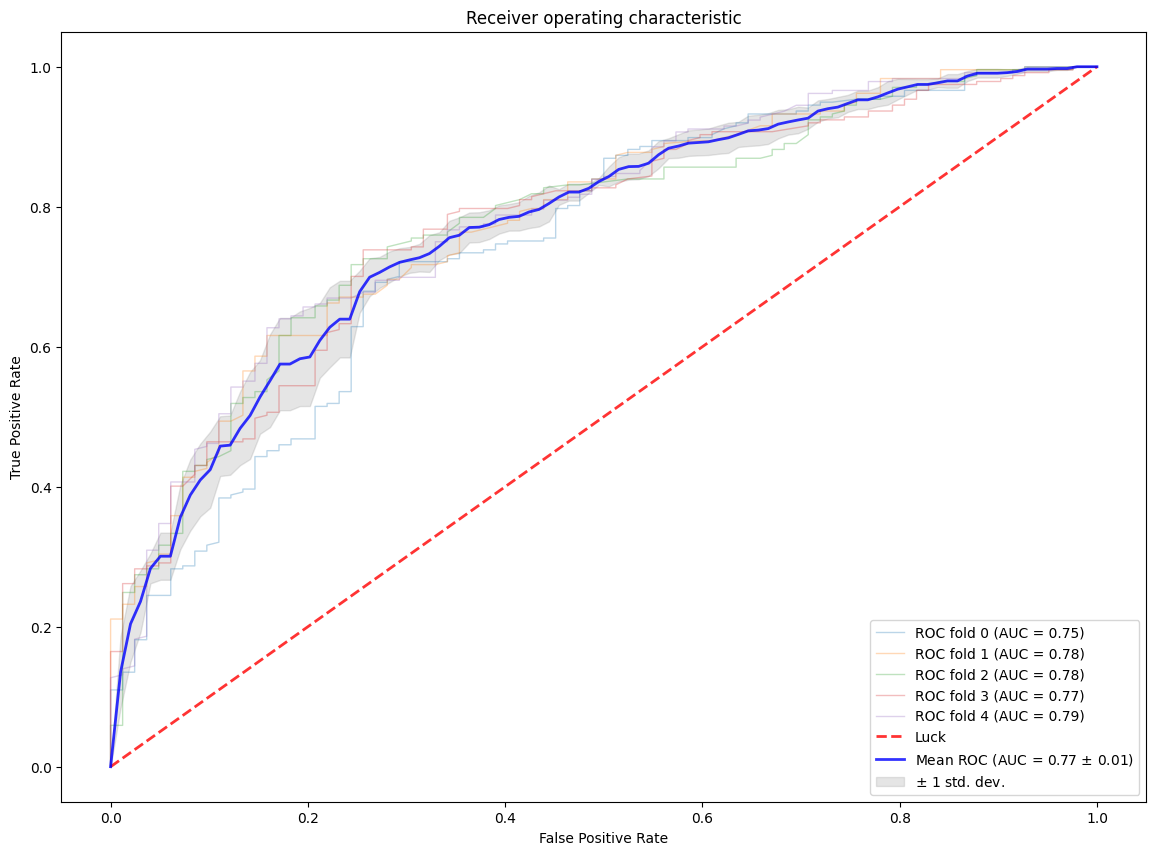

Accaracy list :  [0.768025078369906, 0.774294670846395, 0.7711598746081505, 0.7586206896551724, 0.7704402515723271]
equal opportunity for tpr :  [0.053463203463203435, 0.04400871459694988, 0.010452186805040786, 0.007189542483660105, 0.028368794326241176]
equal opportunity for fpr :  [0.056372549019607754, 0.01674641148325362, 0.033333333333333326, 0.06008855154965209, 0.13112745098039225]
odds difference list :  [0.054917876241405594, 0.03037756304010175, 0.021892760069187056, 0.0336390470166561, 0.07974812265331671]
The mean accuracy is  0.769 ± 0.005
The mean equal opportunity for tpr: (close to 0) 0.029 ± 0.018
The mean equal opportunity for fpr: (close to 0) 0.060 ± 0.039
The mean odds difference: (close to 0) 0.044 ± 0.021
The mean parity difference: (close to 0) 0.146 ± 0.044
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 145
---------------------------------------------------------------------------------------------------
Trial Number: 37
Values (Obj

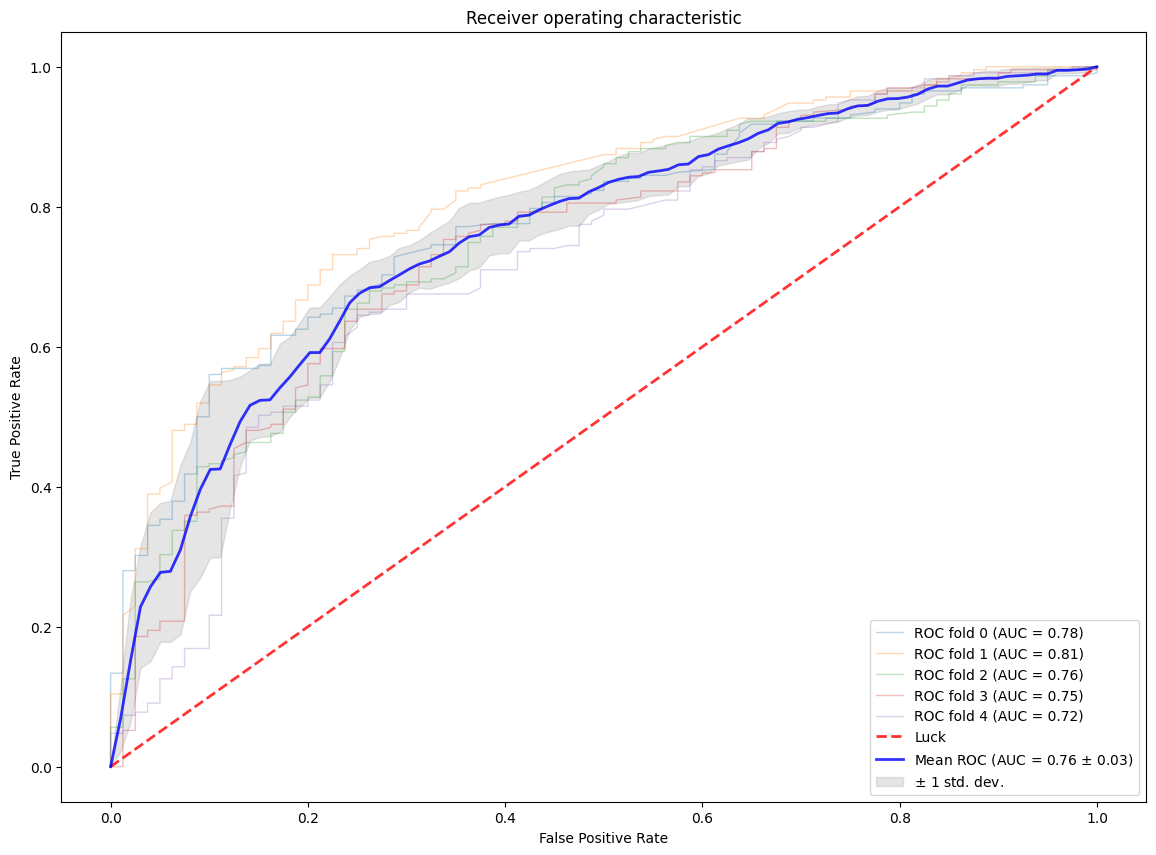

Accaracy list :  [0.7596153846153846, 0.7684887459807074, 0.752411575562701, 0.7684887459807074, 0.7717041800643086]
equal opportunity for tpr :  [0.017241379310344862, 0.0006212144742971937, 0.05986954496039765, 0.01837660306537381, 0.02889866504854366]
equal opportunity for fpr :  [0.07499999999999996, 0.01869761444229534, 0.09999999999999998, 0.09523809523809534, 0.2237266279819471]
odds difference list :  [0.04612068965517241, 0.009659414458296267, 0.07993477248019881, 0.056807349151734576, 0.12631264651524537]
The mean accuracy is  0.764 ± 0.007
The mean equal opportunity for tpr: (close to 0) 0.025 ± 0.020
The mean equal opportunity for fpr: (close to 0) 0.103 ± 0.067
The mean odds difference: (close to 0) 0.064 ± 0.039
The mean parity difference: (close to 0) 0.139 ± 0.062
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 37
---------------------------------------------------------------------------------------------------
Trial Number: 161
Values (Objec

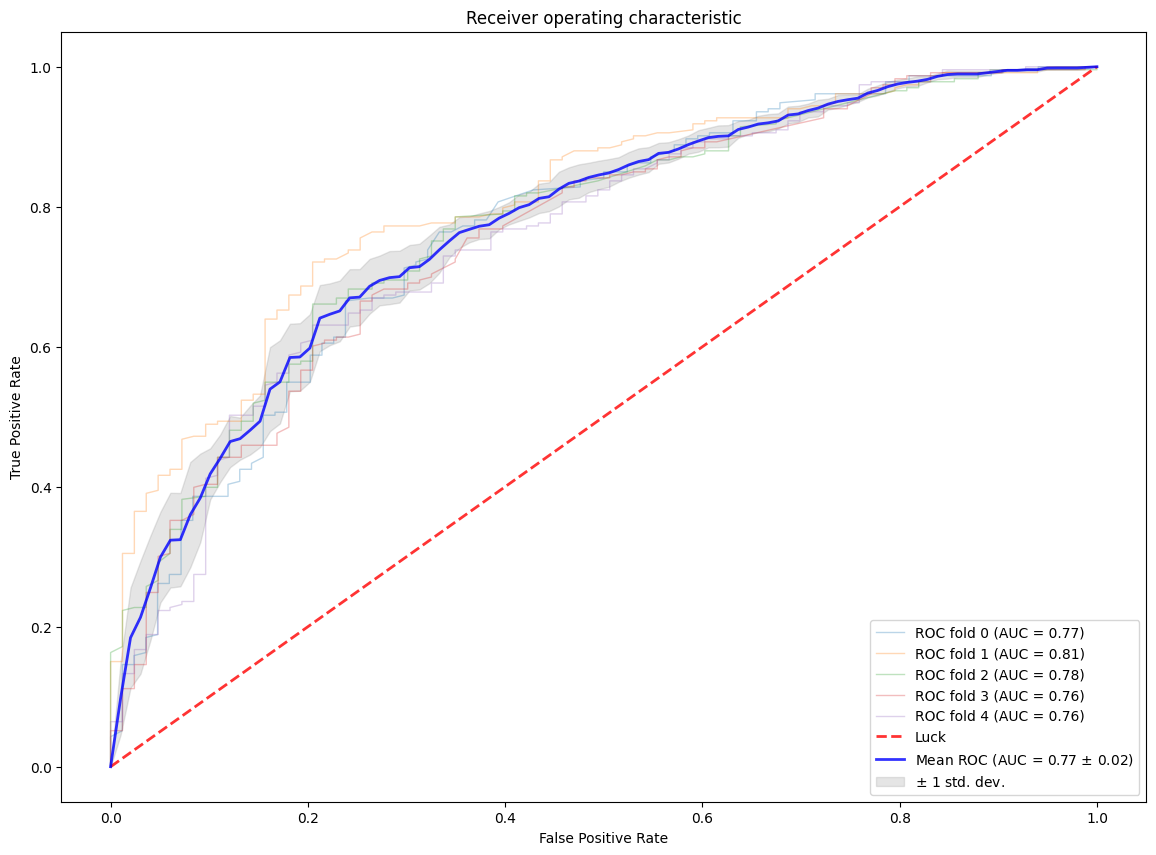

Accaracy list :  [0.7665615141955836, 0.7689873417721519, 0.7658227848101266, 0.7721518987341772, 0.7753164556962026]
equal opportunity for tpr :  [0.03891683930156853, 0.03435343534353441, 0.04086054790280147, 0.01033215980407165, 0.013342277877161579]
equal opportunity for fpr :  [0.010209869540555805, 0.05906432748538004, 0.0643274853801169, 0.09783913565426172, 0.13546511627906976]
odds difference list :  [0.024563354421062167, 0.046708881414457226, 0.052594016641459185, 0.054085647729166686, 0.07440369707811567]
The mean accuracy is  0.770 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.028 ± 0.013
The mean equal opportunity for fpr: (close to 0) 0.073 ± 0.042
The mean odds difference: (close to 0) 0.050 ± 0.016
The mean parity difference: (close to 0) 0.141 ± 0.044
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 161
---------------------------------------------------------------------------------------------------
Trial Number: 2
Values (Obje

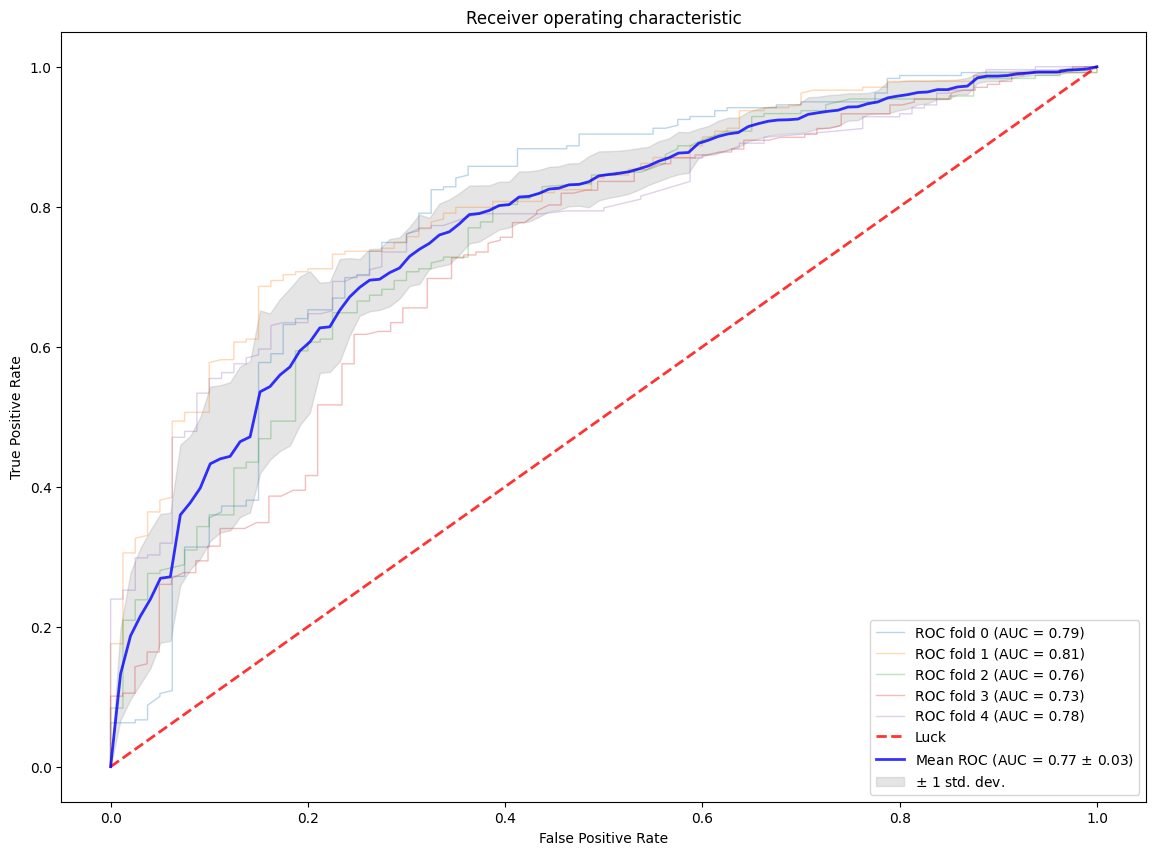

Accaracy list :  [0.786833855799373, 0.7836990595611285, 0.7492163009404389, 0.7554858934169278, 0.7578616352201258]
equal opportunity for tpr :  [0.018612164629863814, 0.037461884710323856, 0.05103818789022796, 0.06796690307328601, 0.07448979591836735]
equal opportunity for fpr :  [0.12030075187969924, 0.15931533903884143, 0.012531328320801949, 0.05555555555555558, 0.1075672295184491]
odds difference list :  [0.06945645825478153, 0.09838861187458264, 0.031784758105514954, 0.061761229314420796, 0.09102851271840823]
The mean accuracy is  0.767 ± 0.016
The mean equal opportunity for tpr: (close to 0) 0.050 ± 0.020
The mean equal opportunity for fpr: (close to 0) 0.091 ± 0.051
The mean odds difference: (close to 0) 0.070 ± 0.024
The mean parity difference: (close to 0) 0.169 ± 0.050
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 2
---------------------------------------------------------------------------------------------------
Trial Number: 122
Values (Object

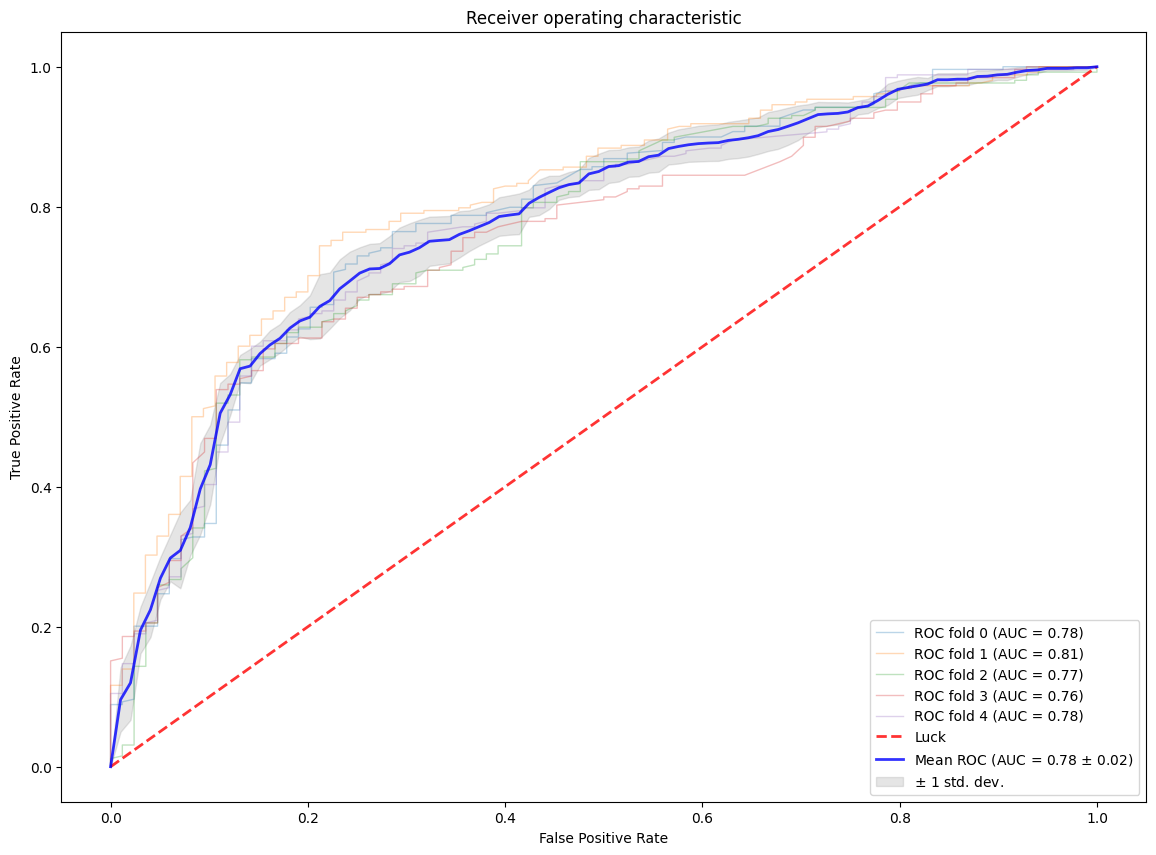

Accaracy list :  [0.7842565597667639, 0.7784256559766763, 0.7777777777777778, 0.7719298245614035, 0.783625730994152]
equal opportunity for tpr :  [0.00917431192660545, 0.0543206793206793, 0.01693889897156675, 0.029835324507587968, 0.01948051948051943]
equal opportunity for fpr :  [0.0074755606670500185, 0.07823129251700689, 0.051851851851851816, 0.11040828062104668, 0.10183066361556059]
odds difference list :  [0.008324936296827734, 0.0662759859188431, 0.034395375411709284, 0.07012180256431733, 0.06065559154804001]
The mean accuracy is  0.779 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.026 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.070 ± 0.037
The mean odds difference: (close to 0) 0.048 ± 0.023
The mean parity difference: (close to 0) 0.208 ± 0.066
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 122
---------------------------------------------------------------------------------------------------
Trial Number: 182
Values (Obje

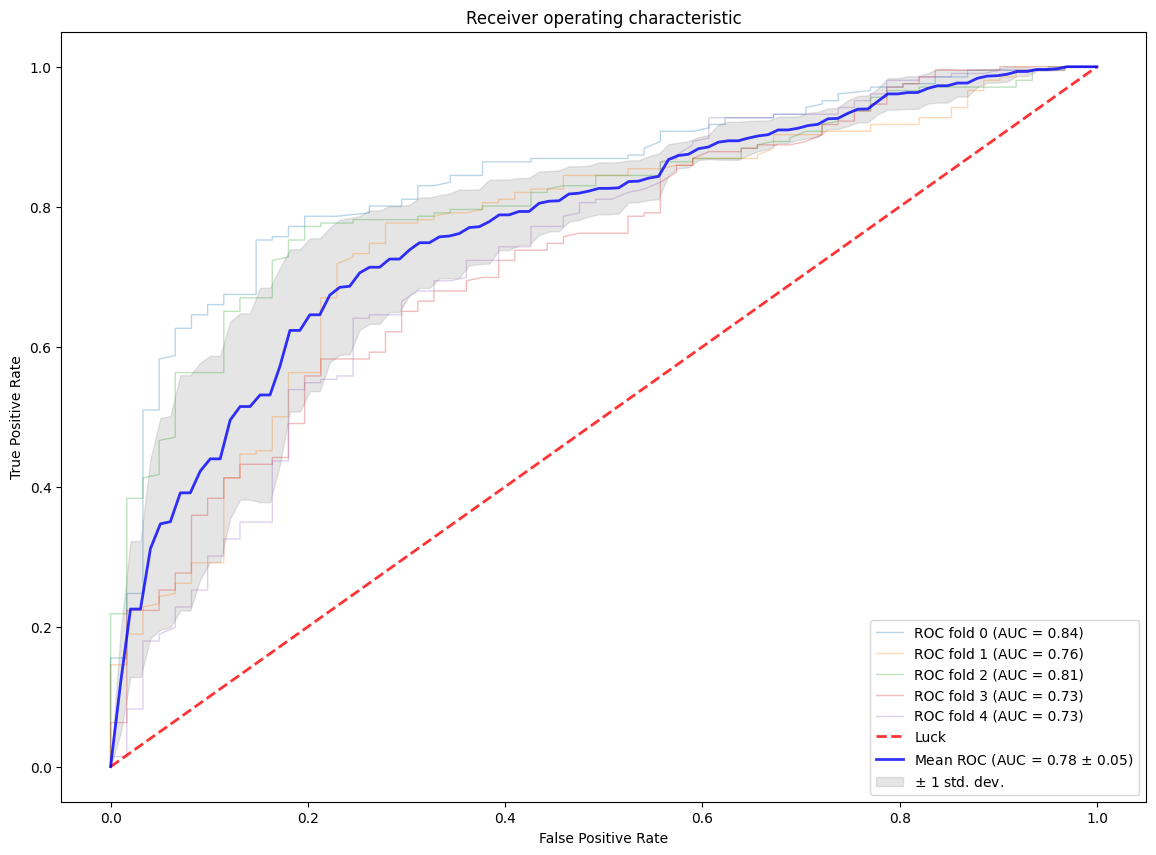

Accaracy list :  [0.7940074906367042, 0.7790262172284644, 0.7752808988764045, 0.797752808988764, 0.797752808988764]
equal opportunity for tpr :  [0.011611441517983545, 0.009146628948609181, 0.05660377358490565, 0.012655818821962095, 0.04557589626239511]
equal opportunity for fpr :  [0.015476190476190421, 0.07111111111111112, 0.029761904761904767, 0.04312354312354316, 0.08999999999999997]
odds difference list :  [0.013543815997086983, 0.04012887002986015, 0.04318283917340521, 0.02788968097275263, 0.06778794813119754]
The mean accuracy is  0.789 ± 0.010
The mean equal opportunity for tpr: (close to 0) 0.027 ± 0.020
The mean equal opportunity for fpr: (close to 0) 0.050 ± 0.027
The mean odds difference: (close to 0) 0.039 ± 0.018
The mean parity difference: (close to 0) 0.059 ± 0.030
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 182
---------------------------------------------------------------------------------------------------
Trial Number: 96
Values (Obje

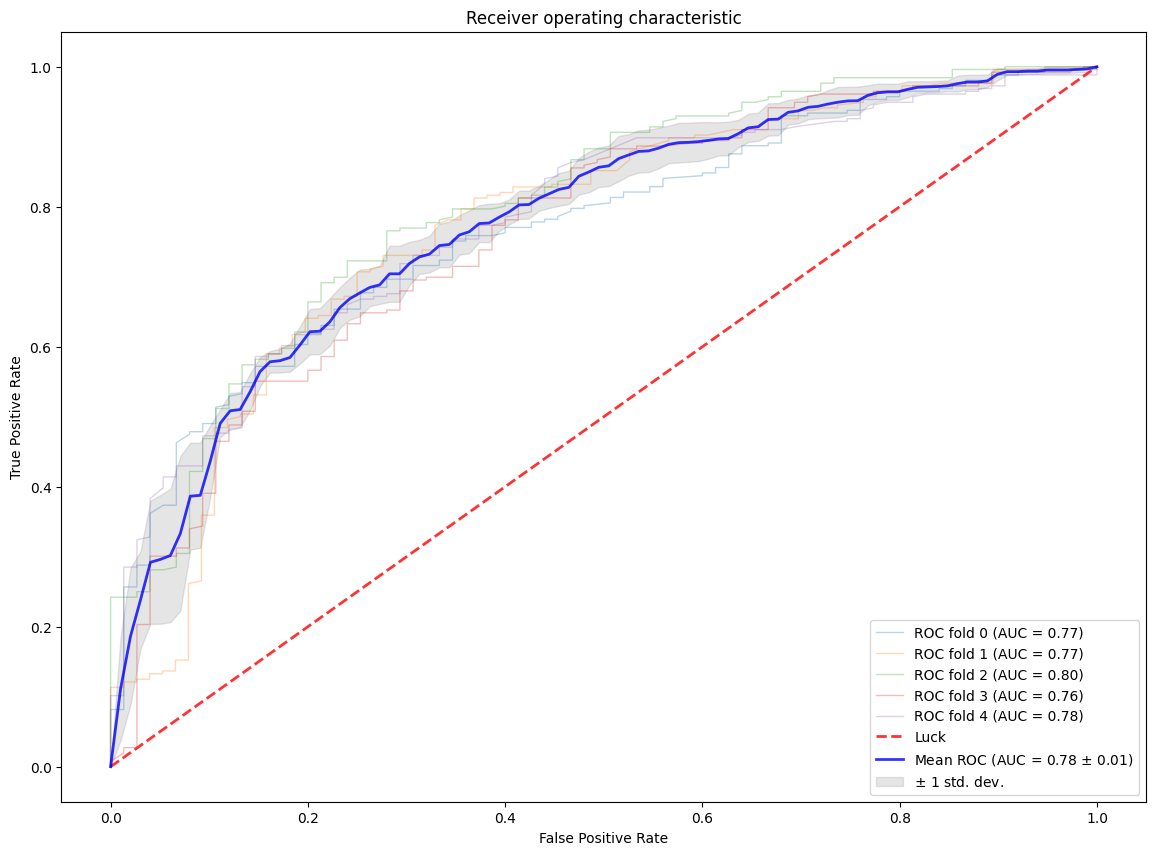

Accaracy list :  [0.786144578313253, 0.7831325301204819, 0.8157099697885196, 0.7794561933534743, 0.7734138972809668]
equal opportunity for tpr :  [0.0194506587124037, 0.011233851338700696, 0.0257420541108484, 0.04762847153506167, 0.05073553448839485]
equal opportunity for fpr :  [0.2796101949025488, 0.06968641114982588, 0.04978354978354971, 0.12142857142857133, 0.09999999999999998]
odds difference list :  [0.14953042680747625, 0.04046013124426329, 0.037762801947199054, 0.0845285214818165, 0.07536776724419741]
The mean accuracy is  0.788 ± 0.015
The mean equal opportunity for tpr: (close to 0) 0.031 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.124 ± 0.082
The mean odds difference: (close to 0) 0.078 ± 0.040
The mean parity difference: (close to 0) 0.197 ± 0.043
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 96
---------------------------------------------------------------------------------------------------
Trial Number: 20
Values (Objectives):

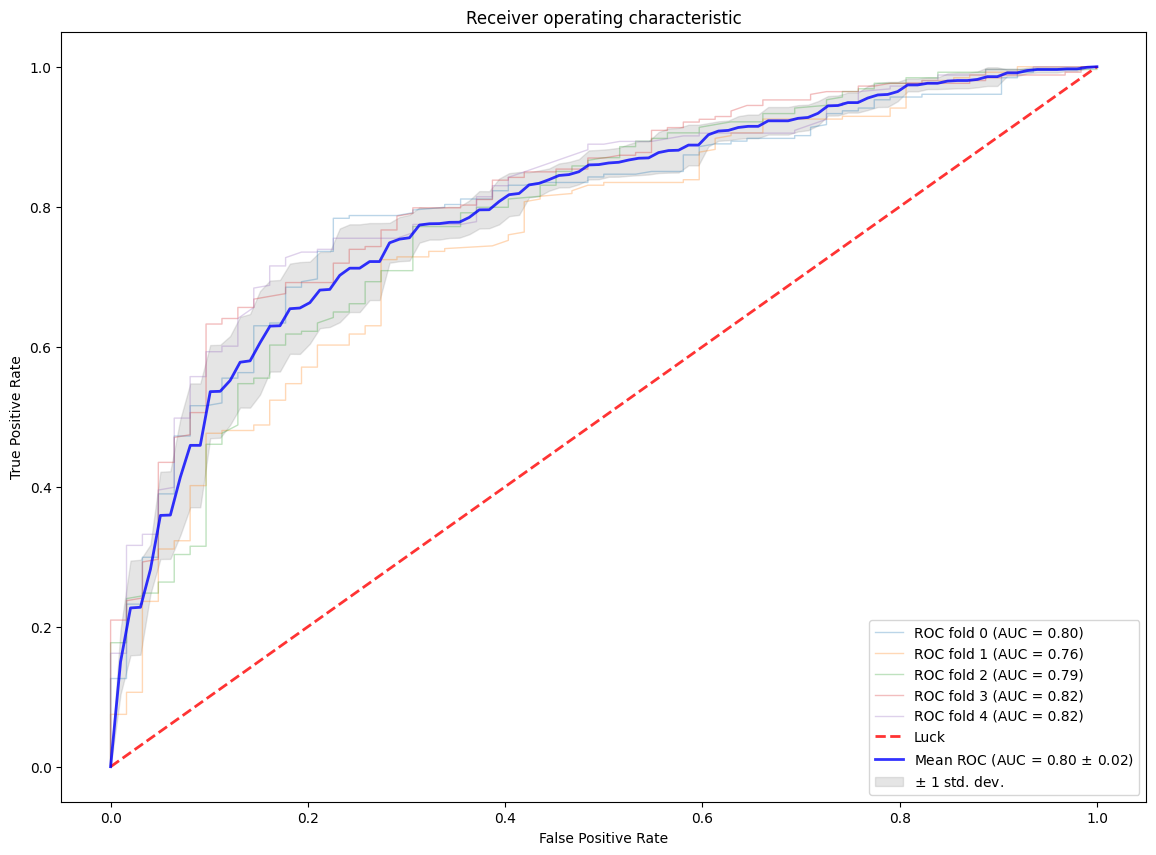

Accaracy list :  [0.8006329113924051, 0.8227848101265823, 0.8227848101265823, 0.8253968253968254, 0.819047619047619]
equal opportunity for tpr :  [6.327111673531949e-05, 0.015512820512820547, 0.06000000000000005, 0.08421052631578951, 0.020621353954687227]
equal opportunity for fpr :  [0.05228758169934644, 0.17992656058751522, 0.05227272727272725, 0.09677419354838701, 0.11875000000000002]
odds difference list :  [0.02617542640804088, 0.09771969055016788, 0.05613636363636365, 0.09049235993208826, 0.06968567697734362]
The mean accuracy is  0.818 ± 0.009
The mean equal opportunity for tpr: (close to 0) 0.036 ± 0.031
The mean equal opportunity for fpr: (close to 0) 0.100 ± 0.048
The mean odds difference: (close to 0) 0.068 ± 0.026
The mean parity difference: (close to 0) 0.158 ± 0.083
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 20
---------------------------------------------------------------------------------------------------
Trial Number: 42
Values (Object

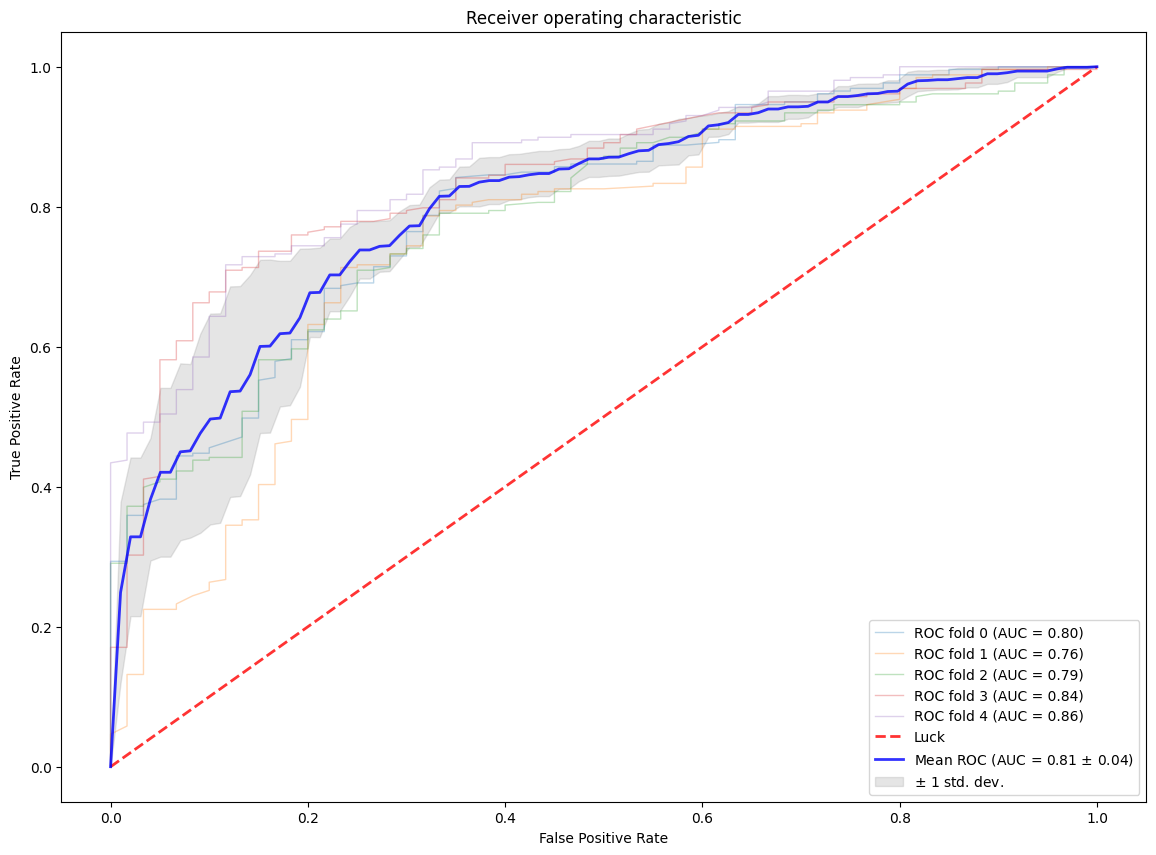

Accaracy list :  [0.8401253918495298, 0.8270440251572327, 0.8018867924528302, 0.8207547169811321, 0.839622641509434]
equal opportunity for tpr :  [0.0116819571865443, 0.05769230769230771, 0.07461181689856822, 0.04210526315789476, 0.0]
equal opportunity for fpr :  [0.1386392811296534, 0.19865319865319864, 0.005875440658049458, 0.04066985645933008, 0.05555555555555547]
odds difference list :  [0.07516061915809885, 0.12817275317275317, 0.04024362877830884, 0.04138755980861242, 0.027777777777777735]
The mean accuracy is  0.826 ± 0.014
The mean equal opportunity for tpr: (close to 0) 0.037 ± 0.028
The mean equal opportunity for fpr: (close to 0) 0.088 ± 0.070
The mean odds difference: (close to 0) 0.063 ± 0.036
The mean parity difference: (close to 0) 0.165 ± 0.061
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 42
---------------------------------------------------------------------------------------------------
Trial Number: 107
Values (Objectives): [0.079307464

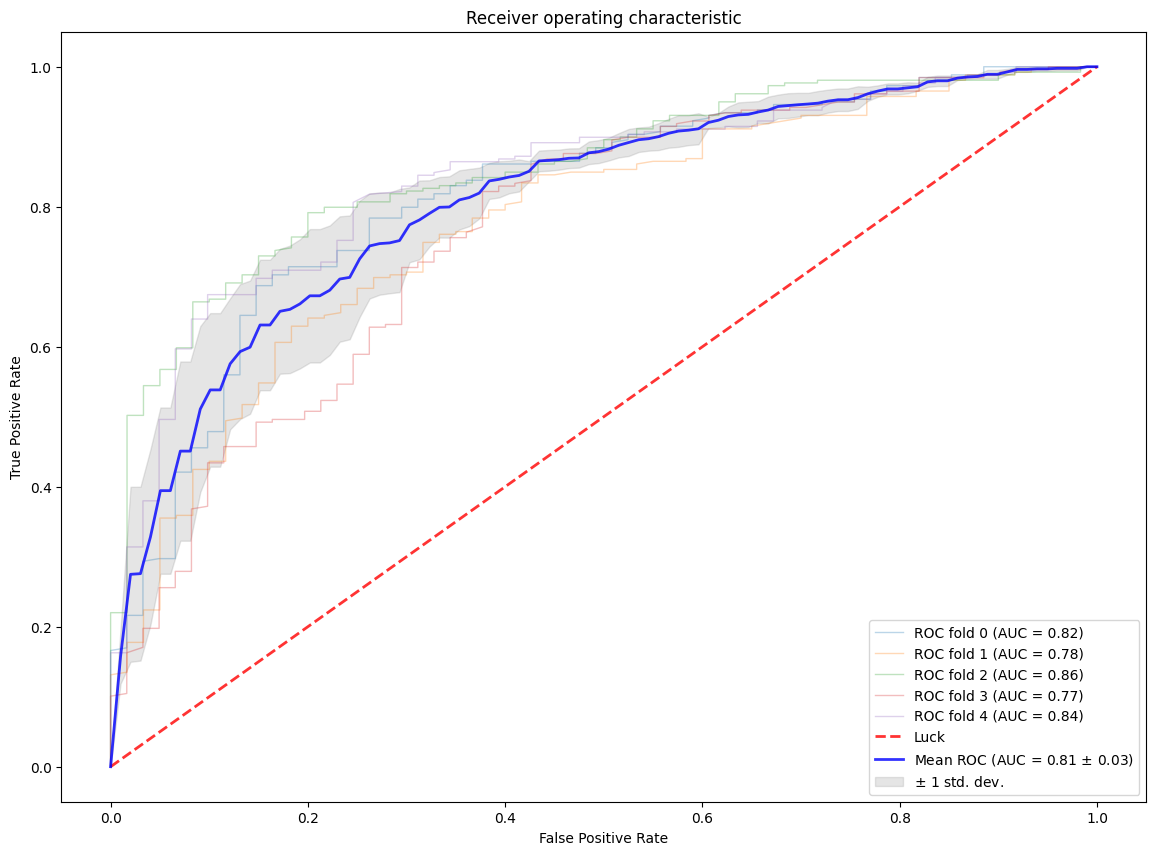

Accaracy list :  [0.828125, 0.8213166144200627, 0.8369905956112853, 0.8213166144200627, 0.8181818181818182]
equal opportunity for tpr :  [0.0240530303030303, 0.04424778761061943, 0.0625, 0.002592592592592591, 0.030303030303030276]
equal opportunity for fpr :  [0.017379679144385096, 0.06580493537015275, 0.001175088131609825, 0.0311111111111112, 0.024774774774774744]
odds difference list :  [0.020716354723707697, 0.05502636149038609, 0.03183754406580491, 0.016851851851851896, 0.02753890253890251]
The mean accuracy is  0.825 ± 0.007
The mean equal opportunity for tpr: (close to 0) 0.033 ± 0.020
The mean equal opportunity for fpr: (close to 0) 0.028 ± 0.021
The mean odds difference: (close to 0) 0.030 ± 0.013
The mean parity difference: (close to 0) 0.158 ± 0.081
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 107
---------------------------------------------------------------------------------------------------


In [33]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in minutes
elapsed_time_minutes = (end_time - start_time) / 60

pareto_front_trials = study.best_trials
pareto_front_trials = sorted(pareto_front_trials, key=lambda trial: trial.values[0])


trail_list = []
fairness_values_list = []

acc_values_list = []
growth_list = []

# Process each trial in the Pareto front
for trial in pareto_front_trials:
   trail_list.append(trial.number)
   fairness_values_list.append(trial.values[0])
   acc_values_list.append(trial.values[1])

   lambda1 = trial.params['lambda_0']
   lambda2 = trial.params['lambda_1']
   upsampled_df = Upsampling_Dataset(lambda1,lambda2)
   growth_list.append((len(upsampled_df) - len(orig_data))/ len(orig_data) * 100 )

   print("Trial Number:", trial.number)
   print("Values (Objectives):", trial.values)
   print("Parameters:", trial.params)
   print("Dataset Growth Percent :", (len(upsampled_df) - len(orig_data))/ len(orig_data) * 100)
   print('---------------------------------------------------------------------------------------------------')
   y_debias = upsampled_df[TARGET_COL]
   upsampled_df_features = upsampled_df.loc[:, feature_columns]
   upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact  = fairness_metrics_roc_auc_std(upsampled_df_features, y_debias )

   print("End Of Trial Number:", trial.number)
   print('---------------------------------------------------------------------------------------------------')




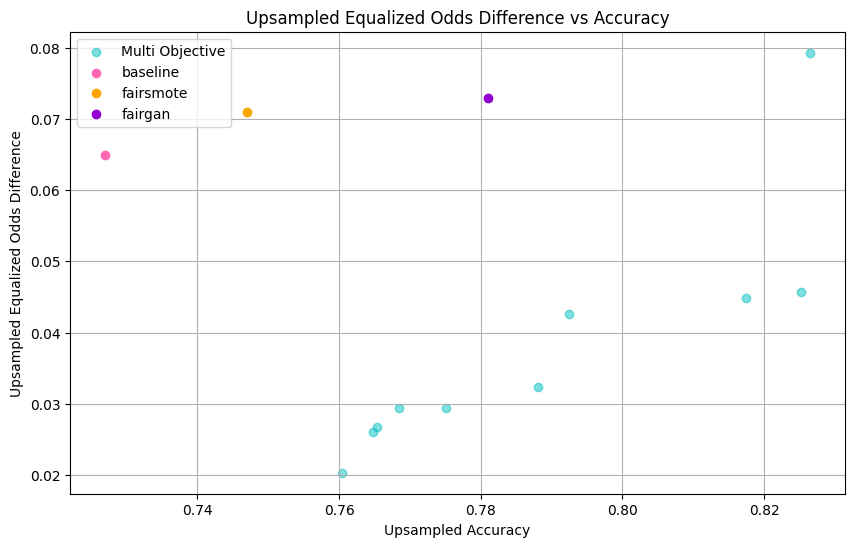

In [37]:
import matplotlib.pyplot as plt

# Plot upsampled_op_diff against upsampled_acc
plt.figure(figsize=(10, 6))
plt.scatter(acc_values_list,fairness_values_list, alpha=0.5,color = 'c', label = 'Multi Objective')

# Add the three additional points
plt.scatter(0.727, 0.065, color='hotpink', label='baseline')  # Baseline point
plt.scatter(0.747, 0.071, color='orange', label='fairsmote')  # Fairsmote point
plt.scatter(0.781, 0.073, color='darkviolet', label='fairgan')  # Fairgan point

plt.xlabel('Upsampled Accuracy')
plt.ylabel('Upsampled Equalized Odds Difference')
plt.title('Upsampled Equalized Odds Difference vs Accuracy')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

conf matrix:
  [[ 21  39]
 [ 13 127]] 
accuracy:  0.74 precision:  0.7650602409638554 recall:  0.9071428571428571 fpr:  0.65 tpr:  0.9071428571428571 fn+fp 52
conf matrix:
  [[12 23]
 [ 7 90]] 
accuracy:  0.7727272727272727 precision:  0.7964601769911505 recall:  0.9278350515463918 fpr:  0.6571428571428571 tpr:  0.9278350515463918 fn+fp 30
conf matrix:
  [[ 9 16]
 [ 6 37]] 
accuracy:  0.6764705882352942 precision:  0.6981132075471698 recall:  0.8604651162790697 fpr:  0.64 tpr:  0.8604651162790697 fn+fp 22
conf matrix:
  [[ 19  41]
 [ 11 129]] 
accuracy:  0.74 precision:  0.7588235294117647 recall:  0.9214285714285714 fpr:  0.6833333333333333 tpr:  0.9214285714285714 fn+fp 52
conf matrix:
  [[ 6 16]
 [ 1 43]] 
accuracy:  0.7424242424242424 precision:  0.7288135593220338 recall:  0.9772727272727273 fpr:  0.7272727272727273 tpr:  0.9772727272727273 fn+fp 17
conf matrix:
  [[13 25]
 [10 86]] 
accuracy:  0.7388059701492538 precision:  0.7747747747747747 recall:  0.8958333333333334 fpr:  0.6

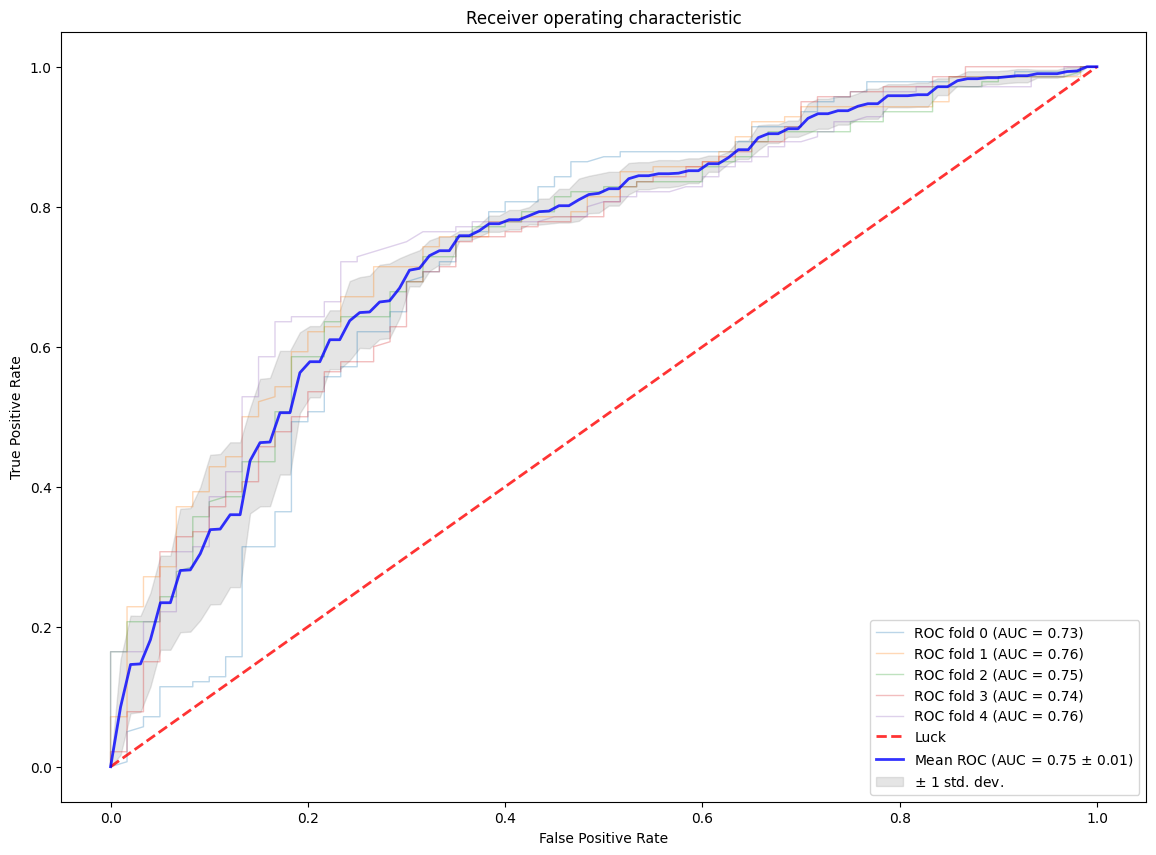

Accaracy list :  [0.74, 0.74, 0.73, 0.735, 0.715]
equal opportunity for tpr :  [0.06736993526732205, 0.08143939393939392, 0.08503401360544216, 0.04217536071032191, 0.05521155830753344]
equal opportunity for fpr :  [0.017142857142857126, 0.06937799043062198, 0.22499999999999998, 0.04999999999999993, 0.08133971291866038]
odds difference list :  [0.042256396205089586, 0.07540869218500795, 0.15501700680272107, 0.04608768035516092, 0.06827563561309691]
The mean accuracy is  0.732 ± 0.009
The mean equal opportunity for tpr: (close to 0) 0.066 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.089 ± 0.072
The mean odds difference: (close to 0) 0.077 ± 0.041
The mean parity difference: (close to 0) 0.403 ± 0.065
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [35]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

In [36]:
print('Running time is: ',elapsed_time_minutes)

Running time is:  3.4199305335680643
